In [0]:
#import libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import sys

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

import matplotlib.pyplot as plt
%matplotlib inline

#setting maximum row of 1000 rows as result display
pd.set_option('display.max_row', 1000)

# Load Data

In [0]:
#read input data file from local drive
data = pd.read_csv('UCF_TLDClustering.txt', sep="\|\|", engine='python')

In [0]:
#input data columns
data.columns = ["StoreID", "StoreGroup", "PeriodID", "TicketID", "ItemName", "ItemCategory", "Qty", "Sales", "Modifier"]

In [0]:
#check initial records of the data
data.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1{,}A{,}20180801{,}1{,}Chevy Ajax{,}Automobile{,}1{,}499{,}0
1,1{,}A{,}20180801{,}2{,}Chevy Spark{,}Automobile{,}1{,}499{,}0
2,1{,}A{,}20180801{,}3{,}Chevy Colorado{,}Automobile{,}1{,}799{,}0
3,1{,}A{,}20180801{,}3{,}Chevy Gemini{,}Automobile{,}1{,}679{,}0
4,1{,}A{,}20180801{,}3{,}WND{,}Phones{,}2{,}0{,}1


In [0]:
df = pd.DataFrame(data) 

# Data Preparation
  * Cleaning data - removal of '{' and '}'

In [0]:
df = df.applymap(lambda x: x.replace('{', ''))

In [0]:
df = df.applymap(lambda x: x.replace('}', ''))

In [0]:
#check data
df.head(10)

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy Spark,Automobile,1,499,0


In [0]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811321 entries, 0 to 12811320
Data columns (total 9 columns):
StoreID         object
StoreGroup      object
PeriodID        object
TicketID        object
ItemName        object
ItemCategory    object
Qty             object
Sales           object
Modifier        object
dtypes: object(9)
memory usage: 879.7+ MB


In [0]:
#check for NaNs, null values
df.loc[df.isna().any(axis=1),:]

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


In [0]:
#data description with include all 
df.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202,F,20190302,32,Apple,Automobile,1,0,0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [0]:
#check for unique store groups
df.StoreGroup.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

  * Filter data with Store ID value 1

In [0]:
df1 = df[df.StoreID =='1']

In [0]:
#check initial data with store id = 1 dataframe
df1.head(10)

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy Spark,Automobile,1,499,0


In [0]:
#dataframe description
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


In [0]:
#store id 1 dataframe information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 0 to 98674
Data columns (total 9 columns):
StoreID         98675 non-null object
StoreGroup      98675 non-null object
PeriodID        98675 non-null object
TicketID        98675 non-null object
ItemName        98675 non-null object
ItemCategory    98675 non-null object
Qty             98675 non-null object
Sales           98675 non-null object
Modifier        98675 non-null object
dtypes: object(9)
memory usage: 7.5+ MB


In [0]:
#check all store group values for store id 1
df1.StoreGroup.unique()

array(['A'], dtype=object)

In [0]:
#check unique Item Category for Store ID 1 data
df1.ItemCategory.unique()

array(['Automobile', 'Phones', 'Accessories', 'Dogs', 'Homes', 'Bicycle',
       'Color'], dtype=object)

  * Cleaning the ItemNames column values, replacing empty space with '-'

In [0]:
df1['ItemName'] = df1['ItemName'].str.replace(' ','-')
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


#Data Exploration

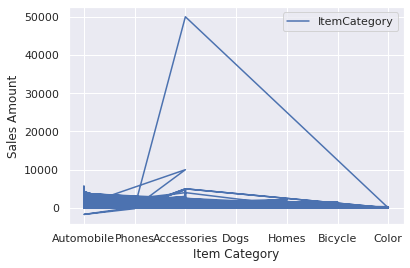

In [0]:
#plot Sales Amount with respect to Item Category
plt.plot(df1.ItemCategory, df1['Sales'].astype(str).astype(int))
plt.legend(['ItemCategory'])
plt.xlabel('Item Category')
plt.ylabel('Sales Amount')
plt.show()

In [0]:
#check minimum sales amount
min(df1.Sales)

'-1698'

In [0]:
#check records with sales less than 0  - dfS1TimeFrame1 dfS1TimeFrame2
negativeVal = df1[df1.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
2251,1,A,20180809,33,Ford-Focus,Automobile,2,-1698,0
2252,1,A,20180809,33,Google,Phones,1,-199,0


In [0]:
#check records of ticket id 33 for sales
tckt33Det = df1[(df1.TicketID == '33') & (df1.PeriodID == '20180809')]
tckt33Det

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
2251,1,A,20180809,33,Ford-Focus,Automobile,2,-1698,0
2252,1,A,20180809,33,Google,Phones,1,-199,0
2253,1,A,20180809,33,WND,Phones,1,0,1


In [0]:
#replace '-'ve of sales with empty string
df1['Sales'] = df1['Sales'].str.replace('-','')
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
#check any negative sales amount
negativeVal = df1[df1.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


  * Changing the numerical valued columns to type int 

In [0]:
df1['StoreID'] = df1['StoreID'].astype(str).astype(int)
df1['PeriodID'] = df1['PeriodID'].astype(str).astype(int)
df1['TicketID'] = df1['TicketID'].astype(str).astype(int)
df1['Qty'] = df1['Qty'].astype(str).astype(int)
df1['Sales'] = df1['Sales'].astype(str).astype(int)
df1['Modifier'] = df1['Modifier'].astype(str).astype(int)
#df1['StoreGroup'] = df1['StoreGroup'].astype('str')
#df1['ItemName'] = df1['ItemName'].astype('str')
#df1['ItemCategory'] = df1['ItemCategory'].astype('str')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 0 to 98674
Data columns (total 9 columns):
StoreID         98675 non-null int64
StoreGroup      98675 non-null object
PeriodID        98675 non-null int64
TicketID        98675 non-null int64
ItemName        98675 non-null object
ItemCategory    98675 non-null object
Qty             98675 non-null int64
Sales           98675 non-null int64
Modifier        98675 non-null int64
dtypes: int64(6), object(3)
memory usage: 7.5+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# Create Base Period for analysis

  * Creating base period with Store 1 with time frame Aug 2018 - Jul 2019

In [0]:
store1DF = df1
store1DF.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
store1DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 0 to 98674
Data columns (total 9 columns):
StoreID         98675 non-null int64
StoreGroup      98675 non-null object
PeriodID        98675 non-null int64
TicketID        98675 non-null int64
ItemName        98675 non-null object
ItemCategory    98675 non-null object
Qty             98675 non-null int64
Sales           98675 non-null int64
Modifier        98675 non-null int64
dtypes: int64(6), object(3)
memory usage: 7.5+ MB


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


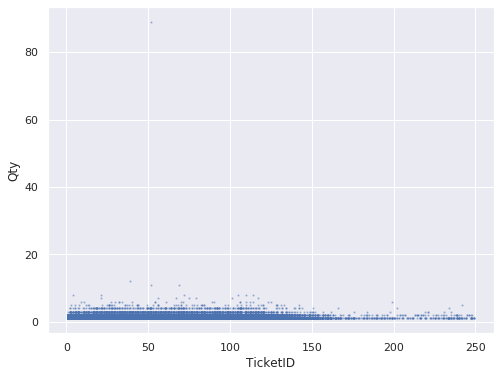

In [0]:
#store1DF
def var_scatter(store1DF, var):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    store1DF.plot.scatter(x=var , y="Qty", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(store1DF, "TicketID");

  * Comparision plot of Quantity and Sales with respect to each Ticket ID

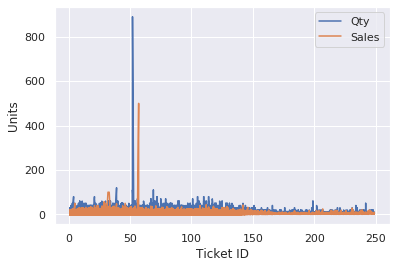

In [0]:
plt.plot(store1DF.TicketID, store1DF.Qty * 10)
plt.plot(store1DF.TicketID, store1DF.Sales/10**2)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Units')
plt.show()

  * Comparision of Quantity and Sales with respect to each TicketID as percentage growth when compared with sales amount of first TicketID

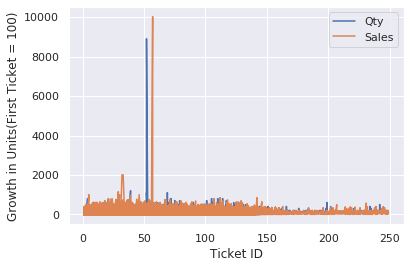

In [0]:
plt.plot(store1DF.TicketID,store1DF.Qty / store1DF.Qty.iloc[0] * 100)
plt.plot(store1DF.TicketID,store1DF.Sales / store1DF.Sales.iloc[0]*100)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Growth in Units(First Ticket = 100)')
plt.show()

  * Determining the outlier Sales amount 

In [0]:
maxSalesValue = store1DF[store1DF.Sales > 5000]
maxSalesValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
39175,1,A,20181221,32,Keychain,Accessories,1,10000,0
39176,1,A,20181221,33,Keychain,Accessories,1,10000,0
81722,1,A,20190605,29,Chevy-Chevelle,Automobile,3,5697,0


  * Plot Quatity with respect to Sales

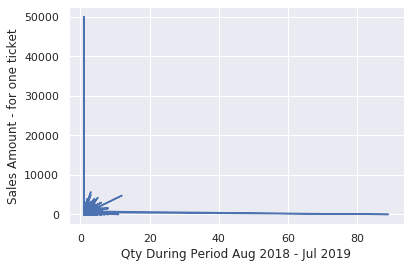

In [0]:
plt.plot(store1DF.Qty, store1DF.Sales)
plt.xlabel('Qty During Period Aug 2018 - Jul 2019')
plt.ylabel('Sales Amount - for one ticket')
plt.show()

  * Order details with 0 sales amount

In [0]:
zeroSales = store1DF[store1DF.Sales == 0]
zeroSales.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,11281.0,11281,1.128100e+04,11281.000000,11281,11281,11281.000000,11281.0,11281.0
unique,NaN,1,NaN,NaN,11,5,NaN,NaN,NaN
top,NaN,A,NaN,NaN,WND,Phones,NaN,NaN,NaN
freq,NaN,11281,NaN,NaN,9151,9833,NaN,NaN,NaN
mean,1.0,NaN,2.018655e+07,55.440652,NaN,NaN,1.390214,0.0,1.0
std,0.0,NaN,4.646784e+03,35.602385,NaN,NaN,1.082758,0.0,0.0
min,1.0,NaN,2.018080e+07,1.000000,NaN,NaN,1.000000,0.0,1.0
25%,1.0,NaN,2.018110e+07,27.000000,NaN,NaN,1.000000,0.0,1.0
50%,1.0,NaN,2.019020e+07,51.000000,NaN,NaN,1.000000,0.0,1.0
75%,1.0,NaN,2.019051e+07,79.000000,NaN,NaN,2.000000,0.0,1.0


# Create Corpus Documents
  * Create Corpus for ItemName
  * Corpus Document columns - StoreID|PeriodID|TicketID|ItemName|Sales

In [0]:
def CreateCorpusFromDataFrame(inputData):
    itemNameDict = {}
    id = 1
    try:
        global corpusfile
        corpusfile = open('itemNameDocumentStr1.txt', 'w')
        corpusfile.write('StoreID|PeriodID|TicketID|ItemName|Sales\n')

        for index, r in inputData.iterrows():
            storeID = r['StoreID']
            periodID = r['PeriodID']
            ticketID = r['TicketID']
            itemName = r['ItemName']
            qty = r['Qty']
            totalSales = int(r['Sales'])
            testName = ""
            keyVal = str(periodID)+str(ticketID)
            #print(keyVal)

            if keyVal in itemNameDict:
                value = itemNameDict[keyVal]
                c_itemname = value.split('|')[3]
                if qty > 1:
                    for x in range(qty):
                        if testName == "":
                            testName = itemName
                        else:
                            testName =  testName +' '+itemName
                    #print("ItemName:::::::" + testName)
                else:
                    testName = itemName

                n_itemname = c_itemname + ' ' + testName
                #print(":::::::" + n_itemname)
                c_salesValue = int(value.split('|')[4])
                n_salesValue = c_salesValue + totalSales
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(n_itemname) + "|" + str(n_salesValue)
                itemNameDict.update({keyVal: corpusString})
            else:
                if qty > 1:
                    for x in range(qty-1):
                        itemName = itemName + ' ' + itemName
                #print("ItemName:::::::" + itemName)
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(itemName) + "|" + str(totalSales)
                itemNameDict.update({keyVal: corpusString})

            id = id + 1

        for x in itemNameDict:
            corpusfile.write(itemNameDict[x] + '\n')

    finally:
        corpusfile.close()


#CreateCorpusFromDataFrame(dfS1TimeFrame1)
CreateCorpusFromDataFrame(store1DF)

# Load Corpus document
  * itemNameDocumentStr1     - Base period - Store 1 (Aug 2018 - Jul 2019)

  * Load corpus document for ItemName from google drive

In [0]:
itemNameDataStr1 = pd.read_csv('itemNameDocumentStr1.txt', sep="|", engine='python')
itemNameDataStr1.info()

1-4gG53zJ6m77j-H4ozn0SgJkBXv62xdR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31244 entries, 0 to 31243
Data columns (total 5 columns):
StoreID     31244 non-null int64
PeriodID    31244 non-null int64
TicketID    31244 non-null int64
ItemName    31244 non-null object
Sales       31244 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


#TFIDF 
  * using sklearn feature extraction 'TfidfVectorizer' for ItemName Base Period - itemNameDataStr1

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

In [0]:
#select column to convert to list here
itemNameCorpusStr1 = itemNameDataStr1["ItemName"].tolist()
#itemNameCorpusStr1
itemNameCorpusStr1 = [x.lower() for x in itemNameCorpusStr1]
len(itemNameCorpusStr1)

31244

In [0]:
#set() takes the unique values and set in vocabulary
vocabulary = set()
for documentValue in itemNameCorpusStr1:
    vocabulary.update(documentValue.split())

len(vocabulary)

274

In [0]:
vocabulary = list(vocabulary)

In [0]:
tfidf = TfidfVectorizer(vocabulary=vocabulary, token_pattern=r"(?u)\S\S+")

In [0]:
tfidf.fit(itemNameCorpusStr1)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\S\\S+', tokenizer=None,
                use_idf=T...
                            'kia-picanto', 'chevy-sonic', 'lincoln-continental',
                            'kia-optima', 'keychain', 'ford-telstar',
                            'saturn-sky', 'ford-eifel', 'asus',
                            'carriage/coach', 'chevy-c/k', 'bronze',
                            '400w-power-inverter', 'archos', 'jamis',
                            'towing-package', 'dodge-stratus', 'chevy-viva',
                            'poodle', 'chevy-g506', 'single-family-(detached)',
                  

In [0]:
tfidf.transform(itemNameCorpusStr1)

<31244x274 sparse matrix of type '<class 'numpy.float64'>'
	with 98671 stored elements in Compressed Sparse Row format>

In [0]:
#initializing tfidfItemName dataframe with all column values with 0 value
tfidfItemNameStr1DF = pd.DataFrame()
map = dict((ev,0) for ev in vocabulary)

In [0]:
#calculating TFIDF values for each document of the corpus and populating in the dataframe
scoreValue={}
for document in itemNameCorpusStr1:
    score={}
    transform = tfidf.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidf.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1DF = tfidfItemNameStr1DF.append(new_row, ignore_index=True)

In [0]:
#check tfidf item name data
tfidfItemNameStr1DF.head()

,400w-power-inverter,600w-power-inverter,alan,allview,amazon,amoi,apartment,apple,archos,asus,at&t,australian-shepherd,backup-camera,benq,benq-siemens,bike-hauler,blackberry,blackview,bmc,bobble-head,bose-speakers,boxer,bq,bronze,built-in-phone,bungalow,cabin,cannondale,car-sales-decal,carriage/coach,cd-changer,cd-player,celkon,chalet,chevy-210,chevy-a-20,chevy-ajax,chevy-astro,chevy-avalanche,chevy-beretta,...,rolling-pin,safety-hammer,samsung,saturn-ion,saturn-sky,seatbelt-cutter,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,socket-set,solor-powered-vent,sony,spare-tire-cover,sport-package,suction-grip,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-fortuner,toyota-isis,toyota-land-cruiser,toyota-porte,toyota-premio,toyota-prius,toyota-tacoma,toyota-tundra,toyota-voxy,trek,ultramarine,vehicle-cover,vent-clip-on-air-freshener,wheelchair-ramp,wnd,worksman-cycles
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498329,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498329,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498329,0.0


In [0]:
#check dataframe shape
tfidfItemNameStr1DF.shape

(31244, 274)

In [0]:
#check tfidf dataframe description
tfidfItemNameStr1DF.describe()

,400w-power-inverter,600w-power-inverter,alan,allview,amazon,amoi,apartment,apple,archos,asus,at&t,australian-shepherd,backup-camera,benq,benq-siemens,bike-hauler,blackberry,blackview,bmc,bobble-head,bose-speakers,boxer,bq,bronze,built-in-phone,bungalow,cabin,cannondale,car-sales-decal,carriage/coach,cd-changer,cd-player,celkon,chalet,chevy-210,chevy-a-20,chevy-ajax,chevy-astro,chevy-avalanche,chevy-beretta,...,rolling-pin,safety-hammer,samsung,saturn-ion,saturn-sky,seatbelt-cutter,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,socket-set,solor-powered-vent,sony,spare-tire-cover,sport-package,suction-grip,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-fortuner,toyota-isis,toyota-land-cruiser,toyota-porte,toyota-premio,toyota-prius,toyota-tacoma,toyota-tundra,toyota-voxy,trek,ultramarine,vehicle-cover,vent-clip-on-air-freshener,wheelchair-ramp,wnd,worksman-cycles
count,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,...,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000
mean,0.575283,0.603895,0.477075,0.533959,0.567192,0.714756,0.549169,0.344633,0.585172,0.791233,0.537756,0.685576,0.478563,0.253811,0.553090,0.556710,0.539056,0.720284,0.501227,0.637176,0.458476,0.732702,0.300452,0.238905,0.635212,0.618772,0.606615,0.464889,0.509189,0.506535,0.237263,0.159268,0.302617,0.588809,0.717061,0.193776,0.977853,0.791433,0.028306,0.634918,...,0.081633,0.622321,0.389281,0.590739,0.772248,0.460727,0.945006,0.500406,0.501128,0.061791,0.605136,0.580331,0.521355,0.497989,0.509890,0.566849,0.624026,0.606169,0.584929,0.558325,0.611123,0.591597,0.579500,0.604151,0.782171,0.477053,0.688563,0.716672,0.508403,0.978315,0.627448,0.595649,0.577517,0.339698,0.740867,0.536747,0.236322,0.548511,0.388148,0.497688
std,0.214043,0.163143,0.141525,0.170986,0.156427,0.191260,0.147104,0.173029,0.156137,0.262140,0.164612,0.279437,0.066215,0.370547,0.152694,0.174426,0.167906,0.190602,0.143603,0.281903,0.146040,0.146448,0.340501,0.334085,0.189801,0.149123,0.250844,0.143529,0.166954,0.170230,0.279456,0.272362,0.349865,0.224646,0.190183,0.327897,0.073935,0.402448,0.150608,0.212461,...,0.208761,0.148953,0.148050,0.173101,0.282590,0.327534,0.134501,0.170797,0.143975,0.235566,0.140114,0.153230,0.148713,0.134867,0.220255,0.256968,0.164578,0.168393,0.183876,0.173946,0.214635,0.194364,0.207475,0.195680,0.222263,0.460167,0.319683,0.325355,0.450873,0.102124,0.200635,0.207377,0.178036,0.289022,0.128999,0.149100,0.356323,0.204276,0.158721,0.147991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630155,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

# **Cluster Analysis**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## **Cluster Analysis of TF-IDF Data of Item Name**




In [0]:
tfidfItemNameStr1DF.head()

,400w-power-inverter,600w-power-inverter,alan,allview,amazon,amoi,apartment,apple,archos,asus,at&t,australian-shepherd,backup-camera,benq,benq-siemens,bike-hauler,blackberry,blackview,bmc,bobble-head,bose-speakers,boxer,bq,bronze,built-in-phone,bungalow,cabin,cannondale,car-sales-decal,carriage/coach,cd-changer,cd-player,celkon,chalet,chevy-210,chevy-a-20,chevy-ajax,chevy-astro,chevy-avalanche,chevy-beretta,...,rolling-pin,safety-hammer,samsung,saturn-ion,saturn-sky,seatbelt-cutter,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,socket-set,solor-powered-vent,sony,spare-tire-cover,sport-package,suction-grip,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-fortuner,toyota-isis,toyota-land-cruiser,toyota-porte,toyota-premio,toyota-prius,toyota-tacoma,toyota-tundra,toyota-voxy,trek,ultramarine,vehicle-cover,vent-clip-on-air-freshener,wheelchair-ramp,wnd,worksman-cycles
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498329,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498329,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498329,0.0


In [0]:
tfidfItemNameStr1DF.shape

(31244, 274)

#Feature Scaling - Normalization

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [0]:
from sklearn.preprocessing import StandardScaler
sctfidfStr1DFIName = StandardScaler().fit_transform(tfidfItemNameStr1DF)
sctfidfStr1DFIName

array([[-2.68773616, -3.7016893 , -3.37100846, ..., -2.68518518,
        -2.44550908, -3.36302657],
       [-2.68773616, -3.7016893 , -3.37100846, ..., -2.68518518,
        -2.44550908, -3.36302657],
       [-2.68773616, -3.7016893 , -3.37100846, ..., -2.68518518,
         0.69418712, -3.36302657],
       ...,
       [-1.13175498, -0.63855332,  0.25194631, ...,  0.53942613,
        -1.33874663, -0.32623211],
       [-1.13175498, -0.63855332,  0.25194631, ...,  0.53942613,
        -1.56091817, -0.32623211],
       [-1.13175498, -0.63855332,  0.25194631, ...,  0.53942613,
        -1.56091817, -0.32623211]])

#PCA Analysis

##PCA Analysis of TFIDF Item Name data

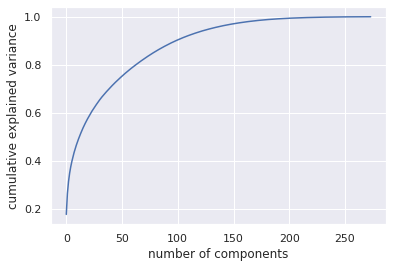

In [0]:
#plot cumulative explained variance and number of components ratio
pca = PCA().fit(sctfidfStr1DFIName)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [0]:
pca = PCA(n_components=0.90)
principalComponents = pca.fit_transform(sctfidfStr1DFIName)
#np.sum(pca.explained_variance_ratio_)
pca.n_components_

100

##PCA Analysis with 90% data or PCA with 100 Components

In [0]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1DFIName)
PCtfidfDFIName = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

In [0]:
PCtfidfDFIName

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,...,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100
0,33.659919,16.845705,22.056355,18.025715,14.535569,18.070253,-4.098395,-2.427499,4.990904,5.773517,6.491863,-1.485482,1.023722,4.551097,6.435641,2.073227,11.407924,5.557259,7.379359,3.352279,3.412317,-2.074844,5.571021,-2.513564,-0.365695,1.298413,0.406090,-0.021367,-3.673980,-0.659960,2.600602,-0.015182,5.309165,3.333585,-4.668275,2.588323,0.707954,1.647794,4.342784,-0.566452,...,1.742797,7.148116,-0.589261,-0.043840,-1.171641,-0.728453,3.108757,3.203445,-1.383254,3.705560,5.421934,5.510283,0.706266,2.886265,-1.788322,1.580525,1.022745,4.626824,-0.395574,1.235343,-1.209675,0.655302,-1.747543,0.115400,1.215515,-0.764982,1.693811,-1.402697,3.064531,-0.294570,3.895929,2.583889,-2.727071,-1.853787,1.015611,-0.478273,1.729599,3.887945,6.002194,-1.749044
1,32.059059,16.371838,22.230297,18.093036,14.374396,17.304661,-3.720650,-2.634503,4.566170,6.661517,6.373919,-2.037219,0.928053,5.392905,7.121513,1.972565,12.165342,6.308707,7.413018,3.604596,3.744984,-2.793386,6.579107,-3.523198,-0.968639,1.021255,-0.436758,0.090712,-3.640534,-0.352315,3.300907,0.705112,6.791765,4.208553,-3.878589,0.853732,0.347931,1.500308,4.998348,-0.944057,...,2.130893,6.835052,-1.631669,0.766030,-1.277054,1.243290,2.822840,1.295377,-0.462455,4.154670,5.568610,4.549491,-0.242413,4.010493,-0.291219,1.298612,1.171363,3.725458,-0.916299,0.265540,-3.068222,2.100722,0.532289,-0.074829,-2.349473,0.981891,0.473259,0.226604,2.526826,0.927843,0.852538,1.996339,0.370855,-0.250892,0.069966,0.212391,-0.117685,1.703719,1.011722,-1.788295
2,32.069865,16.478986,22.408689,17.966501,14.568482,16.679271,-3.166329,-2.786097,4.413380,6.821159,6.682016,-1.985559,1.482526,6.422709,5.969973,1.629409,11.970112,6.222387,7.509247,3.388032,3.215721,-2.441612,7.170269,-2.726510,-0.778428,0.606012,-0.457623,0.454049,-3.747532,-0.071619,3.863309,0.069839,6.767344,4.055899,-3.234125,0.298557,0.035787,1.460843,5.694474,-0.432067,...,1.245173,5.592941,-1.231432,1.277574,-1.522715,1.423702,3.099995,2.914192,-0.735762,4.322031,5.239113,3.483926,0.740277,3.720155,-0.223900,1.551602,1.165363,3.156769,-1.076896,0.178129,-2.952801,2.015398,0.664383,1.114010,-1.958705,1.549314,0.704897,0.150809,1.905711,1.154100,0.830008,2.313292,0.222940,-0.363535,-0.307716,0.496246,-0.606188,1.562825,0.991194,-1.632813
3,32.146225,16.353822,22.438616,17.859578,14.197738,16.589856,-3.137336,-2.751979,4.687428,6.653621,7.226237,-1.518835,1.943533,6.180911,5.676038,1.411941,11.320030,5.895549,6.860528,4.139174,2.630779,-3.240046,6.649585,-2.879564,-0.754287,0.216491,-0.856653,0.622316,-3.705188,-0.253196,4.182216,0.355242,6.600135,3.724345,-2.480345,0.151066,-1.032399,0.971695,6.271009,-1.200943,...,1.870459,7.023219,-1.553243,1.525367,-2.238646,2.490569,2.403707,2.904189,-0.158404,3.799811,3.933840,3.015728,0.706145,3.100273,-0.889752,2.039910,0.600847,2.491243,-0.213693,0.614652,-2.556049,1.707643,0.205388,1.286508,-2.246353,1.045205,1.401923,0.105219,2.050327,1.176710,1.343959,2.521379,1.189947,0.590922,-0.620774,-0.084523,-0.879788,0.812805,0.977105,-1.309095
4,32.146225,16.353822,22.438616,17.859578,14.197738,16.589856,-3.137336,-2.751979,4.687428,6.653621,7.226237,-1.518835,1.943533,6.180911,5.676038,1.411941,11.320030,5.895549,6.860528,4.139174,2.630779,-3.240046,6.649585,-2.879564,-0.754287,0.216491,-0.856653,0.622316,-3.705188,-0.253196,4.182216,0.355242,6.600135,3.724345,-2.480345,0.151066,-1.032399,0.971695,6.271009,-1.200943,...,1.870459,7.023219,-1.553243,1.525367,-2.238646,2.490569,2.403707,2.904189,-0.158404,3.799811,3.933840,3.015728

In [0]:
pca.explained_variance_ratio_

array([0.17563305, 0.08713465, 0.04997049, 0.03512283, 0.02673217,
       0.02206963, 0.01963181, 0.01770401, 0.01596328, 0.01451358,
       0.01358469, 0.01272369, 0.01205347, 0.01157109, 0.01103654,
       0.01071107, 0.01013689, 0.00939399, 0.00914321, 0.00880679,
       0.00824875, 0.00821411, 0.0080021 , 0.0079648 , 0.00717114,
       0.00708517, 0.00703435, 0.00676441, 0.00668073, 0.00653554,
       0.00639121, 0.00609518, 0.00583661, 0.00556006, 0.00546187,
       0.00538946, 0.00521667, 0.00509765, 0.00507471, 0.00496949,
       0.00493169, 0.0048708 , 0.00480427, 0.00470632, 0.00455083,
       0.00448841, 0.00445697, 0.00436491, 0.00431486, 0.00426305,
       0.00422689, 0.00412449, 0.00406928, 0.0040523 , 0.00397202,
       0.00386566, 0.00386316, 0.00380562, 0.00377682, 0.00372016,
       0.00358598, 0.00354487, 0.00351746, 0.00350622, 0.00345695,
       0.00342395, 0.00339008, 0.00334479, 0.00329249, 0.00325956,
       0.00322635, 0.00318411, 0.00312719, 0.00310428, 0.00309

  * Plot PCA Variance for 100 components

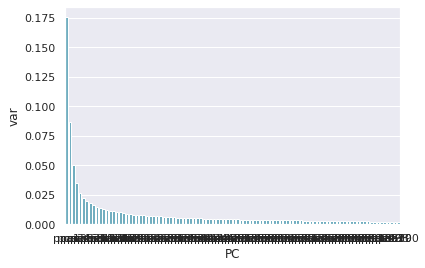

In [0]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

# **Silhouette Analysis**

  * Silhouette Analysis with TFIDF Item Name data

In [0]:
tfidfItemNameStr1DF.describe()

,400w-power-inverter,600w-power-inverter,alan,allview,amazon,amoi,apartment,apple,archos,asus,at&t,australian-shepherd,backup-camera,benq,benq-siemens,bike-hauler,blackberry,blackview,bmc,bobble-head,bose-speakers,boxer,bq,bronze,built-in-phone,bungalow,cabin,cannondale,car-sales-decal,carriage/coach,cd-changer,cd-player,celkon,chalet,chevy-210,chevy-a-20,chevy-ajax,chevy-astro,chevy-avalanche,chevy-beretta,...,rolling-pin,safety-hammer,samsung,saturn-ion,saturn-sky,seatbelt-cutter,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,socket-set,solor-powered-vent,sony,spare-tire-cover,sport-package,suction-grip,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-fortuner,toyota-isis,toyota-land-cruiser,toyota-porte,toyota-premio,toyota-prius,toyota-tacoma,toyota-tundra,toyota-voxy,trek,ultramarine,vehicle-cover,vent-clip-on-air-freshener,wheelchair-ramp,wnd,worksman-cycles
count,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,...,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000,31244.000000
mean,0.575283,0.603895,0.477075,0.533959,0.567192,0.714756,0.549169,0.344633,0.585172,0.791233,0.537756,0.685576,0.478563,0.253811,0.553090,0.556710,0.539056,0.720284,0.501227,0.637176,0.458476,0.732702,0.300452,0.238905,0.635212,0.618772,0.606615,0.464889,0.509189,0.506535,0.237263,0.159268,0.302617,0.588809,0.717061,0.193776,0.977853,0.791433,0.028306,0.634918,...,0.081633,0.622321,0.389281,0.590739,0.772248,0.460727,0.945006,0.500406,0.501128,0.061791,0.605136,0.580331,0.521355,0.497989,0.509890,0.566849,0.624026,0.606169,0.584929,0.558325,0.611123,0.591597,0.579500,0.604151,0.782171,0.477053,0.688563,0.716672,0.508403,0.978315,0.627448,0.595649,0.577517,0.339698,0.740867,0.536747,0.236322,0.548511,0.388148,0.497688
std,0.214043,0.163143,0.141525,0.170986,0.156427,0.191260,0.147104,0.173029,0.156137,0.262140,0.164612,0.279437,0.066215,0.370547,0.152694,0.174426,0.167906,0.190602,0.143603,0.281903,0.146040,0.146448,0.340501,0.334085,0.189801,0.149123,0.250844,0.143529,0.166954,0.170230,0.279456,0.272362,0.349865,0.224646,0.190183,0.327897,0.073935,0.402448,0.150608,0.212461,...,0.208761,0.148953,0.148050,0.173101,0.282590,0.327534,0.134501,0.170797,0.143975,0.235566,0.140114,0.153230,0.148713,0.134867,0.220255,0.256968,0.164578,0.168393,0.183876,0.173946,0.214635,0.194364,0.207475,0.195680,0.222263,0.460167,0.319683,0.325355,0.450873,0.102124,0.200635,0.207377,0.178036,0.289022,0.128999,0.149100,0.356323,0.204276,0.158721,0.147991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630155,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [0]:
from sklearn.preprocessing import StandardScaler
sctfidfStr1DFIName = StandardScaler().fit_transform(tfidfItemNameStr1DF)
sctfidfStr1DFIName

array([[-2.68773616, -3.7016893 , -3.37100846, ..., -2.68518518,
        -2.44550908, -3.36302657],
       [-2.68773616, -3.7016893 , -3.37100846, ..., -2.68518518,
        -2.44550908, -3.36302657],
       [-2.68773616, -3.7016893 , -3.37100846, ..., -2.68518518,
         0.69418712, -3.36302657],
       ...,
       [-1.13175498, -0.63855332,  0.25194631, ...,  0.53942613,
        -1.33874663, -0.32623211],
       [-1.13175498, -0.63855332,  0.25194631, ...,  0.53942613,
        -1.56091817, -0.32623211],
       [-1.13175498, -0.63855332,  0.25194631, ...,  0.53942613,
        -1.56091817, -0.32623211]])

  * TFIDF TCA explained_variance_ratio_ Analysis

In [0]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1DFIName)
np.sum(pca.explained_variance_ratio_)

0.9008000708217151

##PCA Analysis using 100 components (90% of TFIDF Data)

In [0]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1DFIName)
pcatfidfStr1DFIName = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from collections import Counter

clsAvgCheck = 0.15

cluster = []
clusterRange = range(2,11)
print("::::The cluster value Silhouette calculation:::::")
for clusterVal in clusterRange:
    clusterer = KMeans(n_clusters=clusterVal, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(pcatfidfStr1DFIName)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(pcatfidfStr1DFIName, cluster_labels)
    print("---------------------------------------------------------------------")
    #print("For clusterVal =", clusterVal,
    #      "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pcatfidfStr1DFIName, cluster_labels)
    negativeCount =0
    print()
    print("The cluster level silhouette scores of ", clusterVal, " clusters: ")
    for i in range(clusterVal):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        print("------------------------------")
        print("For clusterVal = ", i,
              "The size of cluster : ", size_cluster_i,
              ", Minimum Silhouette Value = ", ith_cluster_silhouette_values[0],
              ", Maximum Silhouette Value = ", ith_cluster_silhouette_values[size_cluster_i-1])
        if ith_cluster_silhouette_values[0] < 0:
            print("Number of silhouette scores less than 0: ", len(ith_cluster_silhouette_values[ith_cluster_silhouette_values<0]))
            negativeCount = negativeCount+len(ith_cluster_silhouette_values[ith_cluster_silhouette_values<0])
        calAvgClsSilScore = sum(ith_cluster_silhouette_values)/size_cluster_i
        print("For cluster = ", i, ", The average cluster silhouette score = ", calAvgClsSilScore)
        
        if calAvgClsSilScore >= clsAvgCheck:
          cluster.append(clusterVal)
    print()
    print("Overall positive silhouette score accuracy for ", clusterVal, " clusters = ", (sample_silhouette_values.shape[0]-negativeCount)/sample_silhouette_values.shape[0])


print()
clusterList = set(cluster)
print("Clusters with above average threshold: ", clusterList)
print("{Cluster Value: Number of cluster above silhouette threshold}", Counter(cluster))
most_common,num_most_common = Counter(cluster).most_common(1)[0]
print("Recommended Cluster: ", most_common)

::::The cluster value Silhouette calculation:::::
---------------------------------------------------------------------

The cluster level silhouette scores of  2  clusters: 
------------------------------
For clusterVal =  0 The size of cluster :  3359 , Minimum Silhouette Value =  -0.10772309245880282 , Maximum Silhouette Value =  0.25907015385691257
Number of silhouette scores less than 0:  253
For cluster =  0 , The average cluster silhouette score =  0.13868999986373767
------------------------------
For clusterVal =  1 The size of cluster :  27885 , Minimum Silhouette Value =  0.12324059236507934 , Maximum Silhouette Value =  0.4386803478469235
For cluster =  1 , The average cluster silhouette score =  0.38352104905438444

Overall positive silhouette score accuracy for  2  clusters =  0.9919024452694918
---------------------------------------------------------------------

The cluster level silhouette scores of  3  clusters: 
------------------------------
For clusterVal =  0 The

The average silhouette scores :
For clusterVal = 9 The average silhouette_score is : 0.11789709767334133

The cluster level silhouette scores of  9  clusters: 
For clusterVal =  0 The size of cluster :  5783 , Minimum Silhouette Value =  -0.011608588438616124 , Maximum Silhouette Value =  0.1410601711051636
Number of silhouette scores less than 0:  106
For clusterVal =  1 The size of cluster :  1055 , Minimum Silhouette Value =  0.0011140575235805182 , Maximum Silhouette Value =  0.3903094936194293
For clusterVal =  2 The size of cluster :  1853 , Minimum Silhouette Value =  0.026511790057752095 , Maximum Silhouette Value =  0.2461600289399062
For clusterVal =  3 The size of cluster :  6383 , Minimum Silhouette Value =  -0.046252465605229366 , Maximum Silhouette Value =  0.14088221434330928
Number of silhouette scores less than 0:  27
For clusterVal =  4 The size of cluster :  5686 , Minimum Silhouette Value =  0.02019124752006663 , Maximum Silhouette Value =  0.17971418352739538
For c

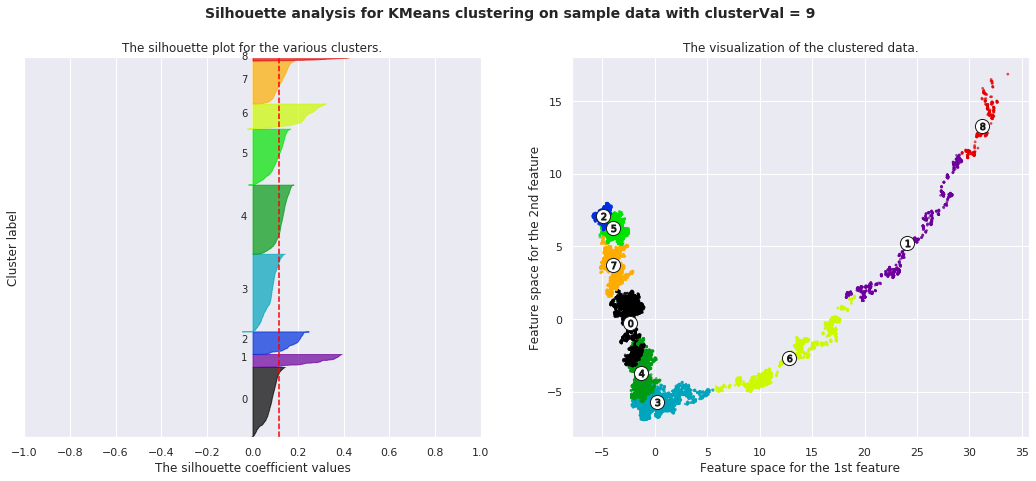

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

clusterRange = range(9,10)

for clusterVal in clusterRange:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # The (clusterVal+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pcatfidfStr1DFIName) + (clusterVal + 1) * 10])

    #clusterer = KMeans(n_clusters=clusterVal, random_state=10)
    #cluster_labels = clusterer.fit_predict(pcatfidfStr1DFIName)

    clusterer = KMeans(n_clusters=clusterVal, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(pcatfidfStr1DFIName)
    cluster_labels = clusterer.labels_

    #silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pcatfidfStr1DFIName, cluster_labels)
    print("The average silhouette scores :")
    print("For clusterVal =", clusterVal,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pcatfidfStr1DFIName, cluster_labels)

    y_lower = 10
    negativeCount =0
    print()
    print("The cluster level silhouette scores of ", clusterVal, " clusters: ")
    for i in range(clusterVal):
      
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        print("For clusterVal = ", i,
              "The size of cluster : ", size_cluster_i,
              ", Minimum Silhouette Value = ", ith_cluster_silhouette_values[0],
              ", Maximum Silhouette Value = ", ith_cluster_silhouette_values[size_cluster_i-1])
        if ith_cluster_silhouette_values[0] < 0:
            print("Number of silhouette scores less than 0: ", len(ith_cluster_silhouette_values[ith_cluster_silhouette_values<0]))
            negativeCount = negativeCount+len(ith_cluster_silhouette_values[ith_cluster_silhouette_values<0])
        color = cm.nipy_spectral(float(i) / clusterVal)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    print()
    print("Positive silhouette score accuracy for ", clusterVal, " clusters = ", (sample_silhouette_values.shape[0]-negativeCount)/sample_silhouette_values.shape[0])
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / clusterVal)
    ax2.scatter(pcatfidfStr1DFIName['pca1'], pcatfidfStr1DFIName['pca2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with clusterVal = %d" % clusterVal),
                 fontsize=14, fontweight='bold')   

plt.show()

###TF1 Cluster analysis with 9 clusters using KMeans

In [0]:
clustering_kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
pcatfidfStr1DFIName['clusters'] = clustering_kmeans.fit_predict(pcatfidfStr1DFIName)

In [0]:
#check PCA TFIDF Data description with cluster information
pcatfidfStr1DFIName.describe()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,...,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,clusters
count,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,...,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,3.124400e+04,31244.00000
mean,-1.589326e-14,-1.546438e-16,-6.361005e-16,4.512074e-15,1.409646e-15,-1.853309e-16,6.647977e-16,1.888680e-15,-4.963952e-16,5.934882e-17,8.845397e-16,-5.699505e-16,-4.592551e-16,2.714794e-18,2.390725e-16,3.591986e-16,-5.263574e-16,-7.206216e-16,1.277890e-16,-3.380452e-16,-2.055000e-16,2.572739e-16,1.288417e-17,1.120812e-16,-1.614876e-16,1.939515e-16,3.738670e-16,3.556239e-16,-1.007388e-16,-1.276096e-16,3.460013e-16,3.467262e-16,-8.460636e-17,-4.502188e-16,2.630295e-16,-3.016336e-16,-3.206664e-16,4.301679e-16,1.985318e-16,3.311587e-16,...,-7.660908e-16,9.950468e-16,-4.792820e-17,3.135037e-16,9.417778e-16,3.843424e-16,3.776300e-16,6.356181e-16,2.221601e-16,5.930920e-16,-4.659057e-16,-3.865739e-16,-1.312221e-15,1.165649e-15,-1.365256e-15,-1.434200e-15,-1.372508e-15,-2.606416e-18,1.925861e-15,1.960337e-16,-1.027678e-15,-5.818100e-16,-6.452789e-16,-5.409832e-16,-8.272164e-16,1.395309e-15,9.095716e-17,-1.371682e-16,-2.469166e-16,-1.626149e-15,5.384923e-16,4.169661e-16,2.886344e-16,-8.568623e-16,-3.472574e-16,4.070628e-16,1.020855e-16,1.024209e-15,8.988599e-16,3.58312
std,6.937218e+00,4.886272e+00,3.700318e+00,3.102251e+00,2.706446e+00,2.459120e+00,2.319329e+00,2.202511e+00,2.091430e+00,1.994204e+00,1.929332e+00,1.867191e+00,1.817349e+00,1.780612e+00,1.738997e+00,1.713163e+00,1.666612e+00,1.604380e+00,1.582820e+00,1.553428e+00,1.503405e+00,1.500246e+00,1.480759e+00,1.477303e+00,1.401767e+00,1.393341e+00,1.388336e+00,1.361435e+00,1.352990e+00,1.338203e+00,1.323350e+00,1.292333e+00,1.264632e+00,1.234296e+00,1.223363e+00,1.215236e+00,1.195572e+00,1.181878e+00,1.179204e+00,1.166939e+00,...,9.854041e-01,9.816426e-01,9.797527e-01,9.730714e-01,9.689516e-01,9.631129e-01,9.572661e-01,9.500521e-01,9.448678e-01,9.405388e-01,9.334950e-01,9.266106e-01,9.222882e-01,9.199579e-01,9.137960e-01,9.029484e-01,8.969581e-01,8.820978e-01,8.809554e-01,8.758670e-01,8.669215e-01,8.609585e-01,8.566609e-01,8.496460e-01,8.439453e-01,8.405058e-01,8.263769e-01,8.236435e-01,8.165025e-01,8.124460e-01,8.086994e-01,8.003640e-01,7.889784e-01,7.790962e-01,7.716785e-01,7.704987e-01,7.656278e-01,7.512540e-01,7.363596e-01,2.21273
min,-5.913220e+00,-6.950311e+00,-9.641437e+00,-6.478971e+00,-6.642332e+00,-9.057518e+00,-6.291520e+00,-5.142066e+00,-4.957846e+00,-6.450972e+00,-4.399077e+00,-5.444552e+00,-6.192563e+00,-4.398582e+00,-6.072022e+00,-4.348296e+00,-8.072881e+00,-6.041425e+00,-5.229411e+00,-4.316092e+00,-4.591697e+00,-5.733341e+00,-4.018369e+00,-4.445762e+00,-4.4495

In [0]:
itemNameDataStr1.head()

,StoreID,PeriodID,TicketID,ItemName,Sales
0,1,20180801,1,Chevy-Ajax,499
1,1,20180801,2,Chevy-Spark,499
2,1,20180801,3,Chevy-Colorado Chevy-Gemini WND WND,1478
3,1,20180801,4,Luxury-Package Apple Apple Ford-Expedition Bos...,1705
4,1,20180801,5,Chevy-Spark,499


N represents the number of clusters. Here N =9

In [0]:
itemNameNclsStr1DF= itemNameDataStr1

In [0]:
itemNameNclsStr1DF['clusters'] = pcatfidfStr1DFIName['clusters']

In [0]:
#ItemName Data with 2 Cluster Analysis
itemNameNclsStr1DF.describe()

,StoreID,PeriodID,TicketID,Sales,clusters
count,31244.0,3.124400e+04,31244.000000,31244.000000,31244.00000
mean,1.0,2.018637e+07,51.194213,1595.936628,3.58312
std,0.0,4.672158e+03,34.528420,1012.699395,2.21273
min,1.0,2.018080e+07,1.000000,0.000000,0.00000
25%,1.0,2.018110e+07,24.000000,948.000000,3.00000
50%,1.0,2.019013e+07,47.000000,1387.000000,4.00000
75%,1.0,2.019051e+07,72.000000,2056.000000,6.00000
max,1.0,2.019073e+07,249.000000,50000.000000,8.00000


In [0]:
# execute below code only to drop cluster column from dataframe
itemNameDataStr1 = itemNameDataStr1.drop(itemNameDataStr1.columns[-1],axis=1)

#**Cluster Summary Analysis - Base period**

  * Store ID 1 Aug 2018 - Jul 2019
  * PCA with 100 Components
  * 9 cluster recognition
  * itemNameNclsStr1DF dataframe for Analysis

##**ItemName 9 Cluster Summary Analysis**

In [0]:
itemNameNclsS1DFCls0 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 0]
itemNameNclsS1DFCls1 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 1]
itemNameNclsS1DFCls2 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 2]
itemNameNclsS1DFCls3 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 3]
itemNameNclsS1DFCls4 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 4]
itemNameNclsS1DFCls5 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 5]
itemNameNclsS1DFCls6 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 6]
itemNameNclsS1DFCls7 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 7]
itemNameNclsS1DFCls8 = itemNameNclsStr1DF[itemNameNclsStr1DF['clusters'] == 8]

In [0]:
TotalTcktIdsNcls0 = len(itemNameNclsS1DFCls0)
TotalTcktIdsNcls1 = len(itemNameNclsS1DFCls1)
TotalTcktIdsNcls2 = len(itemNameNclsS1DFCls2)
TotalTcktIdsNcls3 = len(itemNameNclsS1DFCls3)
TotalTcktIdsNcls4 = len(itemNameNclsS1DFCls4)
TotalTcktIdsNcls5 = len(itemNameNclsS1DFCls5)
TotalTcktIdsNcls6 = len(itemNameNclsS1DFCls6)
TotalTcktIdsNcls7 = len(itemNameNclsS1DFCls7)
TotalTcktIdsNcls8 = len(itemNameNclsS1DFCls8)

TotalSalesNcls0 = itemNameNclsS1DFCls0['Sales'].sum()
AvgSalesNcls0 = itemNameNclsS1DFCls0['Sales'].mean()

TotalSalesNcls1 = itemNameNclsS1DFCls1['Sales'].sum()
AvgSalesNcls1 = itemNameNclsS1DFCls1['Sales'].mean()

TotalSalesNcls2 = itemNameNclsS1DFCls2['Sales'].sum()
AvgSalesNcls2 = itemNameNclsS1DFCls2['Sales'].mean()

TotalSalesNcls3 = itemNameNclsS1DFCls3['Sales'].sum()
AvgSalesNcls3 = itemNameNclsS1DFCls3['Sales'].mean()

TotalSalesNcls4 = itemNameNclsS1DFCls4['Sales'].sum()
AvgSalesNcls4 = itemNameNclsS1DFCls4['Sales'].mean()

TotalSalesNcls5 = itemNameNclsS1DFCls5['Sales'].sum()
AvgSalesNcls5 = itemNameNclsS1DFCls5['Sales'].mean()

TotalSalesNcls6 = itemNameNclsS1DFCls6['Sales'].sum()
AvgSalesNcls6 = itemNameNclsS1DFCls6['Sales'].mean()

TotalSalesNcls7 = itemNameNclsS1DFCls7['Sales'].sum()
AvgSalesNcls7 = itemNameNclsS1DFCls7['Sales'].mean()

TotalSalesNcls8 = itemNameNclsS1DFCls8['Sales'].sum()
AvgSalesNcls8 = itemNameNclsS1DFCls8['Sales'].mean()


print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsS1DFCls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsS1DFCls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsS1DFCls0[itemNameNclsS1DFCls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 10000) & (itemNameNclsS1DFCls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 6000) & (itemNameNclsS1DFCls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 2000) & (itemNameNclsS1DFCls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 1000) & (itemNameNclsS1DFCls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsS1DFCls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsS1DFCls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsS1DFCls1[itemNameNclsS1DFCls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 10000) & (itemNameNclsS1DFCls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 6000) & (itemNameNclsS1DFCls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 2000) & (itemNameNclsS1DFCls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 1000) & (itemNameNclsS1DFCls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsS1DFCls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsS1DFCls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsS1DFCls2[itemNameNclsS1DFCls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 10000) & (itemNameNclsS1DFCls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 6000) & (itemNameNclsS1DFCls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 2000) & (itemNameNclsS1DFCls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 1000) & (itemNameNclsS1DFCls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsS1DFCls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsS1DFCls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsS1DFCls3[itemNameNclsS1DFCls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 10000) & (itemNameNclsS1DFCls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 6000) & (itemNameNclsS1DFCls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 2000) & (itemNameNclsS1DFCls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 1000) & (itemNameNclsS1DFCls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsS1DFCls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsS1DFCls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsS1DFCls4[itemNameNclsS1DFCls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 10000) & (itemNameNclsS1DFCls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 6000) & (itemNameNclsS1DFCls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 2000) & (itemNameNclsS1DFCls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 1000) & (itemNameNclsS1DFCls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsS1DFCls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsS1DFCls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsS1DFCls5[itemNameNclsS1DFCls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 10000) & (itemNameNclsS1DFCls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 6000) & (itemNameNclsS1DFCls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 2000) & (itemNameNclsS1DFCls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 1000) & (itemNameNclsS1DFCls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsS1DFCls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsS1DFCls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsS1DFCls6[itemNameNclsS1DFCls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 10000) & (itemNameNclsS1DFCls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 6000) & (itemNameNclsS1DFCls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 2000) & (itemNameNclsS1DFCls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 1000) & (itemNameNclsS1DFCls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsS1DFCls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsS1DFCls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsS1DFCls7[itemNameNclsS1DFCls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 10000) & (itemNameNclsS1DFCls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 6000) & (itemNameNclsS1DFCls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 2000) & (itemNameNclsS1DFCls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 1000) & (itemNameNclsS1DFCls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNcls8}")
print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNcls8}")
print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNcls8}")
print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsS1DFCls8['Sales'])}")
print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsS1DFCls8['Sales'])}")
print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsS1DFCls8[itemNameNclsS1DFCls8['Sales'] >= 10000]))
print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 10000) & (itemNameNclsS1DFCls8['Sales'] >= 6000)]))
print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 6000) & (itemNameNclsS1DFCls8['Sales'] >= 2000)]))
print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 2000) & (itemNameNclsS1DFCls8['Sales'] >= 1000)]))
print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 1000) & (itemNameNclsS1DFCls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 5793
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $9242543
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1595.4674607284653
 The min Sales Amount of a Cluster 1 ticket: $0
 The max Sales Amount of a Cluster 1 ticket: $13801
Number of tickets in cluster 1 with Sales > 10000 :  2
Number of tickets in cluster 1 with Sales > 6000 :  23
Number of tickets in cluster 1 with Sales > 2000 :  1559
Number of tickets in cluster 1 with Sales > 1000 :  2388
Number of tickets in cluster 1 with Sales < 1000 :  1821

 The total number of ticket ids in Cluster 2 of 9 clusters: 796
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1292816
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1624.140703517588
 The min Sales Amount of a Cluster 2 ticket: $0
 The max Sales Amount of a Cluster 2 ticket: $9722
Number of tickets in 

In [0]:
clsAnlysDF = pd.DataFrame(columns = ['TF', 'PCAComponents', 'NoClusters','TtlTicketIdcls1', 'TtlTicketIdcls2','TtlTicketIdcls3','TtlTicketIdcls4','TtlTicketIdcls5','TtlTicketIdcls6','TtlTicketIdcls7','TtlTicketIdcls8','TtlTicketIdcls9',
'TtlSalesAmountCls1','TtlSalesAmountCls2','TtlSalesAmountCls3','TtlSalesAmountCls4','TtlSalesAmountCls5','TtlSalesAmountCls6','TtlSalesAmountCls7','TtlSalesAmountCls8','TtlSalesAmountCls9',
'AvgSalesAmountCls1','AvgSalesAmountCls2','AvgSalesAmountCls3','AvgSalesAmountCls4','AvgSalesAmountCls5','AvgSalesAmountCls6','AvgSalesAmountCls7','AvgSalesAmountCls8','AvgSalesAmountCls9',
'MinSalesAmountCls1', 'MaxSalesAmountCls1','Cls1Blw10', 'Cls1Blw20','Cls1Blw60','Cls1Blw100', 'Cls1Abv100',
'MinSalesAmountCls2', 'MaxSalesAmountCls2','Cls2Blw10', 'Cls2Blw20','Cls2Blw60','Cls2Blw100', 'Cls2Abv100',
'MinSalesAmountCls3', 'MaxSalesAmountCls3','Cls3Blw10', 'Cls3Blw20','Cls3Blw60','Cls3Blw100', 'Cls3Abv100',
'MinSalesAmountCls4', 'MaxSalesAmountCls4','Cls4Blw10', 'Cls4Blw20','Cls4Blw60','Cls4Blw100', 'Cls4Abv100',
'MinSalesAmountCls5', 'MaxSalesAmountCls5','Cls5Blw10', 'Cls5Blw20','Cls5Blw60','Cls5Blw100', 'Cls5Abv100',
'MinSalesAmountCls6', 'MaxSalesAmountCls6','Cls6Blw10', 'Cls6Blw20','Cls6Blw60','Cls6Blw100', 'Cls6Abv100',
'MinSalesAmountCls7', 'MaxSalesAmountCls7','Cls7Blw10', 'Cls7Blw20','Cls7Blw60','Cls7Blw100', 'Cls7Abv100',
'MinSalesAmountCls8', 'MaxSalesAmountCls8','Cls8Blw10', 'Cls8Blw20','Cls8Blw60','Cls8Blw100', 'Cls8Abv100',
'MinSalesAmountCls9', 'MaxSalesAmountCls9','Cls9Blw10', 'Cls9Blw20','Cls9Blw60','Cls9Blw100', 'Cls9Abv100'])

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Base', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNcls0, 'TtlTicketIdcls2':TotalTcktIdsNcls1,'TtlTicketIdcls3':TotalTcktIdsNcls2,'TtlTicketIdcls4':TotalTcktIdsNcls3,'TtlTicketIdcls5':TotalTcktIdsNcls4,'TtlTicketIdcls6':TotalTcktIdsNcls5,'TtlTicketIdcls7':TotalTcktIdsNcls6,'TtlTicketIdcls8':TotalTcktIdsNcls7,'TtlTicketIdcls9':TotalTcktIdsNcls8,
                     'TtlSalesAmountCls1':TotalSalesNcls0,'TtlSalesAmountCls2':TotalSalesNcls1,'TtlSalesAmountCls3':TotalSalesNcls2,'TtlSalesAmountCls4':TotalSalesNcls3,'TtlSalesAmountCls5':TotalSalesNcls4,'TtlSalesAmountCls6':TotalSalesNcls5,'TtlSalesAmountCls7':TotalSalesNcls6,'TtlSalesAmountCls8':TotalSalesNcls7,'TtlSalesAmountCls9':TotalSalesNcls8,
                     'AvgSalesAmountCls1':AvgSalesNcls0,'AvgSalesAmountCls2':AvgSalesNcls1,'AvgSalesAmountCls3':AvgSalesNcls2,'AvgSalesAmountCls4':AvgSalesNcls3,'AvgSalesAmountCls5':AvgSalesNcls4,'AvgSalesAmountCls6':AvgSalesNcls5,'AvgSalesAmountCls7':AvgSalesNcls6,'AvgSalesAmountCls8':AvgSalesNcls7,'AvgSalesAmountCls9':AvgSalesNcls8,
			                'MinSalesAmountCls1':min(itemNameNclsS1DFCls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsS1DFCls0['Sales']),'Cls1Blw10':len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 1000) & (itemNameNclsS1DFCls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 2000) & (itemNameNclsS1DFCls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 6000) & (itemNameNclsS1DFCls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsS1DFCls0[(itemNameNclsS1DFCls0['Sales'] < 10000) & (itemNameNclsS1DFCls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsS1DFCls0[itemNameNclsS1DFCls0['Sales'] >= 10000]),
			                'MinSalesAmountCls2':min(itemNameNclsS1DFCls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsS1DFCls1['Sales']),'Cls2Blw10':len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 1000) & (itemNameNclsS1DFCls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 2000) & (itemNameNclsS1DFCls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 6000) & (itemNameNclsS1DFCls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsS1DFCls1[(itemNameNclsS1DFCls1['Sales'] < 10000) & (itemNameNclsS1DFCls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsS1DFCls1[itemNameNclsS1DFCls1['Sales'] >= 10000]),
			                'MinSalesAmountCls3':min(itemNameNclsS1DFCls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsS1DFCls2['Sales']),'Cls3Blw10':len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 1000) & (itemNameNclsS1DFCls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 3000) & (itemNameNclsS1DFCls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 6000) & (itemNameNclsS1DFCls2['Sales'] >= 2000)]),'Cls3Blw100':len(itemNameNclsS1DFCls2[(itemNameNclsS1DFCls2['Sales'] < 10000) & (itemNameNclsS1DFCls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsS1DFCls2[itemNameNclsS1DFCls2['Sales'] >= 10000]),
			                'MinSalesAmountCls4':min(itemNameNclsS1DFCls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsS1DFCls3['Sales']),'Cls4Blw10':len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 1000) & (itemNameNclsS1DFCls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 3000) & (itemNameNclsS1DFCls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 6000) & (itemNameNclsS1DFCls3['Sales'] >= 2000)]),'Cls4Blw100':len(itemNameNclsS1DFCls3[(itemNameNclsS1DFCls3['Sales'] < 10000) & (itemNameNclsS1DFCls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsS1DFCls3[itemNameNclsS1DFCls3['Sales'] >= 10000]),
			                'MinSalesAmountCls5':min(itemNameNclsS1DFCls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsS1DFCls4['Sales']),'Cls5Blw10':len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 1000) & (itemNameNclsS1DFCls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 3000) & (itemNameNclsS1DFCls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 6000) & (itemNameNclsS1DFCls4['Sales'] >= 2000)]),'Cls5Blw100':len(itemNameNclsS1DFCls4[(itemNameNclsS1DFCls4['Sales'] < 10000) & (itemNameNclsS1DFCls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsS1DFCls4[itemNameNclsS1DFCls4['Sales'] >= 10000]),
			                'MinSalesAmountCls6':min(itemNameNclsS1DFCls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsS1DFCls5['Sales']),'Cls6Blw10':len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 1000) & (itemNameNclsS1DFCls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 3000) & (itemNameNclsS1DFCls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 6000) & (itemNameNclsS1DFCls5['Sales'] >= 2000)]),'Cls6Blw100':len(itemNameNclsS1DFCls5[(itemNameNclsS1DFCls5['Sales'] < 10000) & (itemNameNclsS1DFCls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsS1DFCls5[itemNameNclsS1DFCls5['Sales'] >= 10000]),
			                'MinSalesAmountCls7':min(itemNameNclsS1DFCls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsS1DFCls6['Sales']),'Cls7Blw10':len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 1000) & (itemNameNclsS1DFCls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 3000) & (itemNameNclsS1DFCls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 6000) & (itemNameNclsS1DFCls6['Sales'] >= 2000)]),'Cls7Blw100':len(itemNameNclsS1DFCls6[(itemNameNclsS1DFCls6['Sales'] < 10000) & (itemNameNclsS1DFCls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsS1DFCls6[itemNameNclsS1DFCls6['Sales'] >= 10000]),
			                'MinSalesAmountCls8':min(itemNameNclsS1DFCls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsS1DFCls7['Sales']),'Cls8Blw10':len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 1000) & (itemNameNclsS1DFCls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 3000) & (itemNameNclsS1DFCls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 6000) & (itemNameNclsS1DFCls7['Sales'] >= 2000)]),'Cls8Blw100':len(itemNameNclsS1DFCls7[(itemNameNclsS1DFCls7['Sales'] < 10000) & (itemNameNclsS1DFCls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsS1DFCls7[itemNameNclsS1DFCls7['Sales'] >= 10000]),
			                'MinSalesAmountCls9':min(itemNameNclsS1DFCls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsS1DFCls8['Sales']),'Cls9Blw10':len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 1000) & (itemNameNclsS1DFCls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 3000) & (itemNameNclsS1DFCls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 6000) & (itemNameNclsS1DFCls8['Sales'] >= 2000)]),'Cls9Blw100':len(itemNameNclsS1DFCls8[(itemNameNclsS1DFCls8['Sales'] < 10000) & (itemNameNclsS1DFCls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsS1DFCls8[itemNameNclsS1DFCls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0


#Cluster Summary Analysis - Monthly TimeFrame

1.   Store ID 1
2.   Monthly Time Frame from Aug 2018 - July 2019



In [0]:
#create monthly time frames
#greater than the start date and smaller than the end date

store1Aug18DF = store1DF[(store1DF.PeriodID >= 20180801) & (store1DF.PeriodID <= 20180831)]
store1Sep18DF = store1DF[(store1DF.PeriodID >= 20180901) & (store1DF.PeriodID <= 20180930)]
store1Oct18DF = store1DF[(store1DF.PeriodID >= 20181001) & (store1DF.PeriodID <= 20181031)]
store1Nov18DF = store1DF[(store1DF.PeriodID >= 20181101) & (store1DF.PeriodID <= 20181130)]
store1Dec18DF = store1DF[(store1DF.PeriodID >= 20181201) & (store1DF.PeriodID <= 20181231)]
store1Jan19DF = store1DF[(store1DF.PeriodID >= 20190101) & (store1DF.PeriodID <= 20190131)]
store1Feb19DF = store1DF[(store1DF.PeriodID >= 20190201) & (store1DF.PeriodID <= 20190228)]
store1Mar19DF = store1DF[(store1DF.PeriodID >= 20190301) & (store1DF.PeriodID <= 20190331)]
store1Apr19DF = store1DF[(store1DF.PeriodID >= 20190401) & (store1DF.PeriodID <= 20190430)]
store1May19DF = store1DF[(store1DF.PeriodID >= 20190501) & (store1DF.PeriodID <= 20190531)]
store1Jun19DF = store1DF[(store1DF.PeriodID >= 20190601) & (store1DF.PeriodID <= 20190630)]
store1Jul19DF = store1DF[(store1DF.PeriodID >= 20190701) & (store1DF.PeriodID <= 20190731)]

In [0]:
store1Jul19DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9250 entries, 89425 to 98674
Data columns (total 9 columns):
StoreID         9250 non-null int64
StoreGroup      9250 non-null object
PeriodID        9250 non-null int64
TicketID        9250 non-null int64
ItemName        9250 non-null object
ItemCategory    9250 non-null object
Qty             9250 non-null int64
Sales           9250 non-null int64
Modifier        9250 non-null int64
dtypes: int64(6), object(3)
memory usage: 722.7+ KB


##Data Preparation and Analysis


In [0]:
store1Aug18DF['StoreID'] = store1Aug18DF['StoreID'].astype(str).astype(int)
store1Aug18DF['PeriodID'] = store1Aug18DF['PeriodID'].astype(str).astype(int)
store1Aug18DF['TicketID'] = store1Aug18DF['TicketID'].astype(str).astype(int)
store1Aug18DF['Qty'] = store1Aug18DF['Qty'].astype(str).astype(int)
store1Aug18DF['Sales'] = store1Aug18DF['Sales'].astype(str).astype(int)
store1Aug18DF['Modifier'] = store1Aug18DF['Modifier'].astype(str).astype(int)

store1Sep18DF['StoreID'] = store1Sep18DF['StoreID'].astype(str).astype(int)
store1Sep18DF['PeriodID'] = store1Sep18DF['PeriodID'].astype(str).astype(int)
store1Sep18DF['TicketID'] = store1Sep18DF['TicketID'].astype(str).astype(int)
store1Sep18DF['Qty'] = store1Sep18DF['Qty'].astype(str).astype(int)
store1Sep18DF['Sales'] = store1Sep18DF['Sales'].astype(str).astype(int)
store1Sep18DF['Modifier'] = store1Sep18DF['Modifier'].astype(str).astype(int)

store1Oct18DF['StoreID'] = store1Oct18DF['StoreID'].astype(str).astype(int)
store1Oct18DF['PeriodID'] = store1Oct18DF['PeriodID'].astype(str).astype(int)
store1Oct18DF['TicketID'] = store1Oct18DF['TicketID'].astype(str).astype(int)
store1Oct18DF['Qty'] = store1Oct18DF['Qty'].astype(str).astype(int)
store1Oct18DF['Sales'] = store1Oct18DF['Sales'].astype(str).astype(int)
store1Oct18DF['Modifier'] = store1Oct18DF['Modifier'].astype(str).astype(int)

store1Nov18DF['StoreID'] = store1Nov18DF['StoreID'].astype(str).astype(int)
store1Nov18DF['PeriodID'] = store1Nov18DF['PeriodID'].astype(str).astype(int)
store1Nov18DF['TicketID'] = store1Nov18DF['TicketID'].astype(str).astype(int)
store1Nov18DF['Qty'] = store1Nov18DF['Qty'].astype(str).astype(int)
store1Nov18DF['Sales'] = store1Nov18DF['Sales'].astype(str).astype(int)
store1Nov18DF['Modifier'] = store1Nov18DF['Modifier'].astype(str).astype(int)

store1Dec18DF['StoreID'] = store1Dec18DF['StoreID'].astype(str).astype(int)
store1Dec18DF['PeriodID'] = store1Dec18DF['PeriodID'].astype(str).astype(int)
store1Dec18DF['TicketID'] = store1Dec18DF['TicketID'].astype(str).astype(int)
store1Dec18DF['Qty'] = store1Dec18DF['Qty'].astype(str).astype(int)
store1Dec18DF['Sales'] = store1Dec18DF['Sales'].astype(str).astype(int)
store1Dec18DF['Modifier'] = store1Dec18DF['Modifier'].astype(str).astype(int)

store1Jan19DF['StoreID'] = store1Jan19DF['StoreID'].astype(str).astype(int)
store1Jan19DF['PeriodID'] = store1Jan19DF['PeriodID'].astype(str).astype(int)
store1Jan19DF['TicketID'] = store1Jan19DF['TicketID'].astype(str).astype(int)
store1Jan19DF['Qty'] = store1Jan19DF['Qty'].astype(str).astype(int)
store1Jan19DF['Sales'] = store1Jan19DF['Sales'].astype(str).astype(int)
store1Jan19DF['Modifier'] = store1Jan19DF['Modifier'].astype(str).astype(int)

store1Feb19DF['StoreID'] = store1Feb19DF['StoreID'].astype(str).astype(int)
store1Feb19DF['PeriodID'] = store1Feb19DF['PeriodID'].astype(str).astype(int)
store1Feb19DF['TicketID'] = store1Feb19DF['TicketID'].astype(str).astype(int)
store1Feb19DF['Qty'] = store1Feb19DF['Qty'].astype(str).astype(int)
store1Feb19DF['Sales'] = store1Feb19DF['Sales'].astype(str).astype(int)
store1Feb19DF['Modifier'] = store1Feb19DF['Modifier'].astype(str).astype(int)

store1Mar19DF['StoreID'] = store1Mar19DF['StoreID'].astype(str).astype(int)
store1Mar19DF['PeriodID'] = store1Mar19DF['PeriodID'].astype(str).astype(int)
store1Mar19DF['TicketID'] = store1Mar19DF['TicketID'].astype(str).astype(int)
store1Mar19DF['Qty'] = store1Mar19DF['Qty'].astype(str).astype(int)
store1Mar19DF['Sales'] = store1Mar19DF['Sales'].astype(str).astype(int)
store1Mar19DF['Modifier'] = store1Mar19DF['Modifier'].astype(str).astype(int)

store1Apr19DF['StoreID'] = store1Apr19DF['StoreID'].astype(str).astype(int)
store1Apr19DF['PeriodID'] = store1Apr19DF['PeriodID'].astype(str).astype(int)
store1Apr19DF['TicketID'] = store1Apr19DF['TicketID'].astype(str).astype(int)
store1Apr19DF['Qty'] = store1Apr19DF['Qty'].astype(str).astype(int)
store1Apr19DF['Sales'] = store1Apr19DF['Sales'].astype(str).astype(int)
store1Apr19DF['Modifier'] = store1Apr19DF['Modifier'].astype(str).astype(int)

store1May19DF['StoreID'] = store1May19DF['StoreID'].astype(str).astype(int)
store1May19DF['PeriodID'] = store1May19DF['PeriodID'].astype(str).astype(int)
store1May19DF['TicketID'] = store1May19DF['TicketID'].astype(str).astype(int)
store1May19DF['Qty'] = store1May19DF['Qty'].astype(str).astype(int)
store1May19DF['Sales'] = store1May19DF['Sales'].astype(str).astype(int)
store1May19DF['Modifier'] = store1May19DF['Modifier'].astype(str).astype(int)

store1Jun19DF['StoreID'] = store1Jun19DF['StoreID'].astype(str).astype(int)
store1Jun19DF['PeriodID'] = store1Jun19DF['PeriodID'].astype(str).astype(int)
store1Jun19DF['TicketID'] = store1Jun19DF['TicketID'].astype(str).astype(int)
store1Jun19DF['Qty'] = store1Jun19DF['Qty'].astype(str).astype(int)
store1Jun19DF['Sales'] = store1Jun19DF['Sales'].astype(str).astype(int)
store1Jun19DF['Modifier'] = store1Jun19DF['Modifier'].astype(str).astype(int)

store1Jul19DF['StoreID'] = store1Jul19DF['StoreID'].astype(str).astype(int)
store1Jul19DF['PeriodID'] = store1Jul19DF['PeriodID'].astype(str).astype(int)
store1Jul19DF['TicketID'] = store1Jul19DF['TicketID'].astype(str).astype(int)
store1Jul19DF['Qty'] = store1Jul19DF['Qty'].astype(str).astype(int)
store1Jul19DF['Sales'] = store1Jul19DF['Sales'].astype(str).astype(int)
store1Jul19DF['Modifier'] = store1Jul19DF['Modifier'].astype(str).astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


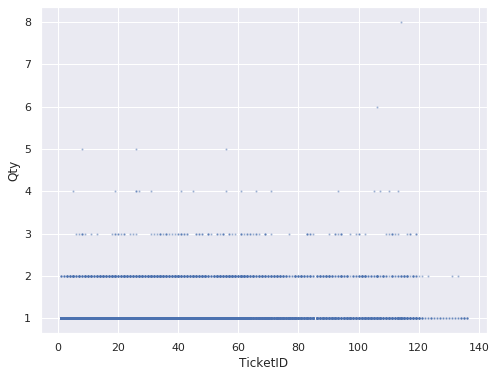

In [0]:
def var_scatter(store1Aug18DF, var):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    store1Aug18DF.plot.scatter(x=var , y="Qty", alpha=0.35, s=1.5, ax=ax)
    return ax
var_scatter(store1Aug18DF, "TicketID");

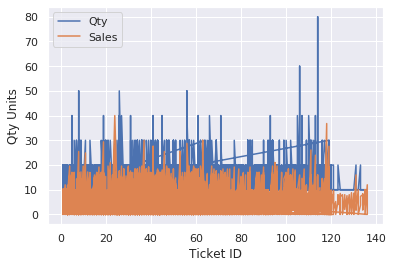

In [0]:
plt.plot(store1Aug18DF.TicketID,store1Aug18DF.Qty * 10)
plt.plot(store1Aug18DF.TicketID,store1Aug18DF.Sales/10**2)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Qty Units')
plt.show()

## Item Name Corpus Document Creation for Each Month Data

In [0]:
def CreateCorpusFromDataFrame(inputData):
    itemNameDict = {}
    id = 1
    try:
        corpusfile = open('itemNameDocumentStr1Jul19.txt', 'w')
        corpusfile.write('StoreID|PeriodID|TicketID|ItemName|Sales\n')

        for index, r in inputData.iterrows():
            storeID = r['StoreID']
            periodID = r['PeriodID']
            ticketID = r['TicketID']
            itemName = r['ItemName']
            qty = r['Qty']
            totalSales = int(r['Sales'])
            testName = ""
            keyVal = str(periodID)+str(ticketID)
            #print(keyVal)

            if keyVal in itemNameDict:
                value = itemNameDict[keyVal]
                c_itemname = value.split('|')[3]
                if qty > 1:
                    for x in range(qty):
                        if testName == "":
                            testName = itemName
                        else:
                            testName =  testName +' '+itemName
                    #print("ItemName:::::::" + testName)
                else:
                    testName = itemName

                n_itemname = c_itemname + ' ' + testName
                #print(":::::::" + n_itemname)
                c_salesValue = int(value.split('|')[4])
                n_salesValue = c_salesValue + totalSales
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(n_itemname) + "|" + str(n_salesValue)
                itemNameDict.update({keyVal: corpusString})
            else:
                if qty > 1:
                    for x in range(qty-1):
                        itemName = itemName + ' ' + itemName
                #print("ItemName:::::::" + itemName)
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(itemName) + "|" + str(totalSales)
                itemNameDict.update({keyVal: corpusString})

            id = id + 1

        for x in itemNameDict:
            corpusfile.write(itemNameDict[x] + '\n')

    finally:
        corpusfile.close()

#execute below method for each month corpus creation
#CreateCorpusFromDataFrame(store1Aug18DF)
#CreateCorpusFromDataFrame(store1Sep18DF)
#CreateCorpusFromDataFrame(store1Oct18DF)
#CreateCorpusFromDataFrame(store1Nov18DF)
#CreateCorpusFromDataFrame(store1Dec18DF)
#CreateCorpusFromDataFrame(store1Jan19DF)
#CreateCorpusFromDataFrame(store1Feb19DF)
#CreateCorpusFromDataFrame(store1Mar19DF)
#CreateCorpusFromDataFrame(store1Apr19DF)
#CreateCorpusFromDataFrame(store1May19DF)
#CreateCorpusFromDataFrame(store1Jun19DF)
CreateCorpusFromDataFrame(store1Jul19DF)

In [0]:

itemNameDataStr1Aug18 = pd.read_csv('itemNameDocumentStr1Aug18.txt', sep="|", engine='python')


itemNameDataStr1Sep18 = pd.read_csv('itemNameDocumentStr1Sep18.txt', sep="|", engine='python')


itemNameDataStr1Oct18 = pd.read_csv('itemNameDocumentStr1Oct18.txt', sep="|", engine='python')


itemNameDataStr1Nov18 = pd.read_csv('itemNameDocumentStr1Nov18.txt', sep="|", engine='python')


itemNameDataStr1Dec18 = pd.read_csv('itemNameDocumentStr1Dec18.txt', sep="|", engine='python')


itemNameDataStr1Jan19 = pd.read_csv('itemNameDocumentStr1Jan19.txt', sep="|", engine='python')

 
itemNameDataStr1Feb19 = pd.read_csv('itemNameDocumentStr1Feb19.txt', sep="|", engine='python')


itemNameDataStr1Mar19 = pd.read_csv('itemNameDocumentStr1Mar19.txt', sep="|", engine='python')


itemNameDataStr1Apr19 = pd.read_csv('itemNameDocumentStr1Apr19.txt', sep="|", engine='python')

 
itemNameDataStr1May19 = pd.read_csv('itemNameDocumentStr1May19.txt', sep="|", engine='python')


itemNameDataStr1Jun19 = pd.read_csv('itemNameDocumentStr1Jun19.txt', sep="|", engine='python')

 
itemNameDataStr1Jul19 = pd.read_csv('itemNameDocumentStr1Jul19.txt', sep="|", engine='python')

In [0]:
itemNameDataStr1Aug18.info()
itemNameDataStr1Sep18.info()
itemNameDataStr1Oct18.info()
itemNameDataStr1Nov18.info()
itemNameDataStr1Dec18.info()
itemNameDataStr1Jan19.info()
itemNameDataStr1Feb19.info()
itemNameDataStr1Mar19.info()
itemNameDataStr1Apr19.info()
itemNameDataStr1May19.info()
itemNameDataStr1Jun19.info()
itemNameDataStr1Jul19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
StoreID     2501 non-null int64
PeriodID    2501 non-null int64
TicketID    2501 non-null int64
ItemName    2501 non-null object
Sales       2501 non-null int64
dtypes: int64(4), object(1)
memory usage: 97.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 5 columns):
StoreID     2557 non-null int64
PeriodID    2557 non-null int64
TicketID    2557 non-null int64
ItemName    2557 non-null object
Sales       2557 non-null int64
dtypes: int64(4), object(1)
memory usage: 100.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 5 columns):
StoreID     2722 non-null int64
PeriodID    2722 non-null int64
TicketID    2722 non-null int64
ItemName    2722 non-null object
Sales       2722 non-null int64
dtypes: int64(4), object(1)
memory usage: 106.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeI

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

In [0]:
#select column to convert to list here
itemNameCorpusStr1Aug18 = itemNameDataStr1Aug18["ItemName"].tolist()
itemNameCorpusStr1Aug18 = [x.lower() for x in itemNameCorpusStr1Aug18]

itemNameCorpusStr1Sep18 = itemNameDataStr1Sep18["ItemName"].tolist()
itemNameCorpusStr1Sep18 = [x.lower() for x in itemNameCorpusStr1Sep18]

itemNameCorpusStr1Oct18 = itemNameDataStr1Oct18["ItemName"].tolist()
itemNameCorpusStr1Oct18 = [x.lower() for x in itemNameCorpusStr1Oct18]

itemNameCorpusStr1Nov18 = itemNameDataStr1Nov18["ItemName"].tolist()
itemNameCorpusStr1Nov18 = [x.lower() for x in itemNameCorpusStr1Nov18]

itemNameCorpusStr1Dec18 = itemNameDataStr1Dec18["ItemName"].tolist()
itemNameCorpusStr1Dec18 = [x.lower() for x in itemNameCorpusStr1Dec18]

itemNameCorpusStr1Jan19 = itemNameDataStr1Jan19["ItemName"].tolist()
itemNameCorpusStr1Jan19 = [x.lower() for x in itemNameCorpusStr1Jan19]

itemNameCorpusStr1Feb19 = itemNameDataStr1Feb19["ItemName"].tolist()
itemNameCorpusStr1Feb19 = [x.lower() for x in itemNameCorpusStr1Feb19]

itemNameCorpusStr1Mar19 = itemNameDataStr1Mar19["ItemName"].tolist()
itemNameCorpusStr1Mar19 = [x.lower() for x in itemNameCorpusStr1Mar19]

itemNameCorpusStr1Apr19 = itemNameDataStr1Apr19["ItemName"].tolist()
itemNameCorpusStr1Apr19 = [x.lower() for x in itemNameCorpusStr1Apr19]

itemNameCorpusStr1May19 = itemNameDataStr1May19["ItemName"].tolist()
itemNameCorpusStr1May19 = [x.lower() for x in itemNameCorpusStr1May19]

itemNameCorpusStr1Jun19 = itemNameDataStr1Jun19["ItemName"].tolist()
itemNameCorpusStr1Jun19 = [x.lower() for x in itemNameCorpusStr1Jun19]

itemNameCorpusStr1Jul19 = itemNameDataStr1Jul19["ItemName"].tolist()
itemNameCorpusStr1Jul19 = [x.lower() for x in itemNameCorpusStr1Jul19]


In [0]:
#set() takes the unique values and set in vocabulary
vocabularyAug = set()
for documentValue in itemNameCorpusStr1Aug18:
    vocabularyAug.update(documentValue.split())
len(vocabularyAug)

#set() takes the unique values and set in vocabulary
vocabularySep = set()
for documentValue in itemNameCorpusStr1Sep18:
    vocabularySep.update(documentValue.split())
len(vocabularySep)

#set() takes the unique values and set in vocabulary
vocabularyOct = set()
for documentValue in itemNameCorpusStr1Oct18:
    vocabularyOct.update(documentValue.split())
len(vocabularyOct)

#set() takes the unique values and set in vocabulary
vocabularyNov = set()
for documentValue in itemNameCorpusStr1Nov18:
    vocabularyNov.update(documentValue.split())
len(vocabularyNov)

#set() takes the unique values and set in vocabulary
vocabularyDec = set()
for documentValue in itemNameCorpusStr1Dec18:
    vocabularyDec.update(documentValue.split())
len(vocabularyDec)

#set() takes the unique values and set in vocabulary
vocabularyJan = set()
for documentValue in itemNameCorpusStr1Jan19:
    vocabularyJan.update(documentValue.split())
len(vocabularyJan)

#set() takes the unique values and set in vocabulary
vocabularyFeb = set()
for documentValue in itemNameCorpusStr1Feb19:
    vocabularyFeb.update(documentValue.split())
len(vocabularyFeb)

#set() takes the unique values and set in vocabulary
vocabularyMar = set()
for documentValue in itemNameCorpusStr1Mar19:
    vocabularyMar.update(documentValue.split())
len(vocabularyMar)

#set() takes the unique values and set in vocabulary
vocabularyApr = set()
for documentValue in itemNameCorpusStr1Apr19:
    vocabularyApr.update(documentValue.split())
len(vocabularyApr)

#set() takes the unique values and set in vocabulary
vocabularyMay = set()
for documentValue in itemNameCorpusStr1May19:
    vocabularyMay.update(documentValue.split())
len(vocabularyMay)

#set() takes the unique values and set in vocabulary
vocabularyJun = set()
for documentValue in itemNameCorpusStr1Jun19:
    vocabularyJun.update(documentValue.split())
len(vocabularyJun)

#set() takes the unique values and set in vocabulary
vocabularyJul = set()
for documentValue in itemNameCorpusStr1Jul19:
    vocabularyJul.update(documentValue.split())
len(vocabularyJul)

207

In [0]:
vocabularyAug = list(vocabularyAug)
vocabularySep = list(vocabularySep)
vocabularyOct = list(vocabularyOct)
vocabularyNov = list(vocabularyNov)
vocabularyDec = list(vocabularyDec)
vocabularyJan = list(vocabularyJan)
vocabularyFeb = list(vocabularyFeb)
vocabularyMar = list(vocabularyMar)
vocabularyApr = list(vocabularyApr)
vocabularyMay = list(vocabularyMay)
vocabularyJun = list(vocabularyJun)
vocabularyJul = list(vocabularyJul)

In [0]:
tfidfAug = TfidfVectorizer(vocabulary=vocabularyAug, token_pattern=r"(?u)\S\S+")
tfidfAug.fit(itemNameCorpusStr1Aug18)
tfidfAug.transform(itemNameCorpusStr1Aug18)
tfidfItemNameStr1Aug = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyAug)
scoreValue={}
for document in itemNameCorpusStr1Aug18:
    score={}
    transform = tfidfAug.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfAug.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Aug = tfidfItemNameStr1Aug.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()

tfidfSep = TfidfVectorizer(vocabulary=vocabularySep, token_pattern=r"(?u)\S\S+")
tfidfSep.fit(itemNameCorpusStr1Sep18)
tfidfSep.transform(itemNameCorpusStr1Sep18)
tfidfItemNameStr1Sep = pd.DataFrame()
map = dict((ev,0) for ev in vocabularySep)
scoreValue={}
for document in itemNameCorpusStr1Sep18:
    score={}
    transform = tfidfSep.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfSep.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Sep = tfidfItemNameStr1Sep.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfOct = TfidfVectorizer(vocabulary=vocabularyOct, token_pattern=r"(?u)\S\S+")
tfidfOct.fit(itemNameCorpusStr1Oct18)
tfidfOct.transform(itemNameCorpusStr1Oct18)
tfidfItemNameStr1Oct = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyOct)
scoreValue={}
for document in itemNameCorpusStr1Oct18:
    score={}
    transform = tfidfOct.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfOct.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Oct = tfidfItemNameStr1Oct.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()

tfidfNov = TfidfVectorizer(vocabulary=vocabularyNov, token_pattern=r"(?u)\S\S+")
tfidfNov.fit(itemNameCorpusStr1Nov18)
tfidfNov.transform(itemNameCorpusStr1Nov18)
tfidfItemNameStr1Nov = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyNov)
scoreValue={}
for document in itemNameCorpusStr1Nov18:
    score={}
    transform = tfidfNov.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfNov.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Nov = tfidfItemNameStr1Nov.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfDec = TfidfVectorizer(vocabulary=vocabularyDec, token_pattern=r"(?u)\S\S+")
tfidfDec.fit(itemNameCorpusStr1Dec18)
tfidfDec.transform(itemNameCorpusStr1Dec18)
tfidfItemNameStr1Dec = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyDec)
scoreValue={}
for document in itemNameCorpusStr1Dec18:
    score={}
    transform = tfidfDec.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfDec.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Dec = tfidfItemNameStr1Dec.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfJan = TfidfVectorizer(vocabulary=vocabularyJan, token_pattern=r"(?u)\S\S+")
tfidfJan.fit(itemNameCorpusStr1Jan19)
tfidfJan.transform(itemNameCorpusStr1Jan19)
tfidfItemNameStr1Jan = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyJan)
scoreValue={}
for document in itemNameCorpusStr1Jan19:
    score={}
    transform = tfidfJan.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfJan.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Jan = tfidfItemNameStr1Jan.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfFeb = TfidfVectorizer(vocabulary=vocabularyFeb, token_pattern=r"(?u)\S\S+")
tfidfFeb.fit(itemNameCorpusStr1Feb19)
tfidfFeb.transform(itemNameCorpusStr1Feb19)
tfidfItemNameStr1Feb = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyFeb)
scoreValue={}
for document in itemNameCorpusStr1Feb19:
    score={}
    transform = tfidfFeb.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfFeb.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Feb = tfidfItemNameStr1Feb.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfMar = TfidfVectorizer(vocabulary=vocabularyMar, token_pattern=r"(?u)\S\S+")
tfidfMar.fit(itemNameCorpusStr1Mar19)
tfidfMar.transform(itemNameCorpusStr1Mar19)
tfidfItemNameStr1Mar = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyMar)
scoreValue={}
for document in itemNameCorpusStr1Mar19:
    score={}
    transform = tfidfMar.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfMar.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Mar = tfidfItemNameStr1Mar.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfApr = TfidfVectorizer(vocabulary=vocabularyApr, token_pattern=r"(?u)\S\S+")
tfidfApr.fit(itemNameCorpusStr1Apr19)
tfidfApr.transform(itemNameCorpusStr1Apr19)
tfidfItemNameStr1Apr = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyApr)
scoreValue={}
for document in itemNameCorpusStr1Apr19:
    score={}
    transform = tfidfApr.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfApr.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Apr = tfidfItemNameStr1Apr.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfMay = TfidfVectorizer(vocabulary=vocabularyMay, token_pattern=r"(?u)\S\S+")
tfidfMay.fit(itemNameCorpusStr1May19)
tfidfMay.transform(itemNameCorpusStr1May19)
tfidfItemNameStr1May = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyMay)
scoreValue={}
for document in itemNameCorpusStr1May19:
    score={}
    transform = tfidfMay.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfMay.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1May = tfidfItemNameStr1May.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfJun = TfidfVectorizer(vocabulary=vocabularyJun, token_pattern=r"(?u)\S\S+")
tfidfJun.fit(itemNameCorpusStr1Jun19)
tfidfJun.transform(itemNameCorpusStr1Jun19)
tfidfItemNameStr1Jun = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyJun)
scoreValue={}
for document in itemNameCorpusStr1Jun19:
    score={}
    transform = tfidfJun.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfJun.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Jun = tfidfItemNameStr1Jun.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()


tfidfJul = TfidfVectorizer(vocabulary=vocabularyJul, token_pattern=r"(?u)\S\S+")
tfidfJul.fit(itemNameCorpusStr1Jul19)
tfidfJul.transform(itemNameCorpusStr1Jul19)
tfidfItemNameStr1Jul = pd.DataFrame()
map = dict((ev,0) for ev in vocabularyJul)
scoreValue={}
for document in itemNameCorpusStr1Jul19:
    score={}
    transform = tfidfJul.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfJul.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameStr1Jul = tfidfItemNameStr1Jul.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()

In [0]:
tfidfItemNameStr1Jun.head()

,600w-power-inverter,alan,allview,amazon,apartment,apple,archos,asus,at&t,benq,benq-siemens,bike-hauler,blackberry,blackview,bmc,bose-speakers,boxer,bq,built-in-phone,cabin,cannondale,car-sales-decal,carriage/coach,cd-changer,cd-player,celkon,chalet,chevy-a-20,chevy-beretta,chevy-blazer,chevy-camaro,chevy-cavalier,chevy-chevelle,chevy-cobalt,chevy-colorado,chevy-constantia,chevy-corvair,chevy-delray,chevy-g506,chevy-gemini,...,poodle,preimum-car-wash,premium-seat-covers,radar-detector,ranch-style,rear-spoiler,rear-view-mirror-ball,roll-bar,roll-cage,rolling-pin,safety-hammer,samsung,saturn-ion,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,solor-powered-vent,sony,spare-tire-cover,sport-package,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-land-cruiser,toyota-porte,toyota-tacoma,toyota-tundra,toyota-voxy,trek,vehicle-cover,vent-clip-on-air-freshener,wheelchair-ramp,wnd,worksman-cycles
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.423312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.209516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.209516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Monthly TimeFrame Cluster Analysis of TF-IDF Data for Item Name**

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Using PCA 100 components - Same as base period

In [0]:
sctfidfStr1Aug = StandardScaler().fit_transform(tfidfItemNameStr1Aug)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Aug)
pcatfidfStr1Aug = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Sep = StandardScaler().fit_transform(tfidfItemNameStr1Sep)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Sep)
pcatfidfStr1Sep = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Oct = StandardScaler().fit_transform(tfidfItemNameStr1Oct)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Oct)
pcatfidfStr1Oct = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Nov = StandardScaler().fit_transform(tfidfItemNameStr1Nov)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Nov)
pcatfidfStr1Nov = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Dec = StandardScaler().fit_transform(tfidfItemNameStr1Dec)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Dec)
pcatfidfStr1Dec = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Jan = StandardScaler().fit_transform(tfidfItemNameStr1Jan)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Jan)
pcatfidfStr1Jan = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Feb = StandardScaler().fit_transform(tfidfItemNameStr1Feb)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Feb)
pcatfidfStr1Feb = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Mar = StandardScaler().fit_transform(tfidfItemNameStr1Mar)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Mar)
pcatfidfStr1Mar = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Apr = StandardScaler().fit_transform(tfidfItemNameStr1Apr)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Apr)
pcatfidfStr1Apr = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1May = StandardScaler().fit_transform(tfidfItemNameStr1May)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1May)
pcatfidfStr1May = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Jun = StandardScaler().fit_transform(tfidfItemNameStr1Jun)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Jun)
pcatfidfStr1Jun = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])

sctfidfStr1Jul = StandardScaler().fit_transform(tfidfItemNameStr1Jul)
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1Jul)
pcatfidfStr1Jul = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])


In [0]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(sctfidfStr1DFIName)
pcatfidfStr1DFIName = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40','pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50','pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70','pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80','pca81', 'pca82', 'pca83', 'pca84', 'pca85', 'pca86', 'pca87', 'pca88', 'pca89', 'pca90','pca91', 'pca92', 'pca93', 'pca94', 'pca95', 'pca96', 'pca97', 'pca98', 'pca99', 'pca100'])
clusterer = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(pcatfidfStr1DFIName)

In [0]:
pcatfidfStr1Aug['clusters'] = clusterer.predict(pcatfidfStr1Aug)
pcatfidfStr1Sep['clusters'] = clusterer.predict(pcatfidfStr1Sep)
pcatfidfStr1Oct['clusters'] = clusterer.predict(pcatfidfStr1Oct)
pcatfidfStr1Nov['clusters'] = clusterer.predict(pcatfidfStr1Nov)
pcatfidfStr1Dec['clusters'] = clusterer.predict(pcatfidfStr1Dec)
pcatfidfStr1Jan['clusters'] = clusterer.predict(pcatfidfStr1Jan)
pcatfidfStr1Feb['clusters'] = clusterer.predict(pcatfidfStr1Feb)
pcatfidfStr1Mar['clusters'] = clusterer.predict(pcatfidfStr1Mar)
pcatfidfStr1Apr['clusters'] = clusterer.predict(pcatfidfStr1Apr)
pcatfidfStr1May['clusters'] = clusterer.predict(pcatfidfStr1May)
pcatfidfStr1Jun['clusters'] = clusterer.predict(pcatfidfStr1Jun)
pcatfidfStr1Jul['clusters'] = clusterer.predict(pcatfidfStr1Jul)

In [0]:
itemNameNclsStr1Aug18= itemNameDataStr1Aug18
itemNameNclsStr1Sep18= itemNameDataStr1Sep18
itemNameNclsStr1Oct18= itemNameDataStr1Oct18
itemNameNclsStr1Nov18= itemNameDataStr1Nov18
itemNameNclsStr1Dec18= itemNameDataStr1Dec18
itemNameNclsStr1Jan19= itemNameDataStr1Jan19
itemNameNclsStr1Feb19= itemNameDataStr1Feb19
itemNameNclsStr1Mar19= itemNameDataStr1Mar19
itemNameNclsStr1Apr19= itemNameDataStr1Apr19
itemNameNclsStr1May19= itemNameDataStr1May19
itemNameNclsStr1Jun19= itemNameDataStr1Jun19
itemNameNclsStr1Jul19= itemNameDataStr1Jul19

In [0]:
itemNameNclsStr1Aug18['clusters'] = pcatfidfStr1Aug['clusters']
itemNameNclsStr1Sep18['clusters'] = pcatfidfStr1Sep['clusters']
itemNameNclsStr1Oct18['clusters'] = pcatfidfStr1Oct['clusters']
itemNameNclsStr1Nov18['clusters'] = pcatfidfStr1Nov['clusters']
itemNameNclsStr1Dec18['clusters'] = pcatfidfStr1Dec['clusters']
itemNameNclsStr1Jan19['clusters'] = pcatfidfStr1Jan['clusters']
itemNameNclsStr1Feb19['clusters'] = pcatfidfStr1Feb['clusters']
itemNameNclsStr1Mar19['clusters'] = pcatfidfStr1Mar['clusters']
itemNameNclsStr1Apr19['clusters'] = pcatfidfStr1Apr['clusters']
itemNameNclsStr1May19['clusters'] = pcatfidfStr1May['clusters']
itemNameNclsStr1Jun19['clusters'] = pcatfidfStr1Jun['clusters']
itemNameNclsStr1Jul19['clusters'] = pcatfidfStr1Jul['clusters']

In [0]:
# execute below code only to drop cluster column from dataframe
itemNameDataStr1Aug18 = itemNameDataStr1Aug18.drop(itemNameDataStr1Aug18.columns[-1],axis=1)
itemNameDataStr1Sep18 = itemNameDataStr1Sep18.drop(itemNameDataStr1Sep18.columns[-1],axis=1)
itemNameDataStr1Oct18 = itemNameDataStr1Oct18.drop(itemNameDataStr1Oct18.columns[-1],axis=1)
itemNameDataStr1Nov18 = itemNameDataStr1Nov18.drop(itemNameDataStr1Nov18.columns[-1],axis=1)
itemNameDataStr1Dec18 = itemNameDataStr1Dec18.drop(itemNameDataStr1Dec18.columns[-1],axis=1)
itemNameDataStr1Jan19 = itemNameDataStr1Jan19.drop(itemNameDataStr1Jan19.columns[-1],axis=1)
itemNameDataStr1Feb19 = itemNameDataStr1Feb19.drop(itemNameDataStr1Feb19.columns[-1],axis=1)
itemNameDataStr1Mar19 = itemNameDataStr1Mar19.drop(itemNameDataStr1Mar19.columns[-1],axis=1)
itemNameDataStr1Apr19 = itemNameDataStr1Apr19.drop(itemNameDataStr1Apr19.columns[-1],axis=1)
itemNameDataStr1May19 = itemNameDataStr1May19.drop(itemNameDataStr1May19.columns[-1],axis=1)
itemNameDataStr1Jun19 = itemNameDataStr1Jun19.drop(itemNameDataStr1Jun19.columns[-1],axis=1)
itemNameDataStr1Jul19 = itemNameDataStr1Jul19.drop(itemNameDataStr1Jul19.columns[-1],axis=1)

In [0]:
itemNameNclsStr1Aug18Cls0 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 0]
itemNameNclsStr1Aug18Cls1 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 1]
itemNameNclsStr1Aug18Cls2 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 2]
itemNameNclsStr1Aug18Cls3 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 3]
itemNameNclsStr1Aug18Cls4 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 4]
itemNameNclsStr1Aug18Cls5 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 5]
itemNameNclsStr1Aug18Cls6 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 6]
itemNameNclsStr1Aug18Cls7 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 7]
itemNameNclsStr1Aug18Cls8 = itemNameNclsStr1Aug18[itemNameNclsStr1Aug18['clusters'] == 8]

itemNameNclsStr1Sep18Cls0 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 0]
itemNameNclsStr1Sep18Cls1 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 1]
itemNameNclsStr1Sep18Cls2 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 2]
itemNameNclsStr1Sep18Cls3 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 3]
itemNameNclsStr1Sep18Cls4 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 4]
itemNameNclsStr1Sep18Cls5 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 5]
itemNameNclsStr1Sep18Cls6 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 6]
itemNameNclsStr1Sep18Cls7 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 7]
itemNameNclsStr1Sep18Cls8 = itemNameNclsStr1Sep18[itemNameNclsStr1Sep18['clusters'] == 8]

itemNameNclsStr1Oct18Cls0 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 0]
itemNameNclsStr1Oct18Cls1 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 1]
itemNameNclsStr1Oct18Cls2 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 2]
itemNameNclsStr1Oct18Cls3 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 3]
itemNameNclsStr1Oct18Cls4 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 4]
itemNameNclsStr1Oct18Cls5 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 5]
itemNameNclsStr1Oct18Cls6 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 6]
itemNameNclsStr1Oct18Cls7 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 7]
itemNameNclsStr1Oct18Cls8 = itemNameNclsStr1Oct18[itemNameNclsStr1Oct18['clusters'] == 8]

itemNameNclsStr1Nov18Cls0 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 0]
itemNameNclsStr1Nov18Cls1 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 1]
itemNameNclsStr1Nov18Cls2 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 2]
itemNameNclsStr1Nov18Cls3 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 3]
itemNameNclsStr1Nov18Cls4 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 4]
itemNameNclsStr1Nov18Cls5 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 5]
itemNameNclsStr1Nov18Cls6 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 6]
itemNameNclsStr1Nov18Cls7 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 7]
itemNameNclsStr1Nov18Cls8 = itemNameNclsStr1Nov18[itemNameNclsStr1Nov18['clusters'] == 8]

itemNameNclsStr1Dec18Cls0 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 0]
itemNameNclsStr1Dec18Cls1 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 1]
itemNameNclsStr1Dec18Cls2 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 2]
itemNameNclsStr1Dec18Cls3 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 3]
itemNameNclsStr1Dec18Cls4 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 4]
itemNameNclsStr1Dec18Cls5 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 5]
itemNameNclsStr1Dec18Cls6 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 6]
itemNameNclsStr1Dec18Cls7 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 7]
itemNameNclsStr1Dec18Cls8 = itemNameNclsStr1Dec18[itemNameNclsStr1Dec18['clusters'] == 8]

itemNameNclsStr1Jan19Cls0 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 0]
itemNameNclsStr1Jan19Cls1 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 1]
itemNameNclsStr1Jan19Cls2 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 2]
itemNameNclsStr1Jan19Cls3 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 3]
itemNameNclsStr1Jan19Cls4 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 4]
itemNameNclsStr1Jan19Cls5 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 5]
itemNameNclsStr1Jan19Cls6 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 6]
itemNameNclsStr1Jan19Cls7 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 7]
itemNameNclsStr1Jan19Cls8 = itemNameNclsStr1Jan19[itemNameNclsStr1Jan19['clusters'] == 8]

In [0]:
itemNameNclsStr1Feb19Cls0 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 0]
itemNameNclsStr1Feb19Cls1 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 1]
itemNameNclsStr1Feb19Cls2 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 2]
itemNameNclsStr1Feb19Cls3 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 3]
itemNameNclsStr1Feb19Cls4 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 4]
itemNameNclsStr1Feb19Cls5 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 5]
itemNameNclsStr1Feb19Cls6 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 6]
itemNameNclsStr1Feb19Cls7 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 7]
itemNameNclsStr1Feb19Cls8 = itemNameNclsStr1Feb19[itemNameNclsStr1Feb19['clusters'] == 8]

itemNameNclsStr1Mar19Cls0 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 0]
itemNameNclsStr1Mar19Cls1 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 1]
itemNameNclsStr1Mar19Cls2 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 2]
itemNameNclsStr1Mar19Cls3 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 3]
itemNameNclsStr1Mar19Cls4 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 4]
itemNameNclsStr1Mar19Cls5 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 5]
itemNameNclsStr1Mar19Cls6 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 6]
itemNameNclsStr1Mar19Cls7 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 7]
itemNameNclsStr1Mar19Cls8 = itemNameNclsStr1Mar19[itemNameNclsStr1Mar19['clusters'] == 8]

itemNameNclsStr1Apr19Cls0 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 0]
itemNameNclsStr1Apr19Cls1 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 1]
itemNameNclsStr1Apr19Cls2 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 2]
itemNameNclsStr1Apr19Cls3 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 3]
itemNameNclsStr1Apr19Cls4 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 4]
itemNameNclsStr1Apr19Cls5 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 5]
itemNameNclsStr1Apr19Cls6 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 6]
itemNameNclsStr1Apr19Cls7 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 7]
itemNameNclsStr1Apr19Cls8 = itemNameNclsStr1Apr19[itemNameNclsStr1Apr19['clusters'] == 8]

itemNameNclsStr1May19Cls0 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 0]
itemNameNclsStr1May19Cls1 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 1]
itemNameNclsStr1May19Cls2 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 2]
itemNameNclsStr1May19Cls3 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 3]
itemNameNclsStr1May19Cls4 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 4]
itemNameNclsStr1May19Cls5 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 5]
itemNameNclsStr1May19Cls6 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 6]
itemNameNclsStr1May19Cls7 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 7]
itemNameNclsStr1May19Cls8 = itemNameNclsStr1May19[itemNameNclsStr1May19['clusters'] == 8]

itemNameNclsStr1Jun19Cls0 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 0]
itemNameNclsStr1Jun19Cls1 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 1]
itemNameNclsStr1Jun19Cls2 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 2]
itemNameNclsStr1Jun19Cls3 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 3]
itemNameNclsStr1Jun19Cls4 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 4]
itemNameNclsStr1Jun19Cls5 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 5]
itemNameNclsStr1Jun19Cls6 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 6]
itemNameNclsStr1Jun19Cls7 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 7]
itemNameNclsStr1Jun19Cls8 = itemNameNclsStr1Jun19[itemNameNclsStr1Jun19['clusters'] == 8]

itemNameNclsStr1Jul19Cls0 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 0]
itemNameNclsStr1Jul19Cls1 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 1]
itemNameNclsStr1Jul19Cls2 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 2]
itemNameNclsStr1Jul19Cls3 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 3]
itemNameNclsStr1Jul19Cls4 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 4]
itemNameNclsStr1Jul19Cls5 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 5]
itemNameNclsStr1Jul19Cls6 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 6]
itemNameNclsStr1Jul19Cls7 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 7]
itemNameNclsStr1Jul19Cls8 = itemNameNclsStr1Jul19[itemNameNclsStr1Jul19['clusters'] == 8]

Aug data cluster analysis

In [0]:
TotalTcktIdsNAugcls0 = len(itemNameNclsStr1Aug18Cls0)
TotalTcktIdsNAugcls1 = len(itemNameNclsStr1Aug18Cls1)
TotalTcktIdsNAugcls2 = len(itemNameNclsStr1Aug18Cls2)
TotalTcktIdsNAugcls3 = len(itemNameNclsStr1Aug18Cls3)
TotalTcktIdsNAugcls4 = len(itemNameNclsStr1Aug18Cls4)
TotalTcktIdsNAugcls5 = len(itemNameNclsStr1Aug18Cls5)
TotalTcktIdsNAugcls6 = len(itemNameNclsStr1Aug18Cls6)
TotalTcktIdsNAugcls7 = len(itemNameNclsStr1Aug18Cls7)
TotalTcktIdsNAugcls8 = len(itemNameNclsStr1Aug18Cls8)

TotalSalesNAugcls0 = itemNameNclsStr1Aug18Cls0['Sales'].sum()
AvgSalesNAugcls0 = itemNameNclsStr1Aug18Cls0['Sales'].mean()

TotalSalesNAugcls1 = itemNameNclsStr1Aug18Cls1['Sales'].sum()
AvgSalesNAugcls1 = itemNameNclsStr1Aug18Cls1['Sales'].mean()

TotalSalesNAugcls2 = itemNameNclsStr1Aug18Cls2['Sales'].sum()
AvgSalesNAugcls2 = itemNameNclsStr1Aug18Cls2['Sales'].mean()

TotalSalesNAugcls3 = itemNameNclsStr1Aug18Cls3['Sales'].sum()
AvgSalesNAugcls3 = itemNameNclsStr1Aug18Cls3['Sales'].mean()

TotalSalesNAugcls4 = itemNameNclsStr1Aug18Cls4['Sales'].sum()
AvgSalesNAugcls4 = itemNameNclsStr1Aug18Cls4['Sales'].mean()

TotalSalesNAugcls5 = itemNameNclsStr1Aug18Cls5['Sales'].sum()
AvgSalesNAugcls5 = itemNameNclsStr1Aug18Cls5['Sales'].mean()

TotalSalesNAugcls6 = itemNameNclsStr1Aug18Cls6['Sales'].sum()
AvgSalesNAugcls6 = itemNameNclsStr1Aug18Cls6['Sales'].mean()

TotalSalesNAugcls7 = itemNameNclsStr1Aug18Cls7['Sales'].sum()
AvgSalesNAugcls7 = itemNameNclsStr1Aug18Cls7['Sales'].mean()

TotalSalesNAugcls8 = itemNameNclsStr1Aug18Cls8['Sales'].sum()
AvgSalesNAugcls8 = itemNameNclsStr1Aug18Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNAugcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Aug18Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Aug18Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls0[itemNameNclsStr1Aug18Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNAugcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Aug18Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Aug18Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls1[itemNameNclsStr1Aug18Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNAugcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Aug18Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Aug18Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls2[itemNameNclsStr1Aug18Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNAugcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Aug18Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Aug18Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls3[itemNameNclsStr1Aug18Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNAugcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Aug18Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Aug18Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls4[itemNameNclsStr1Aug18Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNAugcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Aug18Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Aug18Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls5[itemNameNclsStr1Aug18Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNAugcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Aug18Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Aug18Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls6[itemNameNclsStr1Aug18Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNAugcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNAugcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNAugcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Aug18Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Aug18Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls7[itemNameNclsStr1Aug18Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNAugcls8}")
print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNAugcls8}")
print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNAugcls8}")
print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Aug18Cls8['Sales'])}")
print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Aug18Cls8['Sales'])}")
print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Aug18Cls8[itemNameNclsStr1Aug18Cls8['Sales'] >= 10000]))
print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 6000)]))
print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 2000)]))
print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 1000)]))
print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 401
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $682964
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1703.152119700748
 The min Sales Amount of a Cluster 1 ticket: $279
 The max Sales Amount of a Cluster 1 ticket: $11316
Number of tickets in cluster 1 with Sales > 10000 :  1
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  120
Number of tickets in cluster 1 with Sales > 1000 :  180
Number of tickets in cluster 1 with Sales < 1000 :  100

 The total number of ticket ids in Cluster 2 of 9 clusters: 122
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $178364
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1462.0
 The min Sales Amount of a Cluster 2 ticket: $189
 The max Sales Amount of a Cluster 2 ticket: $7275
Number of tickets in cluster 2 with 

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Aug', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNAugcls0, 'TtlTicketIdcls2':TotalTcktIdsNAugcls1,'TtlTicketIdcls3':TotalTcktIdsNAugcls2,'TtlTicketIdcls4':TotalTcktIdsNAugcls3,'TtlTicketIdcls5':TotalTcktIdsNAugcls4,'TtlTicketIdcls6':TotalTcktIdsNAugcls5,'TtlTicketIdcls7':TotalTcktIdsNAugcls6,'TtlTicketIdcls8':TotalTcktIdsNAugcls7,'TtlTicketIdcls9':TotalTcktIdsNAugcls8,
'TtlSalesAmountCls1':TotalSalesNAugcls0,'TtlSalesAmountCls2':TotalSalesNAugcls1,'TtlSalesAmountCls3':TotalSalesNAugcls2,'TtlSalesAmountCls4':TotalSalesNAugcls3,'TtlSalesAmountCls5':TotalSalesNAugcls4,'TtlSalesAmountCls6':TotalSalesNAugcls5,'TtlSalesAmountCls7':TotalSalesNAugcls6,'TtlSalesAmountCls8':TotalSalesNAugcls7,'TtlSalesAmountCls9':TotalSalesNAugcls8,
'AvgSalesAmountCls1':AvgSalesNAugcls0,'AvgSalesAmountCls2':AvgSalesNAugcls1,'AvgSalesAmountCls3':AvgSalesNAugcls2,'AvgSalesAmountCls4':AvgSalesNAugcls3,'AvgSalesAmountCls5':AvgSalesNAugcls4,'AvgSalesAmountCls6':AvgSalesNAugcls5,'AvgSalesAmountCls7':AvgSalesNAugcls6,'AvgSalesAmountCls8':AvgSalesNAugcls7,'AvgSalesAmountCls9':AvgSalesNAugcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Aug18Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Aug18Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Aug18Cls0[(itemNameNclsStr1Aug18Cls0['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Aug18Cls0[itemNameNclsStr1Aug18Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Aug18Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Aug18Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 2000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Aug18Cls1[(itemNameNclsStr1Aug18Cls1['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Aug18Cls1[itemNameNclsStr1Aug18Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Aug18Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Aug18Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Aug18Cls2[(itemNameNclsStr1Aug18Cls2['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Aug18Cls2[itemNameNclsStr1Aug18Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Aug18Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Aug18Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Aug18Cls3[(itemNameNclsStr1Aug18Cls3['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Aug18Cls3[itemNameNclsStr1Aug18Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Aug18Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Aug18Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Aug18Cls4[(itemNameNclsStr1Aug18Cls4['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Aug18Cls4[itemNameNclsStr1Aug18Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Aug18Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Aug18Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Aug18Cls5[(itemNameNclsStr1Aug18Cls5['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Aug18Cls5[itemNameNclsStr1Aug18Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Aug18Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Aug18Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Aug18Cls6[(itemNameNclsStr1Aug18Cls6['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Aug18Cls6[itemNameNclsStr1Aug18Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Aug18Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Aug18Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Aug18Cls7[(itemNameNclsStr1Aug18Cls7['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Aug18Cls7[itemNameNclsStr1Aug18Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Aug18Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Aug18Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 1000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 3000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 6000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Aug18Cls8[(itemNameNclsStr1Aug18Cls8['Sales'] < 10000) & (itemNameNclsStr1Aug18Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Aug18Cls8[itemNameNclsStr1Aug18Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0


Sep Data cluster analysis

In [0]:
TotalTcktIdsNSepcls0 = len(itemNameNclsStr1Sep18Cls0)
TotalTcktIdsNSepcls1 = len(itemNameNclsStr1Sep18Cls1)
TotalTcktIdsNSepcls2 = len(itemNameNclsStr1Sep18Cls2)
TotalTcktIdsNSepcls3 = len(itemNameNclsStr1Sep18Cls3)
TotalTcktIdsNSepcls4 = len(itemNameNclsStr1Sep18Cls4)
TotalTcktIdsNSepcls5 = len(itemNameNclsStr1Sep18Cls5)
TotalTcktIdsNSepcls6 = len(itemNameNclsStr1Sep18Cls6)
TotalTcktIdsNSepcls7 = len(itemNameNclsStr1Sep18Cls7)
TotalTcktIdsNSepcls8 = len(itemNameNclsStr1Sep18Cls8)

TotalSalesNSepcls0 = itemNameNclsStr1Sep18Cls0['Sales'].sum()
AvgSalesNSepcls0 = itemNameNclsStr1Sep18Cls0['Sales'].mean()

TotalSalesNSepcls1 = itemNameNclsStr1Sep18Cls1['Sales'].sum()
AvgSalesNSepcls1 = itemNameNclsStr1Sep18Cls1['Sales'].mean()

TotalSalesNSepcls2 = itemNameNclsStr1Sep18Cls2['Sales'].sum()
AvgSalesNSepcls2 = itemNameNclsStr1Sep18Cls2['Sales'].mean()

TotalSalesNSepcls3 = itemNameNclsStr1Sep18Cls3['Sales'].sum()
AvgSalesNSepcls3 = itemNameNclsStr1Sep18Cls3['Sales'].mean()

TotalSalesNSepcls4 = itemNameNclsStr1Sep18Cls4['Sales'].sum()
AvgSalesNSepcls4 = itemNameNclsStr1Sep18Cls4['Sales'].mean()

TotalSalesNSepcls5 = itemNameNclsStr1Sep18Cls5['Sales'].sum()
AvgSalesNSepcls5 = itemNameNclsStr1Sep18Cls5['Sales'].mean()

TotalSalesNSepcls6 = itemNameNclsStr1Sep18Cls6['Sales'].sum()
AvgSalesNSepcls6 = itemNameNclsStr1Sep18Cls6['Sales'].mean()

TotalSalesNSepcls7 = itemNameNclsStr1Sep18Cls7['Sales'].sum()
AvgSalesNSepcls7 = itemNameNclsStr1Sep18Cls7['Sales'].mean()

TotalSalesNSepcls8 = itemNameNclsStr1Sep18Cls8['Sales'].sum()
AvgSalesNSepcls8 = itemNameNclsStr1Sep18Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNSepcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Sep18Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Sep18Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls0[itemNameNclsStr1Sep18Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNSepcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Sep18Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Sep18Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls1[itemNameNclsStr1Sep18Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNSepcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Sep18Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Sep18Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls2[itemNameNclsStr1Sep18Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNSepcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Sep18Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Sep18Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls3[itemNameNclsStr1Sep18Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNSepcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Sep18Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Sep18Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls4[itemNameNclsStr1Sep18Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNSepcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Sep18Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Sep18Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls5[itemNameNclsStr1Sep18Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNSepcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Sep18Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Sep18Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls6[itemNameNclsStr1Sep18Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNSepcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNSepcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNSepcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Sep18Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Sep18Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls7[itemNameNclsStr1Sep18Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNSepcls8}")
if TotalTcktIdsNSepcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNSepcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNSepcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Sep18Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Sep18Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Sep18Cls8[itemNameNclsStr1Sep18Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Sep18Cls8[(itemNameNclsStr1Sep18Cls8['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Sep18Cls8[(itemNameNclsStr1Sep18Cls8['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Sep18Cls8[(itemNameNclsStr1Sep18Cls8['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Sep18Cls8[(itemNameNclsStr1Sep18Cls8['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 227
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $328691
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1447.9779735682819
 The min Sales Amount of a Cluster 1 ticket: $199
 The max Sales Amount of a Cluster 1 ticket: $4053
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  48
Number of tickets in cluster 1 with Sales > 1000 :  105
Number of tickets in cluster 1 with Sales < 1000 :  74

 The total number of ticket ids in Cluster 2 of 9 clusters: 163
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $290178
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1780.2331288343557
 The min Sales Amount of a Cluster 2 ticket: $499
 The max Sales Amount of a Cluster 2 ticket: $8672
Number of tickets in clust

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Sep', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNSepcls0, 'TtlTicketIdcls2':TotalTcktIdsNSepcls1,'TtlTicketIdcls3':TotalTcktIdsNSepcls2,'TtlTicketIdcls4':TotalTcktIdsNSepcls3,'TtlTicketIdcls5':TotalTcktIdsNSepcls4,'TtlTicketIdcls6':TotalTcktIdsNSepcls5,'TtlTicketIdcls7':TotalTcktIdsNSepcls6,'TtlTicketIdcls8':TotalTcktIdsNSepcls7,'TtlTicketIdcls9':TotalTcktIdsNSepcls8,
'TtlSalesAmountCls1':TotalSalesNSepcls0,'TtlSalesAmountCls2':TotalSalesNSepcls1,'TtlSalesAmountCls3':TotalSalesNSepcls2,'TtlSalesAmountCls4':TotalSalesNSepcls3,'TtlSalesAmountCls5':TotalSalesNSepcls4,'TtlSalesAmountCls6':TotalSalesNSepcls5,'TtlSalesAmountCls7':TotalSalesNSepcls6,'TtlSalesAmountCls8':TotalSalesNSepcls7,'TtlSalesAmountCls9':TotalSalesNSepcls8,
'AvgSalesAmountCls1':AvgSalesNSepcls0,'AvgSalesAmountCls2':AvgSalesNSepcls1,'AvgSalesAmountCls3':AvgSalesNSepcls2,'AvgSalesAmountCls4':AvgSalesNSepcls3,'AvgSalesAmountCls5':AvgSalesNSepcls4,'AvgSalesAmountCls6':AvgSalesNSepcls5,'AvgSalesAmountCls7':AvgSalesNSepcls6,'AvgSalesAmountCls8':AvgSalesNSepcls7,'AvgSalesAmountCls9':AvgSalesNSepcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Sep18Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Sep18Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Sep18Cls0[(itemNameNclsStr1Sep18Cls0['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Sep18Cls0[itemNameNclsStr1Sep18Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Sep18Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Sep18Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 2000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Sep18Cls1[(itemNameNclsStr1Sep18Cls1['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Sep18Cls1[itemNameNclsStr1Sep18Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Sep18Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Sep18Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 3000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Sep18Cls2[(itemNameNclsStr1Sep18Cls2['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Sep18Cls2[itemNameNclsStr1Sep18Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Sep18Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Sep18Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 3000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Sep18Cls3[(itemNameNclsStr1Sep18Cls3['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Sep18Cls3[itemNameNclsStr1Sep18Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Sep18Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Sep18Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 3000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Sep18Cls4[(itemNameNclsStr1Sep18Cls4['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Sep18Cls4[itemNameNclsStr1Sep18Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Sep18Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Sep18Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 3000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Sep18Cls5[(itemNameNclsStr1Sep18Cls5['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Sep18Cls5[itemNameNclsStr1Sep18Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Sep18Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Sep18Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 3000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Sep18Cls6[(itemNameNclsStr1Sep18Cls6['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Sep18Cls6[itemNameNclsStr1Sep18Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Sep18Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Sep18Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 1000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 3000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 6000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Sep18Cls7[(itemNameNclsStr1Sep18Cls7['Sales'] < 10000) & (itemNameNclsStr1Sep18Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Sep18Cls7[itemNameNclsStr1Sep18Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':0, 'MaxSalesAmountCls9':0,'Cls9Blw10':0, 'Cls9Blw20':0,'Cls9Blw60':0,'Cls9Blw100':0, 'Cls9Abv100':0})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0


Oct data cluster analysis

In [0]:
TotalTcktIdsNOctcls0 = len(itemNameNclsStr1Oct18Cls0)
TotalTcktIdsNOctcls1 = len(itemNameNclsStr1Oct18Cls1)
TotalTcktIdsNOctcls2 = len(itemNameNclsStr1Oct18Cls2)
TotalTcktIdsNOctcls3 = len(itemNameNclsStr1Oct18Cls3)
TotalTcktIdsNOctcls4 = len(itemNameNclsStr1Oct18Cls4)
TotalTcktIdsNOctcls5 = len(itemNameNclsStr1Oct18Cls5)
TotalTcktIdsNOctcls6 = len(itemNameNclsStr1Oct18Cls6)
TotalTcktIdsNOctcls7 = len(itemNameNclsStr1Oct18Cls7)
TotalTcktIdsNOctcls8 = len(itemNameNclsStr1Oct18Cls8)

TotalSalesNOctcls0 = itemNameNclsStr1Oct18Cls0['Sales'].sum()
AvgSalesNOctcls0 = itemNameNclsStr1Oct18Cls0['Sales'].mean()

TotalSalesNOctcls1 = itemNameNclsStr1Oct18Cls1['Sales'].sum()
AvgSalesNOctcls1 = itemNameNclsStr1Oct18Cls1['Sales'].mean()

TotalSalesNOctcls2 = itemNameNclsStr1Oct18Cls2['Sales'].sum()
AvgSalesNOctcls2 = itemNameNclsStr1Oct18Cls2['Sales'].mean()

TotalSalesNOctcls3 = itemNameNclsStr1Oct18Cls3['Sales'].sum()
AvgSalesNOctcls3 = itemNameNclsStr1Oct18Cls3['Sales'].mean()

TotalSalesNOctcls4 = itemNameNclsStr1Oct18Cls4['Sales'].sum()
AvgSalesNOctcls4 = itemNameNclsStr1Oct18Cls4['Sales'].mean()

TotalSalesNOctcls5 = itemNameNclsStr1Oct18Cls5['Sales'].sum()
AvgSalesNOctcls5 = itemNameNclsStr1Oct18Cls5['Sales'].mean()

TotalSalesNOctcls6 = itemNameNclsStr1Oct18Cls6['Sales'].sum()
AvgSalesNOctcls6 = itemNameNclsStr1Oct18Cls6['Sales'].mean()

TotalSalesNOctcls7 = itemNameNclsStr1Oct18Cls7['Sales'].sum()
AvgSalesNOctcls7 = itemNameNclsStr1Oct18Cls7['Sales'].mean()

TotalSalesNOctcls8 = itemNameNclsStr1Oct18Cls8['Sales'].sum()
AvgSalesNOctcls8 = itemNameNclsStr1Oct18Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNOctcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Oct18Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Oct18Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls0[itemNameNclsStr1Oct18Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNOctcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Oct18Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Oct18Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls1[itemNameNclsStr1Oct18Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNOctcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Oct18Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Oct18Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls2[itemNameNclsStr1Oct18Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNOctcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Oct18Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Oct18Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls3[itemNameNclsStr1Oct18Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNOctcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Oct18Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Oct18Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls4[itemNameNclsStr1Oct18Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNOctcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Oct18Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Oct18Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls5[itemNameNclsStr1Oct18Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNOctcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Oct18Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Oct18Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls6[itemNameNclsStr1Oct18Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNOctcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNOctcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNOctcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Oct18Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Oct18Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls7[itemNameNclsStr1Oct18Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNOctcls8}")
if TotalTcktIdsNOctcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNOctcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNOctcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Oct18Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Oct18Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Oct18Cls8[itemNameNclsStr1Oct18Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 495
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $770742
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1557.0545454545454
 The min Sales Amount of a Cluster 1 ticket: $0
 The max Sales Amount of a Cluster 1 ticket: $6335
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  2
Number of tickets in cluster 1 with Sales > 2000 :  119
Number of tickets in cluster 1 with Sales > 1000 :  218
Number of tickets in cluster 1 with Sales < 1000 :  156

 The total number of ticket ids in Cluster 2 of 9 clusters: 130
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $164422
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1264.7846153846153
 The min Sales Amount of a Cluster 2 ticket: $199
 The max Sales Amount of a Cluster 2 ticket: $5094
Number of tickets in clust

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Oct', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNOctcls0, 'TtlTicketIdcls2':TotalTcktIdsNOctcls1,'TtlTicketIdcls3':TotalTcktIdsNOctcls2,'TtlTicketIdcls4':TotalTcktIdsNOctcls3,'TtlTicketIdcls5':TotalTcktIdsNOctcls4,'TtlTicketIdcls6':TotalTcktIdsNOctcls5,'TtlTicketIdcls7':TotalTcktIdsNOctcls6,'TtlTicketIdcls8':TotalTcktIdsNOctcls7,'TtlTicketIdcls9':TotalTcktIdsNOctcls8,
'TtlSalesAmountCls1':TotalSalesNOctcls0,'TtlSalesAmountCls2':TotalSalesNOctcls1,'TtlSalesAmountCls3':TotalSalesNOctcls2,'TtlSalesAmountCls4':TotalSalesNOctcls3,'TtlSalesAmountCls5':TotalSalesNOctcls4,'TtlSalesAmountCls6':TotalSalesNOctcls5,'TtlSalesAmountCls7':TotalSalesNOctcls6,'TtlSalesAmountCls8':TotalSalesNOctcls7,'TtlSalesAmountCls9':TotalSalesNOctcls8,
'AvgSalesAmountCls1':AvgSalesNOctcls0,'AvgSalesAmountCls2':AvgSalesNOctcls1,'AvgSalesAmountCls3':AvgSalesNOctcls2,'AvgSalesAmountCls4':AvgSalesNOctcls3,'AvgSalesAmountCls5':AvgSalesNOctcls4,'AvgSalesAmountCls6':AvgSalesNOctcls5,'AvgSalesAmountCls7':AvgSalesNOctcls6,'AvgSalesAmountCls8':AvgSalesNOctcls7,'AvgSalesAmountCls9':AvgSalesNOctcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Oct18Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Oct18Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Oct18Cls0[(itemNameNclsStr1Oct18Cls0['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Oct18Cls0[itemNameNclsStr1Oct18Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Oct18Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Oct18Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 2000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Oct18Cls1[(itemNameNclsStr1Oct18Cls1['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Oct18Cls1[itemNameNclsStr1Oct18Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Oct18Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Oct18Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Oct18Cls2[(itemNameNclsStr1Oct18Cls2['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Oct18Cls2[itemNameNclsStr1Oct18Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Oct18Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Oct18Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Oct18Cls3[(itemNameNclsStr1Oct18Cls3['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Oct18Cls3[itemNameNclsStr1Oct18Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Oct18Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Oct18Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Oct18Cls4[(itemNameNclsStr1Oct18Cls4['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Oct18Cls4[itemNameNclsStr1Oct18Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Oct18Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Oct18Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Oct18Cls5[(itemNameNclsStr1Oct18Cls5['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Oct18Cls5[itemNameNclsStr1Oct18Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Oct18Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Oct18Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Oct18Cls6[(itemNameNclsStr1Oct18Cls6['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Oct18Cls6[itemNameNclsStr1Oct18Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Oct18Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Oct18Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Oct18Cls7[(itemNameNclsStr1Oct18Cls7['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Oct18Cls7[itemNameNclsStr1Oct18Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Oct18Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Oct18Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 1000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 3000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 6000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Oct18Cls8[(itemNameNclsStr1Oct18Cls8['Sales'] < 10000) & (itemNameNclsStr1Oct18Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Oct18Cls8[itemNameNclsStr1Oct18Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0


Nov data cluster analysis

In [0]:
TotalTcktIdsNNovcls0 = len(itemNameNclsStr1Nov18Cls0)
TotalTcktIdsNNovcls1 = len(itemNameNclsStr1Nov18Cls1)
TotalTcktIdsNNovcls2 = len(itemNameNclsStr1Nov18Cls2)
TotalTcktIdsNNovcls3 = len(itemNameNclsStr1Nov18Cls3)
TotalTcktIdsNNovcls4 = len(itemNameNclsStr1Nov18Cls4)
TotalTcktIdsNNovcls5 = len(itemNameNclsStr1Nov18Cls5)
TotalTcktIdsNNovcls6 = len(itemNameNclsStr1Nov18Cls6)
TotalTcktIdsNNovcls7 = len(itemNameNclsStr1Nov18Cls7)
TotalTcktIdsNNovcls8 = len(itemNameNclsStr1Nov18Cls8)

TotalSalesNNovcls0 = itemNameNclsStr1Nov18Cls0['Sales'].sum()
AvgSalesNNovcls0 = itemNameNclsStr1Nov18Cls0['Sales'].mean()

TotalSalesNNovcls1 = itemNameNclsStr1Nov18Cls1['Sales'].sum()
AvgSalesNNovcls1 = itemNameNclsStr1Nov18Cls1['Sales'].mean()

TotalSalesNNovcls2 = itemNameNclsStr1Nov18Cls2['Sales'].sum()
AvgSalesNNovcls2 = itemNameNclsStr1Nov18Cls2['Sales'].mean()

TotalSalesNNovcls3 = itemNameNclsStr1Nov18Cls3['Sales'].sum()
AvgSalesNNovcls3 = itemNameNclsStr1Nov18Cls3['Sales'].mean()

TotalSalesNNovcls4 = itemNameNclsStr1Nov18Cls4['Sales'].sum()
AvgSalesNNovcls4 = itemNameNclsStr1Nov18Cls4['Sales'].mean()

TotalSalesNNovcls5 = itemNameNclsStr1Nov18Cls5['Sales'].sum()
AvgSalesNNovcls5 = itemNameNclsStr1Nov18Cls5['Sales'].mean()

TotalSalesNNovcls6 = itemNameNclsStr1Nov18Cls6['Sales'].sum()
AvgSalesNNovcls6 = itemNameNclsStr1Nov18Cls6['Sales'].mean()

TotalSalesNNovcls7 = itemNameNclsStr1Nov18Cls7['Sales'].sum()
AvgSalesNNovcls7 = itemNameNclsStr1Nov18Cls7['Sales'].mean()

TotalSalesNNovcls8 = itemNameNclsStr1Nov18Cls8['Sales'].sum()
AvgSalesNNovcls8 = itemNameNclsStr1Nov18Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNNovcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Nov18Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Nov18Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls0[itemNameNclsStr1Nov18Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNNovcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Nov18Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Nov18Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls1[itemNameNclsStr1Nov18Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNNovcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Nov18Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Nov18Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls2[itemNameNclsStr1Nov18Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNNovcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Nov18Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Nov18Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls3[itemNameNclsStr1Nov18Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNNovcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Nov18Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Nov18Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls4[itemNameNclsStr1Nov18Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNNovcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Nov18Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Nov18Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls5[itemNameNclsStr1Nov18Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNNovcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Nov18Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Nov18Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls6[itemNameNclsStr1Nov18Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNNovcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNNovcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNNovcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Nov18Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Nov18Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls7[itemNameNclsStr1Nov18Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNNovcls8}")
if TotalTcktIdsNNovcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNNovcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNNovcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Nov18Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Nov18Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Nov18Cls8[itemNameNclsStr1Nov18Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 272
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $459670
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1689.9632352941176
 The min Sales Amount of a Cluster 1 ticket: $189
 The max Sales Amount of a Cluster 1 ticket: $5590
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  85
Number of tickets in cluster 1 with Sales > 1000 :  121
Number of tickets in cluster 1 with Sales < 1000 :  66

 The total number of ticket ids in Cluster 2 of 9 clusters: 87
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $123367
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1418.0114942528735
 The min Sales Amount of a Cluster 2 ticket: $449
 The max Sales Amount of a Cluster 2 ticket: $4350
Number of tickets in cluste

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Nov', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNNovcls0, 'TtlTicketIdcls2':TotalTcktIdsNNovcls1,'TtlTicketIdcls3':TotalTcktIdsNNovcls2,'TtlTicketIdcls4':TotalTcktIdsNNovcls3,'TtlTicketIdcls5':TotalTcktIdsNNovcls4,'TtlTicketIdcls6':TotalTcktIdsNNovcls5,'TtlTicketIdcls7':TotalTcktIdsNNovcls6,'TtlTicketIdcls8':TotalTcktIdsNNovcls7,'TtlTicketIdcls9':TotalTcktIdsNNovcls8,
'TtlSalesAmountCls1':TotalSalesNNovcls0,'TtlSalesAmountCls2':TotalSalesNNovcls1,'TtlSalesAmountCls3':TotalSalesNNovcls2,'TtlSalesAmountCls4':TotalSalesNNovcls3,'TtlSalesAmountCls5':TotalSalesNNovcls4,'TtlSalesAmountCls6':TotalSalesNNovcls5,'TtlSalesAmountCls7':TotalSalesNNovcls6,'TtlSalesAmountCls8':TotalSalesNNovcls7,'TtlSalesAmountCls9':TotalSalesNNovcls8,
'AvgSalesAmountCls1':AvgSalesNNovcls0,'AvgSalesAmountCls2':AvgSalesNNovcls1,'AvgSalesAmountCls3':AvgSalesNNovcls2,'AvgSalesAmountCls4':AvgSalesNNovcls3,'AvgSalesAmountCls5':AvgSalesNNovcls4,'AvgSalesAmountCls6':AvgSalesNNovcls5,'AvgSalesAmountCls7':AvgSalesNNovcls6,'AvgSalesAmountCls8':AvgSalesNNovcls7,'AvgSalesAmountCls9':AvgSalesNNovcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Nov18Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Nov18Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Nov18Cls0[(itemNameNclsStr1Nov18Cls0['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Nov18Cls0[itemNameNclsStr1Nov18Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Nov18Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Nov18Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 2000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Nov18Cls1[(itemNameNclsStr1Nov18Cls1['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Nov18Cls1[itemNameNclsStr1Nov18Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Nov18Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Nov18Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Nov18Cls2[(itemNameNclsStr1Nov18Cls2['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Nov18Cls2[itemNameNclsStr1Nov18Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Nov18Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Nov18Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Nov18Cls3[(itemNameNclsStr1Nov18Cls3['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Nov18Cls3[itemNameNclsStr1Nov18Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Nov18Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Nov18Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Nov18Cls4[(itemNameNclsStr1Nov18Cls4['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Nov18Cls4[itemNameNclsStr1Nov18Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Nov18Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Nov18Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Nov18Cls5[(itemNameNclsStr1Nov18Cls5['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Nov18Cls5[itemNameNclsStr1Nov18Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Nov18Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Nov18Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Nov18Cls6[(itemNameNclsStr1Nov18Cls6['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Nov18Cls6[itemNameNclsStr1Nov18Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Nov18Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Nov18Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Nov18Cls7[(itemNameNclsStr1Nov18Cls7['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Nov18Cls7[itemNameNclsStr1Nov18Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Nov18Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Nov18Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 1000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 3000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 6000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Nov18Cls8[(itemNameNclsStr1Nov18Cls8['Sales'] < 10000) & (itemNameNclsStr1Nov18Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Nov18Cls8[itemNameNclsStr1Nov18Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0


Dec data cluster analysis

In [0]:
TotalTcktIdsNDeccls0 = len(itemNameNclsStr1Dec18Cls0)
TotalTcktIdsNDeccls1 = len(itemNameNclsStr1Dec18Cls1)
TotalTcktIdsNDeccls2 = len(itemNameNclsStr1Dec18Cls2)
TotalTcktIdsNDeccls3 = len(itemNameNclsStr1Dec18Cls3)
TotalTcktIdsNDeccls4 = len(itemNameNclsStr1Dec18Cls4)
TotalTcktIdsNDeccls5 = len(itemNameNclsStr1Dec18Cls5)
TotalTcktIdsNDeccls6 = len(itemNameNclsStr1Dec18Cls6)
TotalTcktIdsNDeccls7 = len(itemNameNclsStr1Dec18Cls7)
TotalTcktIdsNDeccls8 = len(itemNameNclsStr1Dec18Cls8)

TotalSalesNDeccls0 = itemNameNclsStr1Dec18Cls0['Sales'].sum()
AvgSalesNDeccls0 = itemNameNclsStr1Dec18Cls0['Sales'].mean()

TotalSalesNDeccls1 = itemNameNclsStr1Dec18Cls1['Sales'].sum()
AvgSalesNDeccls1 = itemNameNclsStr1Dec18Cls1['Sales'].mean()

TotalSalesNDeccls2 = itemNameNclsStr1Dec18Cls2['Sales'].sum()
AvgSalesNDeccls2 = itemNameNclsStr1Dec18Cls2['Sales'].mean()

TotalSalesNDeccls3 = itemNameNclsStr1Dec18Cls3['Sales'].sum()
AvgSalesNDeccls3 = itemNameNclsStr1Dec18Cls3['Sales'].mean()

TotalSalesNDeccls4 = itemNameNclsStr1Dec18Cls4['Sales'].sum()
AvgSalesNDeccls4 = itemNameNclsStr1Dec18Cls4['Sales'].mean()

TotalSalesNDeccls5 = itemNameNclsStr1Dec18Cls5['Sales'].sum()
AvgSalesNDeccls5 = itemNameNclsStr1Dec18Cls5['Sales'].mean()

TotalSalesNDeccls6 = itemNameNclsStr1Dec18Cls6['Sales'].sum()
AvgSalesNDeccls6 = itemNameNclsStr1Dec18Cls6['Sales'].mean()

TotalSalesNDeccls7 = itemNameNclsStr1Dec18Cls7['Sales'].sum()
AvgSalesNDeccls7 = itemNameNclsStr1Dec18Cls7['Sales'].mean()

TotalSalesNDeccls8 = itemNameNclsStr1Dec18Cls8['Sales'].sum()
AvgSalesNDeccls8 = itemNameNclsStr1Dec18Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNDeccls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Dec18Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Dec18Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls0[itemNameNclsStr1Dec18Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNDeccls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Dec18Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Dec18Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls1[itemNameNclsStr1Dec18Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNDeccls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Dec18Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Dec18Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls2[itemNameNclsStr1Dec18Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNDeccls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Dec18Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Dec18Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls3[itemNameNclsStr1Dec18Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNDeccls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Dec18Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Dec18Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls4[itemNameNclsStr1Dec18Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNDeccls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Dec18Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Dec18Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls5[itemNameNclsStr1Dec18Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNDeccls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Dec18Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Dec18Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls6[itemNameNclsStr1Dec18Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNDeccls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNDeccls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNDeccls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Dec18Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Dec18Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls7[itemNameNclsStr1Dec18Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNDeccls8}")
if TotalTcktIdsNDeccls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNDeccls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNDeccls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Dec18Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Dec18Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Dec18Cls8[itemNameNclsStr1Dec18Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 416
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $674994
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1622.5817307692307
 The min Sales Amount of a Cluster 1 ticket: $189
 The max Sales Amount of a Cluster 1 ticket: $10000
Number of tickets in cluster 1 with Sales > 10000 :  2
Number of tickets in cluster 1 with Sales > 6000 :  1
Number of tickets in cluster 1 with Sales > 2000 :  112
Number of tickets in cluster 1 with Sales > 1000 :  176
Number of tickets in cluster 1 with Sales < 1000 :  125

 The total number of ticket ids in Cluster 2 of 9 clusters: 170
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $291920
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1717.1764705882354
 The min Sales Amount of a Cluster 2 ticket: $259
 The max Sales Amount of a Cluster 2 ticket: $6228
Number of tickets in cl

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Dec', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNDeccls0, 'TtlTicketIdcls2':TotalTcktIdsNDeccls1,'TtlTicketIdcls3':TotalTcktIdsNDeccls2,'TtlTicketIdcls4':TotalTcktIdsNDeccls3,'TtlTicketIdcls5':TotalTcktIdsNDeccls4,'TtlTicketIdcls6':TotalTcktIdsNDeccls5,'TtlTicketIdcls7':TotalTcktIdsNDeccls6,'TtlTicketIdcls8':TotalTcktIdsNDeccls7,'TtlTicketIdcls9':TotalTcktIdsNDeccls8,
'TtlSalesAmountCls1':TotalSalesNDeccls0,'TtlSalesAmountCls2':TotalSalesNDeccls1,'TtlSalesAmountCls3':TotalSalesNDeccls2,'TtlSalesAmountCls4':TotalSalesNDeccls3,'TtlSalesAmountCls5':TotalSalesNDeccls4,'TtlSalesAmountCls6':TotalSalesNDeccls5,'TtlSalesAmountCls7':TotalSalesNDeccls6,'TtlSalesAmountCls8':TotalSalesNDeccls7,'TtlSalesAmountCls9':TotalSalesNDeccls8,
'AvgSalesAmountCls1':AvgSalesNDeccls0,'AvgSalesAmountCls2':AvgSalesNDeccls1,'AvgSalesAmountCls3':AvgSalesNDeccls2,'AvgSalesAmountCls4':AvgSalesNDeccls3,'AvgSalesAmountCls5':AvgSalesNDeccls4,'AvgSalesAmountCls6':AvgSalesNDeccls5,'AvgSalesAmountCls7':AvgSalesNDeccls6,'AvgSalesAmountCls8':AvgSalesNDeccls7,'AvgSalesAmountCls9':AvgSalesNDeccls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Dec18Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Dec18Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Dec18Cls0[(itemNameNclsStr1Dec18Cls0['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Dec18Cls0[itemNameNclsStr1Dec18Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Dec18Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Dec18Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 2000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Dec18Cls1[(itemNameNclsStr1Dec18Cls1['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Dec18Cls1[itemNameNclsStr1Dec18Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Dec18Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Dec18Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Dec18Cls2[(itemNameNclsStr1Dec18Cls2['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Dec18Cls2[itemNameNclsStr1Dec18Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Dec18Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Dec18Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Dec18Cls3[(itemNameNclsStr1Dec18Cls3['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Dec18Cls3[itemNameNclsStr1Dec18Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Dec18Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Dec18Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Dec18Cls4[(itemNameNclsStr1Dec18Cls4['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Dec18Cls4[itemNameNclsStr1Dec18Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Dec18Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Dec18Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Dec18Cls5[(itemNameNclsStr1Dec18Cls5['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Dec18Cls5[itemNameNclsStr1Dec18Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Dec18Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Dec18Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Dec18Cls6[(itemNameNclsStr1Dec18Cls6['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Dec18Cls6[itemNameNclsStr1Dec18Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Dec18Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Dec18Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Dec18Cls7[(itemNameNclsStr1Dec18Cls7['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Dec18Cls7[itemNameNclsStr1Dec18Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Dec18Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Dec18Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 1000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 3000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 6000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Dec18Cls8[(itemNameNclsStr1Dec18Cls8['Sales'] < 10000) & (itemNameNclsStr1Dec18Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Dec18Cls8[itemNameNclsStr1Dec18Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0


Jan data cluster analysis

In [0]:
TotalTcktIdsNJancls0 = len(itemNameNclsStr1Jan19Cls0)
TotalTcktIdsNJancls1 = len(itemNameNclsStr1Jan19Cls1)
TotalTcktIdsNJancls2 = len(itemNameNclsStr1Jan19Cls2)
TotalTcktIdsNJancls3 = len(itemNameNclsStr1Jan19Cls3)
TotalTcktIdsNJancls4 = len(itemNameNclsStr1Jan19Cls4)
TotalTcktIdsNJancls5 = len(itemNameNclsStr1Jan19Cls5)
TotalTcktIdsNJancls6 = len(itemNameNclsStr1Jan19Cls6)
TotalTcktIdsNJancls7 = len(itemNameNclsStr1Jan19Cls7)
TotalTcktIdsNJancls8 = len(itemNameNclsStr1Jan19Cls8)

TotalSalesNJancls0 = itemNameNclsStr1Jan19Cls0['Sales'].sum()
AvgSalesNJancls0 = itemNameNclsStr1Jan19Cls0['Sales'].mean()

TotalSalesNJancls1 = itemNameNclsStr1Jan19Cls1['Sales'].sum()
AvgSalesNJancls1 = itemNameNclsStr1Jan19Cls1['Sales'].mean()

TotalSalesNJancls2 = itemNameNclsStr1Jan19Cls2['Sales'].sum()
AvgSalesNJancls2 = itemNameNclsStr1Jan19Cls2['Sales'].mean()

TotalSalesNJancls3 = itemNameNclsStr1Jan19Cls3['Sales'].sum()
AvgSalesNJancls3 = itemNameNclsStr1Jan19Cls3['Sales'].mean()

TotalSalesNJancls4 = itemNameNclsStr1Jan19Cls4['Sales'].sum()
AvgSalesNJancls4 = itemNameNclsStr1Jan19Cls4['Sales'].mean()

TotalSalesNJancls5 = itemNameNclsStr1Jan19Cls5['Sales'].sum()
AvgSalesNJancls5 = itemNameNclsStr1Jan19Cls5['Sales'].mean()

TotalSalesNJancls6 = itemNameNclsStr1Jan19Cls6['Sales'].sum()
AvgSalesNJancls6 = itemNameNclsStr1Jan19Cls6['Sales'].mean()

TotalSalesNJancls7 = itemNameNclsStr1Jan19Cls7['Sales'].sum()
AvgSalesNJancls7 = itemNameNclsStr1Jan19Cls7['Sales'].mean()

TotalSalesNJancls8 = itemNameNclsStr1Jan19Cls8['Sales'].sum()
AvgSalesNJancls8 = itemNameNclsStr1Jan19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNJancls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Jan19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Jan19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls0[itemNameNclsStr1Jan19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNJancls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Jan19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Jan19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls1[itemNameNclsStr1Jan19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNJancls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Jan19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Jan19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls2[itemNameNclsStr1Jan19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNJancls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Jan19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Jan19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls3[itemNameNclsStr1Jan19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNJancls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Jan19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Jan19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls4[itemNameNclsStr1Jan19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNJancls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Jan19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Jan19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls5[itemNameNclsStr1Jan19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNJancls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Jan19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Jan19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls6[itemNameNclsStr1Jan19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNJancls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNJancls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNJancls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Jan19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Jan19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls7[itemNameNclsStr1Jan19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNJancls8}")
if TotalTcktIdsNJancls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNJancls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNJancls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Jan19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Jan19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Jan19Cls8[itemNameNclsStr1Jan19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 383
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $607347
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1585.762402088773
 The min Sales Amount of a Cluster 1 ticket: $0
 The max Sales Amount of a Cluster 1 ticket: $5819
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  109
Number of tickets in cluster 1 with Sales > 1000 :  158
Number of tickets in cluster 1 with Sales < 1000 :  116

 The total number of ticket ids in Cluster 2 of 9 clusters: 103
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $162918
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1581.7281553398059
 The min Sales Amount of a Cluster 2 ticket: $189
 The max Sales Amount of a Cluster 2 ticket: $4702
Number of tickets in cluste

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Jan', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNJancls0, 'TtlTicketIdcls2':TotalTcktIdsNJancls1,'TtlTicketIdcls3':TotalTcktIdsNJancls2,'TtlTicketIdcls4':TotalTcktIdsNJancls3,'TtlTicketIdcls5':TotalTcktIdsNJancls4,'TtlTicketIdcls6':TotalTcktIdsNJancls5,'TtlTicketIdcls7':TotalTcktIdsNJancls6,'TtlTicketIdcls8':TotalTcktIdsNJancls7,'TtlTicketIdcls9':TotalTcktIdsNJancls8,
'TtlSalesAmountCls1':TotalSalesNJancls0,'TtlSalesAmountCls2':TotalSalesNJancls1,'TtlSalesAmountCls3':TotalSalesNJancls2,'TtlSalesAmountCls4':TotalSalesNJancls3,'TtlSalesAmountCls5':TotalSalesNJancls4,'TtlSalesAmountCls6':TotalSalesNJancls5,'TtlSalesAmountCls7':TotalSalesNJancls6,'TtlSalesAmountCls8':TotalSalesNJancls7,'TtlSalesAmountCls9':TotalSalesNJancls8,
'AvgSalesAmountCls1':AvgSalesNJancls0,'AvgSalesAmountCls2':AvgSalesNJancls1,'AvgSalesAmountCls3':AvgSalesNJancls2,'AvgSalesAmountCls4':AvgSalesNJancls3,'AvgSalesAmountCls5':AvgSalesNJancls4,'AvgSalesAmountCls6':AvgSalesNJancls5,'AvgSalesAmountCls7':AvgSalesNJancls6,'AvgSalesAmountCls8':AvgSalesNJancls7,'AvgSalesAmountCls9':AvgSalesNJancls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Jan19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Jan19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Jan19Cls0[(itemNameNclsStr1Jan19Cls0['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Jan19Cls0[itemNameNclsStr1Jan19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Jan19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Jan19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 2000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Jan19Cls1[(itemNameNclsStr1Jan19Cls1['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Jan19Cls1[itemNameNclsStr1Jan19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Jan19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Jan19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Jan19Cls2[(itemNameNclsStr1Jan19Cls2['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Jan19Cls2[itemNameNclsStr1Jan19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Jan19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Jan19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Jan19Cls3[(itemNameNclsStr1Jan19Cls3['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Jan19Cls3[itemNameNclsStr1Jan19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Jan19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Jan19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Jan19Cls4[(itemNameNclsStr1Jan19Cls4['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Jan19Cls4[itemNameNclsStr1Jan19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Jan19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Jan19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Jan19Cls5[(itemNameNclsStr1Jan19Cls5['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Jan19Cls5[itemNameNclsStr1Jan19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Jan19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Jan19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Jan19Cls6[(itemNameNclsStr1Jan19Cls6['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Jan19Cls6[itemNameNclsStr1Jan19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Jan19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Jan19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Jan19Cls7[(itemNameNclsStr1Jan19Cls7['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Jan19Cls7[itemNameNclsStr1Jan19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Jan19Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Jan19Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 1000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 3000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 6000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Jan19Cls8[(itemNameNclsStr1Jan19Cls8['Sales'] < 10000) & (itemNameNclsStr1Jan19Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Jan19Cls8[itemNameNclsStr1Jan19Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0


Feb data cluster analysis

In [0]:
TotalTcktIdsNFebcls0 = len(itemNameNclsStr1Feb19Cls0)
TotalTcktIdsNFebcls1 = len(itemNameNclsStr1Feb19Cls1)
TotalTcktIdsNFebcls2 = len(itemNameNclsStr1Feb19Cls2)
TotalTcktIdsNFebcls3 = len(itemNameNclsStr1Feb19Cls3)
TotalTcktIdsNFebcls4 = len(itemNameNclsStr1Feb19Cls4)
TotalTcktIdsNFebcls5 = len(itemNameNclsStr1Feb19Cls5)
TotalTcktIdsNFebcls6 = len(itemNameNclsStr1Feb19Cls6)
TotalTcktIdsNFebcls7 = len(itemNameNclsStr1Feb19Cls7)
TotalTcktIdsNFebcls8 = len(itemNameNclsStr1Feb19Cls8)

TotalSalesNFebcls0 = itemNameNclsStr1Feb19Cls0['Sales'].sum()
AvgSalesNFebcls0 = itemNameNclsStr1Feb19Cls0['Sales'].mean()

TotalSalesNFebcls1 = itemNameNclsStr1Feb19Cls1['Sales'].sum()
AvgSalesNFebcls1 = itemNameNclsStr1Feb19Cls1['Sales'].mean()

TotalSalesNFebcls2 = itemNameNclsStr1Feb19Cls2['Sales'].sum()
AvgSalesNFebcls2 = itemNameNclsStr1Feb19Cls2['Sales'].mean()

TotalSalesNFebcls3 = itemNameNclsStr1Feb19Cls3['Sales'].sum()
AvgSalesNFebcls3 = itemNameNclsStr1Feb19Cls3['Sales'].mean()

TotalSalesNFebcls4 = itemNameNclsStr1Feb19Cls4['Sales'].sum()
AvgSalesNFebcls4 = itemNameNclsStr1Feb19Cls4['Sales'].mean()

TotalSalesNFebcls5 = itemNameNclsStr1Feb19Cls5['Sales'].sum()
AvgSalesNFebcls5 = itemNameNclsStr1Feb19Cls5['Sales'].mean()

TotalSalesNFebcls6 = itemNameNclsStr1Feb19Cls6['Sales'].sum()
AvgSalesNFebcls6 = itemNameNclsStr1Feb19Cls6['Sales'].mean()

TotalSalesNFebcls7 = itemNameNclsStr1Feb19Cls7['Sales'].sum()
AvgSalesNFebcls7 = itemNameNclsStr1Feb19Cls7['Sales'].mean()

TotalSalesNFebcls8 = itemNameNclsStr1Feb19Cls8['Sales'].sum()
AvgSalesNFebcls8 = itemNameNclsStr1Feb19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNFebcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Feb19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Feb19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls0[itemNameNclsStr1Feb19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNFebcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Feb19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Feb19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls1[itemNameNclsStr1Feb19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNFebcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Feb19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Feb19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls2[itemNameNclsStr1Feb19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNFebcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Feb19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Feb19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls3[itemNameNclsStr1Feb19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNFebcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Feb19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Feb19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls4[itemNameNclsStr1Feb19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNFebcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Feb19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Feb19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls5[itemNameNclsStr1Feb19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNFebcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Feb19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Feb19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls6[itemNameNclsStr1Feb19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNFebcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNFebcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNFebcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Feb19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Feb19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls7[itemNameNclsStr1Feb19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNFebcls8}")
if TotalTcktIdsNFebcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNFebcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNFebcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Feb19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Feb19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Feb19Cls8[itemNameNclsStr1Feb19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Feb19Cls8[(itemNameNclsStr1Feb19Cls8['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Feb19Cls8[(itemNameNclsStr1Feb19Cls8['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Feb19Cls8[(itemNameNclsStr1Feb19Cls8['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Feb19Cls8[(itemNameNclsStr1Feb19Cls8['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 59
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $99912
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1693.4237288135594
 The min Sales Amount of a Cluster 1 ticket: $199
 The max Sales Amount of a Cluster 1 ticket: $5991
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  15
Number of tickets in cluster 1 with Sales > 1000 :  27
Number of tickets in cluster 1 with Sales < 1000 :  17

 The total number of ticket ids in Cluster 2 of 9 clusters: 67
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $86736
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1294.5671641791046
 The min Sales Amount of a Cluster 2 ticket: $99
 The max Sales Amount of a Cluster 2 ticket: $3533
Number of tickets in cluster 2 w

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Feb', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNFebcls0, 'TtlTicketIdcls2':TotalTcktIdsNFebcls1,'TtlTicketIdcls3':TotalTcktIdsNFebcls2,'TtlTicketIdcls4':TotalTcktIdsNFebcls3,'TtlTicketIdcls5':TotalTcktIdsNFebcls4,'TtlTicketIdcls6':TotalTcktIdsNFebcls5,'TtlTicketIdcls7':TotalTcktIdsNFebcls6,'TtlTicketIdcls8':TotalTcktIdsNFebcls7,'TtlTicketIdcls9':TotalTcktIdsNFebcls8,
'TtlSalesAmountCls1':TotalSalesNFebcls0,'TtlSalesAmountCls2':TotalSalesNFebcls1,'TtlSalesAmountCls3':TotalSalesNFebcls2,'TtlSalesAmountCls4':TotalSalesNFebcls3,'TtlSalesAmountCls5':TotalSalesNFebcls4,'TtlSalesAmountCls6':TotalSalesNFebcls5,'TtlSalesAmountCls7':TotalSalesNFebcls6,'TtlSalesAmountCls8':TotalSalesNFebcls7,'TtlSalesAmountCls9':TotalSalesNFebcls8,
'AvgSalesAmountCls1':AvgSalesNFebcls0,'AvgSalesAmountCls2':AvgSalesNFebcls1,'AvgSalesAmountCls3':AvgSalesNFebcls2,'AvgSalesAmountCls4':AvgSalesNFebcls3,'AvgSalesAmountCls5':AvgSalesNFebcls4,'AvgSalesAmountCls6':AvgSalesNFebcls5,'AvgSalesAmountCls7':AvgSalesNFebcls6,'AvgSalesAmountCls8':AvgSalesNFebcls7,'AvgSalesAmountCls9':AvgSalesNFebcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Feb19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Feb19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Feb19Cls0[(itemNameNclsStr1Feb19Cls0['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Feb19Cls0[itemNameNclsStr1Feb19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Feb19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Feb19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 2000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Feb19Cls1[(itemNameNclsStr1Feb19Cls1['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Feb19Cls1[itemNameNclsStr1Feb19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Feb19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Feb19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 3000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Feb19Cls2[(itemNameNclsStr1Feb19Cls2['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Feb19Cls2[itemNameNclsStr1Feb19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Feb19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Feb19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 3000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Feb19Cls3[(itemNameNclsStr1Feb19Cls3['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Feb19Cls3[itemNameNclsStr1Feb19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Feb19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Feb19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 3000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Feb19Cls4[(itemNameNclsStr1Feb19Cls4['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Feb19Cls4[itemNameNclsStr1Feb19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Feb19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Feb19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 3000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Feb19Cls5[(itemNameNclsStr1Feb19Cls5['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Feb19Cls5[itemNameNclsStr1Feb19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Feb19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Feb19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 3000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Feb19Cls6[(itemNameNclsStr1Feb19Cls6['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Feb19Cls6[itemNameNclsStr1Feb19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Feb19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Feb19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 1000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 3000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 6000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Feb19Cls7[(itemNameNclsStr1Feb19Cls7['Sales'] < 10000) & (itemNameNclsStr1Feb19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Feb19Cls7[itemNameNclsStr1Feb19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':0, 'MaxSalesAmountCls9':0,'Cls9Blw10':0, 'Cls9Blw20':0,'Cls9Blw60':0,'Cls9Blw100':0, 'Cls9Abv100':0})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797.3465

March data cluster analysis

In [0]:
TotalTcktIdsNMarcls0 = len(itemNameNclsStr1Mar19Cls0)
TotalTcktIdsNMarcls1 = len(itemNameNclsStr1Mar19Cls1)
TotalTcktIdsNMarcls2 = len(itemNameNclsStr1Mar19Cls2)
TotalTcktIdsNMarcls3 = len(itemNameNclsStr1Mar19Cls3)
TotalTcktIdsNMarcls4 = len(itemNameNclsStr1Mar19Cls4)
TotalTcktIdsNMarcls5 = len(itemNameNclsStr1Mar19Cls5)
TotalTcktIdsNMarcls6 = len(itemNameNclsStr1Mar19Cls6)
TotalTcktIdsNMarcls7 = len(itemNameNclsStr1Mar19Cls7)
TotalTcktIdsNMarcls8 = len(itemNameNclsStr1Mar19Cls8)

TotalSalesNMarcls0 = itemNameNclsStr1Mar19Cls0['Sales'].sum()
AvgSalesNMarcls0 = itemNameNclsStr1Mar19Cls0['Sales'].mean()

TotalSalesNMarcls1 = itemNameNclsStr1Mar19Cls1['Sales'].sum()
AvgSalesNMarcls1 = itemNameNclsStr1Mar19Cls1['Sales'].mean()

TotalSalesNMarcls2 = itemNameNclsStr1Mar19Cls2['Sales'].sum()
AvgSalesNMarcls2 = itemNameNclsStr1Mar19Cls2['Sales'].mean()

TotalSalesNMarcls3 = itemNameNclsStr1Mar19Cls3['Sales'].sum()
AvgSalesNMarcls3 = itemNameNclsStr1Mar19Cls3['Sales'].mean()

TotalSalesNMarcls4 = itemNameNclsStr1Mar19Cls4['Sales'].sum()
AvgSalesNMarcls4 = itemNameNclsStr1Mar19Cls4['Sales'].mean()

TotalSalesNMarcls5 = itemNameNclsStr1Mar19Cls5['Sales'].sum()
AvgSalesNMarcls5 = itemNameNclsStr1Mar19Cls5['Sales'].mean()

TotalSalesNMarcls6 = itemNameNclsStr1Mar19Cls6['Sales'].sum()
AvgSalesNMarcls6 = itemNameNclsStr1Mar19Cls6['Sales'].mean()

TotalSalesNMarcls7 = itemNameNclsStr1Mar19Cls7['Sales'].sum()
AvgSalesNMarcls7 = itemNameNclsStr1Mar19Cls7['Sales'].mean()

TotalSalesNMarcls8 = itemNameNclsStr1Mar19Cls8['Sales'].sum()
AvgSalesNMarcls8 = itemNameNclsStr1Mar19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNMarcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Mar19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Mar19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls0[itemNameNclsStr1Mar19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNMarcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Mar19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Mar19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls1[itemNameNclsStr1Mar19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNMarcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Mar19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Mar19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls2[itemNameNclsStr1Mar19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNMarcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Mar19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Mar19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls3[itemNameNclsStr1Mar19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNMarcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Mar19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Mar19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls4[itemNameNclsStr1Mar19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNMarcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Mar19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Mar19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls5[itemNameNclsStr1Mar19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNMarcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Mar19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Mar19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls6[itemNameNclsStr1Mar19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNMarcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNMarcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNMarcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Mar19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Mar19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls7[itemNameNclsStr1Mar19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNMarcls8}")
if TotalTcktIdsNMarcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNMarcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNMarcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Mar19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Mar19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Mar19Cls8[itemNameNclsStr1Mar19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 316
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $524291
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1659.1487341772151
 The min Sales Amount of a Cluster 1 ticket: $189
 The max Sales Amount of a Cluster 1 ticket: $5611
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  97
Number of tickets in cluster 1 with Sales > 1000 :  128
Number of tickets in cluster 1 with Sales < 1000 :  91

 The total number of ticket ids in Cluster 2 of 9 clusters: 112
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $193017
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1723.3660714285713
 The min Sales Amount of a Cluster 2 ticket: $189
 The max Sales Amount of a Cluster 2 ticket: $6318
Number of tickets in clust

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Mar', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNMarcls0, 'TtlTicketIdcls2':TotalTcktIdsNMarcls1,'TtlTicketIdcls3':TotalTcktIdsNMarcls2,'TtlTicketIdcls4':TotalTcktIdsNMarcls3,'TtlTicketIdcls5':TotalTcktIdsNMarcls4,'TtlTicketIdcls6':TotalTcktIdsNMarcls5,'TtlTicketIdcls7':TotalTcktIdsNMarcls6,'TtlTicketIdcls8':TotalTcktIdsNMarcls7,'TtlTicketIdcls9':TotalTcktIdsNMarcls8,
'TtlSalesAmountCls1':TotalSalesNMarcls0,'TtlSalesAmountCls2':TotalSalesNMarcls1,'TtlSalesAmountCls3':TotalSalesNMarcls2,'TtlSalesAmountCls4':TotalSalesNMarcls3,'TtlSalesAmountCls5':TotalSalesNMarcls4,'TtlSalesAmountCls6':TotalSalesNMarcls5,'TtlSalesAmountCls7':TotalSalesNMarcls6,'TtlSalesAmountCls8':TotalSalesNMarcls7,'TtlSalesAmountCls9':TotalSalesNMarcls8,
'AvgSalesAmountCls1':AvgSalesNMarcls0,'AvgSalesAmountCls2':AvgSalesNMarcls1,'AvgSalesAmountCls3':AvgSalesNMarcls2,'AvgSalesAmountCls4':AvgSalesNMarcls3,'AvgSalesAmountCls5':AvgSalesNMarcls4,'AvgSalesAmountCls6':AvgSalesNMarcls5,'AvgSalesAmountCls7':AvgSalesNMarcls6,'AvgSalesAmountCls8':AvgSalesNMarcls7,'AvgSalesAmountCls9':AvgSalesNMarcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Mar19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Mar19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Mar19Cls0[(itemNameNclsStr1Mar19Cls0['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Mar19Cls0[itemNameNclsStr1Mar19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Mar19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Mar19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 2000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Mar19Cls1[(itemNameNclsStr1Mar19Cls1['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Mar19Cls1[itemNameNclsStr1Mar19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Mar19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Mar19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Mar19Cls2[(itemNameNclsStr1Mar19Cls2['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Mar19Cls2[itemNameNclsStr1Mar19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Mar19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Mar19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Mar19Cls3[(itemNameNclsStr1Mar19Cls3['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Mar19Cls3[itemNameNclsStr1Mar19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Mar19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Mar19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Mar19Cls4[(itemNameNclsStr1Mar19Cls4['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Mar19Cls4[itemNameNclsStr1Mar19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Mar19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Mar19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Mar19Cls5[(itemNameNclsStr1Mar19Cls5['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Mar19Cls5[itemNameNclsStr1Mar19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Mar19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Mar19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Mar19Cls6[(itemNameNclsStr1Mar19Cls6['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Mar19Cls6[itemNameNclsStr1Mar19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Mar19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Mar19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Mar19Cls7[(itemNameNclsStr1Mar19Cls7['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Mar19Cls7[itemNameNclsStr1Mar19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Mar19Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Mar19Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 1000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 3000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 6000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Mar19Cls8[(itemNameNclsStr1Mar19Cls8['Sales'] < 10000) & (itemNameNclsStr1Mar19Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Mar19Cls8[itemNameNclsStr1Mar19Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797.3465

April data cluster analysis

In [0]:
TotalTcktIdsNAprcls0 = len(itemNameNclsStr1Apr19Cls0)
TotalTcktIdsNAprcls1 = len(itemNameNclsStr1Apr19Cls1)
TotalTcktIdsNAprcls2 = len(itemNameNclsStr1Apr19Cls2)
TotalTcktIdsNAprcls3 = len(itemNameNclsStr1Apr19Cls3)
TotalTcktIdsNAprcls4 = len(itemNameNclsStr1Apr19Cls4)
TotalTcktIdsNAprcls5 = len(itemNameNclsStr1Apr19Cls5)
TotalTcktIdsNAprcls6 = len(itemNameNclsStr1Apr19Cls6)
TotalTcktIdsNAprcls7 = len(itemNameNclsStr1Apr19Cls7)
TotalTcktIdsNAprcls8 = len(itemNameNclsStr1Apr19Cls8)

TotalSalesNAprcls0 = itemNameNclsStr1Apr19Cls0['Sales'].sum()
AvgSalesNAprcls0 = itemNameNclsStr1Apr19Cls0['Sales'].mean()

TotalSalesNAprcls1 = itemNameNclsStr1Apr19Cls1['Sales'].sum()
AvgSalesNAprcls1 = itemNameNclsStr1Apr19Cls1['Sales'].mean()

TotalSalesNAprcls2 = itemNameNclsStr1Apr19Cls2['Sales'].sum()
AvgSalesNAprcls2 = itemNameNclsStr1Apr19Cls2['Sales'].mean()

TotalSalesNAprcls3 = itemNameNclsStr1Apr19Cls3['Sales'].sum()
AvgSalesNAprcls3 = itemNameNclsStr1Apr19Cls3['Sales'].mean()

TotalSalesNAprcls4 = itemNameNclsStr1Apr19Cls4['Sales'].sum()
AvgSalesNAprcls4 = itemNameNclsStr1Apr19Cls4['Sales'].mean()

TotalSalesNAprcls5 = itemNameNclsStr1Apr19Cls5['Sales'].sum()
AvgSalesNAprcls5 = itemNameNclsStr1Apr19Cls5['Sales'].mean()

TotalSalesNAprcls6 = itemNameNclsStr1Apr19Cls6['Sales'].sum()
AvgSalesNAprcls6 = itemNameNclsStr1Apr19Cls6['Sales'].mean()

TotalSalesNAprcls7 = itemNameNclsStr1Apr19Cls7['Sales'].sum()
AvgSalesNAprcls7 = itemNameNclsStr1Apr19Cls7['Sales'].mean()

TotalSalesNAprcls8 = itemNameNclsStr1Apr19Cls8['Sales'].sum()
AvgSalesNAprcls8 = itemNameNclsStr1Apr19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNAprcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Apr19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Apr19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls0[itemNameNclsStr1Apr19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNAprcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Apr19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Apr19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls1[itemNameNclsStr1Apr19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNAprcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Apr19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Apr19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls2[itemNameNclsStr1Apr19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNAprcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Apr19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Apr19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls3[itemNameNclsStr1Apr19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNAprcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Apr19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Apr19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls4[itemNameNclsStr1Apr19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNAprcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Apr19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Apr19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls5[itemNameNclsStr1Apr19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNAprcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Apr19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Apr19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls6[itemNameNclsStr1Apr19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNAprcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNAprcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNAprcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Apr19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Apr19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls7[itemNameNclsStr1Apr19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNAprcls8}")
if TotalTcktIdsNAprcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNAprcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNAprcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Apr19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Apr19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Apr19Cls8[itemNameNclsStr1Apr19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 4
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $11311
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $2827.75
 The min Sales Amount of a Cluster 1 ticket: $1048
 The max Sales Amount of a Cluster 1 ticket: $6091
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  1
Number of tickets in cluster 1 with Sales > 2000 :  2
Number of tickets in cluster 1 with Sales > 1000 :  1
Number of tickets in cluster 1 with Sales < 1000 :  0

 The total number of ticket ids in Cluster 2 of 9 clusters: 159
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $238706
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1501.2955974842766
 The min Sales Amount of a Cluster 2 ticket: $189
 The max Sales Amount of a Cluster 2 ticket: $7107
Number of tickets in cluster 2 with Sales >

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Apr', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNAprcls0, 'TtlTicketIdcls2':TotalTcktIdsNAprcls1,'TtlTicketIdcls3':TotalTcktIdsNAprcls2,'TtlTicketIdcls4':TotalTcktIdsNAprcls3,'TtlTicketIdcls5':TotalTcktIdsNAprcls4,'TtlTicketIdcls6':TotalTcktIdsNAprcls5,'TtlTicketIdcls7':TotalTcktIdsNAprcls6,'TtlTicketIdcls8':TotalTcktIdsNAprcls7,'TtlTicketIdcls9':TotalTcktIdsNAprcls8,
'TtlSalesAmountCls1':TotalSalesNAprcls0,'TtlSalesAmountCls2':TotalSalesNAprcls1,'TtlSalesAmountCls3':TotalSalesNAprcls2,'TtlSalesAmountCls4':TotalSalesNAprcls3,'TtlSalesAmountCls5':TotalSalesNAprcls4,'TtlSalesAmountCls6':TotalSalesNAprcls5,'TtlSalesAmountCls7':TotalSalesNAprcls6,'TtlSalesAmountCls8':TotalSalesNAprcls7,'TtlSalesAmountCls9':TotalSalesNAprcls8,
'AvgSalesAmountCls1':AvgSalesNAprcls0,'AvgSalesAmountCls2':AvgSalesNAprcls1,'AvgSalesAmountCls3':AvgSalesNAprcls2,'AvgSalesAmountCls4':AvgSalesNAprcls3,'AvgSalesAmountCls5':AvgSalesNAprcls4,'AvgSalesAmountCls6':AvgSalesNAprcls5,'AvgSalesAmountCls7':AvgSalesNAprcls6,'AvgSalesAmountCls8':AvgSalesNAprcls7,'AvgSalesAmountCls9':AvgSalesNAprcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Apr19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Apr19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Apr19Cls0[(itemNameNclsStr1Apr19Cls0['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Apr19Cls0[itemNameNclsStr1Apr19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Apr19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Apr19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 2000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Apr19Cls1[(itemNameNclsStr1Apr19Cls1['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Apr19Cls1[itemNameNclsStr1Apr19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Apr19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Apr19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Apr19Cls2[(itemNameNclsStr1Apr19Cls2['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Apr19Cls2[itemNameNclsStr1Apr19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Apr19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Apr19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Apr19Cls3[(itemNameNclsStr1Apr19Cls3['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Apr19Cls3[itemNameNclsStr1Apr19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Apr19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Apr19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Apr19Cls4[(itemNameNclsStr1Apr19Cls4['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Apr19Cls4[itemNameNclsStr1Apr19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Apr19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Apr19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Apr19Cls5[(itemNameNclsStr1Apr19Cls5['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Apr19Cls5[itemNameNclsStr1Apr19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Apr19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Apr19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Apr19Cls6[(itemNameNclsStr1Apr19Cls6['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Apr19Cls6[itemNameNclsStr1Apr19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Apr19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Apr19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Apr19Cls7[(itemNameNclsStr1Apr19Cls7['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Apr19Cls7[itemNameNclsStr1Apr19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Apr19Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Apr19Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 1000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 3000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 6000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Apr19Cls8[(itemNameNclsStr1Apr19Cls8['Sales'] < 10000) & (itemNameNclsStr1Apr19Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Apr19Cls8[itemNameNclsStr1Apr19Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797.3465

May data cluster analysis

In [0]:
TotalTcktIdsNMaycls0 = len(itemNameNclsStr1May19Cls0)
TotalTcktIdsNMaycls1 = len(itemNameNclsStr1May19Cls1)
TotalTcktIdsNMaycls2 = len(itemNameNclsStr1May19Cls2)
TotalTcktIdsNMaycls3 = len(itemNameNclsStr1May19Cls3)
TotalTcktIdsNMaycls4 = len(itemNameNclsStr1May19Cls4)
TotalTcktIdsNMaycls5 = len(itemNameNclsStr1May19Cls5)
TotalTcktIdsNMaycls6 = len(itemNameNclsStr1May19Cls6)
TotalTcktIdsNMaycls7 = len(itemNameNclsStr1May19Cls7)
TotalTcktIdsNMaycls8 = len(itemNameNclsStr1May19Cls8)

TotalSalesNMaycls0 = itemNameNclsStr1May19Cls0['Sales'].sum()
AvgSalesNMaycls0 = itemNameNclsStr1May19Cls0['Sales'].mean()

TotalSalesNMaycls1 = itemNameNclsStr1May19Cls1['Sales'].sum()
AvgSalesNMaycls1 = itemNameNclsStr1May19Cls1['Sales'].mean()

TotalSalesNMaycls2 = itemNameNclsStr1May19Cls2['Sales'].sum()
AvgSalesNMaycls2 = itemNameNclsStr1May19Cls2['Sales'].mean()

TotalSalesNMaycls3 = itemNameNclsStr1May19Cls3['Sales'].sum()
AvgSalesNMaycls3 = itemNameNclsStr1May19Cls3['Sales'].mean()

TotalSalesNMaycls4 = itemNameNclsStr1May19Cls4['Sales'].sum()
AvgSalesNMaycls4 = itemNameNclsStr1May19Cls4['Sales'].mean()

TotalSalesNMaycls5 = itemNameNclsStr1May19Cls5['Sales'].sum()
AvgSalesNMaycls5 = itemNameNclsStr1May19Cls5['Sales'].mean()

TotalSalesNMaycls6 = itemNameNclsStr1May19Cls6['Sales'].sum()
AvgSalesNMaycls6 = itemNameNclsStr1May19Cls6['Sales'].mean()

TotalSalesNMaycls7 = itemNameNclsStr1May19Cls7['Sales'].sum()
AvgSalesNMaycls7 = itemNameNclsStr1May19Cls7['Sales'].mean()

TotalSalesNMaycls8 = itemNameNclsStr1May19Cls8['Sales'].sum()
AvgSalesNMaycls8 = itemNameNclsStr1May19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNMaycls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1May19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1May19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls0[itemNameNclsStr1May19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 10000) & (itemNameNclsStr1May19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 6000) & (itemNameNclsStr1May19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 2000) & (itemNameNclsStr1May19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 1000) & (itemNameNclsStr1May19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNMaycls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1May19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1May19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls1[itemNameNclsStr1May19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 10000) & (itemNameNclsStr1May19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 6000) & (itemNameNclsStr1May19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 2000) & (itemNameNclsStr1May19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 1000) & (itemNameNclsStr1May19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNMaycls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1May19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1May19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls2[itemNameNclsStr1May19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 10000) & (itemNameNclsStr1May19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 6000) & (itemNameNclsStr1May19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 2000) & (itemNameNclsStr1May19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 1000) & (itemNameNclsStr1May19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNMaycls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1May19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1May19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls3[itemNameNclsStr1May19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 10000) & (itemNameNclsStr1May19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 6000) & (itemNameNclsStr1May19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 2000) & (itemNameNclsStr1May19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 1000) & (itemNameNclsStr1May19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNMaycls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1May19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1May19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls4[itemNameNclsStr1May19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 10000) & (itemNameNclsStr1May19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 6000) & (itemNameNclsStr1May19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 2000) & (itemNameNclsStr1May19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 1000) & (itemNameNclsStr1May19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNMaycls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1May19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1May19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls5[itemNameNclsStr1May19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 10000) & (itemNameNclsStr1May19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 6000) & (itemNameNclsStr1May19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 2000) & (itemNameNclsStr1May19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 1000) & (itemNameNclsStr1May19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNMaycls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1May19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1May19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls6[itemNameNclsStr1May19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 10000) & (itemNameNclsStr1May19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 6000) & (itemNameNclsStr1May19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 2000) & (itemNameNclsStr1May19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 1000) & (itemNameNclsStr1May19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNMaycls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNMaycls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNMaycls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1May19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1May19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls7[itemNameNclsStr1May19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 10000) & (itemNameNclsStr1May19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 6000) & (itemNameNclsStr1May19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 2000) & (itemNameNclsStr1May19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 1000) & (itemNameNclsStr1May19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNMaycls8}")
if TotalTcktIdsNMaycls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNMaycls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNMaycls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1May19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1May19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1May19Cls8[itemNameNclsStr1May19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 10000) & (itemNameNclsStr1May19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 6000) & (itemNameNclsStr1May19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 2000) & (itemNameNclsStr1May19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 1000) & (itemNameNclsStr1May19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 310
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $455443
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1469.1709677419356
 The min Sales Amount of a Cluster 1 ticket: $0
 The max Sales Amount of a Cluster 1 ticket: $4813
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  0
Number of tickets in cluster 1 with Sales > 2000 :  76
Number of tickets in cluster 1 with Sales > 1000 :  127
Number of tickets in cluster 1 with Sales < 1000 :  107

 The total number of ticket ids in Cluster 2 of 9 clusters: 130
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $201852
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1552.7076923076922
 The min Sales Amount of a Cluster 2 ticket: $199
 The max Sales Amount of a Cluster 2 ticket: $4322
Number of tickets in cluste

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'May', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNMaycls0, 'TtlTicketIdcls2':TotalTcktIdsNMaycls1,'TtlTicketIdcls3':TotalTcktIdsNMaycls2,'TtlTicketIdcls4':TotalTcktIdsNMaycls3,'TtlTicketIdcls5':TotalTcktIdsNMaycls4,'TtlTicketIdcls6':TotalTcktIdsNMaycls5,'TtlTicketIdcls7':TotalTcktIdsNMaycls6,'TtlTicketIdcls8':TotalTcktIdsNMaycls7,'TtlTicketIdcls9':TotalTcktIdsNMaycls8,
'TtlSalesAmountCls1':TotalSalesNMaycls0,'TtlSalesAmountCls2':TotalSalesNMaycls1,'TtlSalesAmountCls3':TotalSalesNMaycls2,'TtlSalesAmountCls4':TotalSalesNMaycls3,'TtlSalesAmountCls5':TotalSalesNMaycls4,'TtlSalesAmountCls6':TotalSalesNMaycls5,'TtlSalesAmountCls7':TotalSalesNMaycls6,'TtlSalesAmountCls8':TotalSalesNMaycls7,'TtlSalesAmountCls9':TotalSalesNMaycls8,
'AvgSalesAmountCls1':AvgSalesNMaycls0,'AvgSalesAmountCls2':AvgSalesNMaycls1,'AvgSalesAmountCls3':AvgSalesNMaycls2,'AvgSalesAmountCls4':AvgSalesNMaycls3,'AvgSalesAmountCls5':AvgSalesNMaycls4,'AvgSalesAmountCls6':AvgSalesNMaycls5,'AvgSalesAmountCls7':AvgSalesNMaycls6,'AvgSalesAmountCls8':AvgSalesNMaycls7,'AvgSalesAmountCls9':AvgSalesNMaycls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1May19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1May19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 1000) & (itemNameNclsStr1May19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 2000) & (itemNameNclsStr1May19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 6000) & (itemNameNclsStr1May19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1May19Cls0[(itemNameNclsStr1May19Cls0['Sales'] < 10000) & (itemNameNclsStr1May19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1May19Cls0[itemNameNclsStr1May19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1May19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1May19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 1000) & (itemNameNclsStr1May19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 2000) & (itemNameNclsStr1May19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 6000) & (itemNameNclsStr1May19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1May19Cls1[(itemNameNclsStr1May19Cls1['Sales'] < 10000) & (itemNameNclsStr1May19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1May19Cls1[itemNameNclsStr1May19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1May19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1May19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 1000) & (itemNameNclsStr1May19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 3000) & (itemNameNclsStr1May19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 6000) & (itemNameNclsStr1May19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1May19Cls2[(itemNameNclsStr1May19Cls2['Sales'] < 10000) & (itemNameNclsStr1May19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1May19Cls2[itemNameNclsStr1May19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1May19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1May19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 1000) & (itemNameNclsStr1May19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 3000) & (itemNameNclsStr1May19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 6000) & (itemNameNclsStr1May19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1May19Cls3[(itemNameNclsStr1May19Cls3['Sales'] < 10000) & (itemNameNclsStr1May19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1May19Cls3[itemNameNclsStr1May19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1May19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1May19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 1000) & (itemNameNclsStr1May19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 3000) & (itemNameNclsStr1May19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 6000) & (itemNameNclsStr1May19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1May19Cls4[(itemNameNclsStr1May19Cls4['Sales'] < 10000) & (itemNameNclsStr1May19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1May19Cls4[itemNameNclsStr1May19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1May19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1May19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 1000) & (itemNameNclsStr1May19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 3000) & (itemNameNclsStr1May19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 6000) & (itemNameNclsStr1May19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1May19Cls5[(itemNameNclsStr1May19Cls5['Sales'] < 10000) & (itemNameNclsStr1May19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1May19Cls5[itemNameNclsStr1May19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1May19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1May19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 1000) & (itemNameNclsStr1May19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 3000) & (itemNameNclsStr1May19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 6000) & (itemNameNclsStr1May19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1May19Cls6[(itemNameNclsStr1May19Cls6['Sales'] < 10000) & (itemNameNclsStr1May19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1May19Cls6[itemNameNclsStr1May19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1May19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1May19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 1000) & (itemNameNclsStr1May19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 3000) & (itemNameNclsStr1May19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 6000) & (itemNameNclsStr1May19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1May19Cls7[(itemNameNclsStr1May19Cls7['Sales'] < 10000) & (itemNameNclsStr1May19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1May19Cls7[itemNameNclsStr1May19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1May19Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1May19Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 1000) & (itemNameNclsStr1May19Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 3000) & (itemNameNclsStr1May19Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 6000) & (itemNameNclsStr1May19Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1May19Cls8[(itemNameNclsStr1May19Cls8['Sales'] < 10000) & (itemNameNclsStr1May19Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1May19Cls8[itemNameNclsStr1May19Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797.3465

Jun data cluster analysis

In [0]:
TotalTcktIdsNJuncls0 = len(itemNameNclsStr1Jun19Cls0)
TotalTcktIdsNJuncls1 = len(itemNameNclsStr1Jun19Cls1)
TotalTcktIdsNJuncls2 = len(itemNameNclsStr1Jun19Cls2)
TotalTcktIdsNJuncls3 = len(itemNameNclsStr1Jun19Cls3)
TotalTcktIdsNJuncls4 = len(itemNameNclsStr1Jun19Cls4)
TotalTcktIdsNJuncls5 = len(itemNameNclsStr1Jun19Cls5)
TotalTcktIdsNJuncls6 = len(itemNameNclsStr1Jun19Cls6)
TotalTcktIdsNJuncls7 = len(itemNameNclsStr1Jun19Cls7)
TotalTcktIdsNJuncls8 = len(itemNameNclsStr1Jun19Cls8)

TotalSalesNJuncls0 = itemNameNclsStr1Jun19Cls0['Sales'].sum()
AvgSalesNJuncls0 = itemNameNclsStr1Jun19Cls0['Sales'].mean()

TotalSalesNJuncls1 = itemNameNclsStr1Jun19Cls1['Sales'].sum()
AvgSalesNJuncls1 = itemNameNclsStr1Jun19Cls1['Sales'].mean()

TotalSalesNJuncls2 = itemNameNclsStr1Jun19Cls2['Sales'].sum()
AvgSalesNJuncls2 = itemNameNclsStr1Jun19Cls2['Sales'].mean()

TotalSalesNJuncls3 = itemNameNclsStr1Jun19Cls3['Sales'].sum()
AvgSalesNJuncls3 = itemNameNclsStr1Jun19Cls3['Sales'].mean()

TotalSalesNJuncls4 = itemNameNclsStr1Jun19Cls4['Sales'].sum()
AvgSalesNJuncls4 = itemNameNclsStr1Jun19Cls4['Sales'].mean()

TotalSalesNJuncls5 = itemNameNclsStr1Jun19Cls5['Sales'].sum()
AvgSalesNJuncls5 = itemNameNclsStr1Jun19Cls5['Sales'].mean()

TotalSalesNJuncls6 = itemNameNclsStr1Jun19Cls6['Sales'].sum()
AvgSalesNJuncls6 = itemNameNclsStr1Jun19Cls6['Sales'].mean()

TotalSalesNJuncls7 = itemNameNclsStr1Jun19Cls7['Sales'].sum()
AvgSalesNJuncls7 = itemNameNclsStr1Jun19Cls7['Sales'].mean()

TotalSalesNJuncls8 = itemNameNclsStr1Jun19Cls8['Sales'].sum()
AvgSalesNJuncls8 = itemNameNclsStr1Jun19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNJuncls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Jun19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Jun19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls0[itemNameNclsStr1Jun19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNJuncls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Jun19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Jun19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls1[itemNameNclsStr1Jun19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNJuncls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Jun19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Jun19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls2[itemNameNclsStr1Jun19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNJuncls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Jun19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Jun19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls3[itemNameNclsStr1Jun19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNJuncls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Jun19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Jun19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls4[itemNameNclsStr1Jun19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNJuncls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Jun19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Jun19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls5[itemNameNclsStr1Jun19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNJuncls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Jun19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Jun19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls6[itemNameNclsStr1Jun19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNJuncls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNJuncls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNJuncls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Jun19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Jun19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls7[itemNameNclsStr1Jun19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNJuncls8}")
if TotalTcktIdsNJuncls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNJuncls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNJuncls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Jun19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Jun19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Jun19Cls8[itemNameNclsStr1Jun19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 521
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $823639
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1580.8809980806143
 The min Sales Amount of a Cluster 1 ticket: $89
 The max Sales Amount of a Cluster 1 ticket: $6985
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  1
Number of tickets in cluster 1 with Sales > 2000 :  155
Number of tickets in cluster 1 with Sales > 1000 :  201
Number of tickets in cluster 1 with Sales < 1000 :  164

 The total number of ticket ids in Cluster 2 of 9 clusters: 101
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $166749
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1650.980198019802
 The min Sales Amount of a Cluster 2 ticket: $500
 The max Sales Amount of a Cluster 2 ticket: $5520
Number of tickets in clust

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Jun', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNJuncls0, 'TtlTicketIdcls2':TotalTcktIdsNJuncls1,'TtlTicketIdcls3':TotalTcktIdsNJuncls2,'TtlTicketIdcls4':TotalTcktIdsNJuncls3,'TtlTicketIdcls5':TotalTcktIdsNJuncls4,'TtlTicketIdcls6':TotalTcktIdsNJuncls5,'TtlTicketIdcls7':TotalTcktIdsNJuncls6,'TtlTicketIdcls8':TotalTcktIdsNJuncls7,'TtlTicketIdcls9':TotalTcktIdsNJuncls8,
'TtlSalesAmountCls1':TotalSalesNJuncls0,'TtlSalesAmountCls2':TotalSalesNJuncls1,'TtlSalesAmountCls3':TotalSalesNJuncls2,'TtlSalesAmountCls4':TotalSalesNJuncls3,'TtlSalesAmountCls5':TotalSalesNJuncls4,'TtlSalesAmountCls6':TotalSalesNJuncls5,'TtlSalesAmountCls7':TotalSalesNJuncls6,'TtlSalesAmountCls8':TotalSalesNJuncls7,'TtlSalesAmountCls9':TotalSalesNJuncls8,
'AvgSalesAmountCls1':AvgSalesNJuncls0,'AvgSalesAmountCls2':AvgSalesNJuncls1,'AvgSalesAmountCls3':AvgSalesNJuncls2,'AvgSalesAmountCls4':AvgSalesNJuncls3,'AvgSalesAmountCls5':AvgSalesNJuncls4,'AvgSalesAmountCls6':AvgSalesNJuncls5,'AvgSalesAmountCls7':AvgSalesNJuncls6,'AvgSalesAmountCls8':AvgSalesNJuncls7,'AvgSalesAmountCls9':AvgSalesNJuncls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Jun19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Jun19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Jun19Cls0[(itemNameNclsStr1Jun19Cls0['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Jun19Cls0[itemNameNclsStr1Jun19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Jun19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Jun19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 2000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Jun19Cls1[(itemNameNclsStr1Jun19Cls1['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Jun19Cls1[itemNameNclsStr1Jun19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Jun19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Jun19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Jun19Cls2[(itemNameNclsStr1Jun19Cls2['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Jun19Cls2[itemNameNclsStr1Jun19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Jun19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Jun19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Jun19Cls3[(itemNameNclsStr1Jun19Cls3['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Jun19Cls3[itemNameNclsStr1Jun19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Jun19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Jun19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Jun19Cls4[(itemNameNclsStr1Jun19Cls4['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Jun19Cls4[itemNameNclsStr1Jun19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Jun19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Jun19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Jun19Cls5[(itemNameNclsStr1Jun19Cls5['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Jun19Cls5[itemNameNclsStr1Jun19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Jun19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Jun19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Jun19Cls6[(itemNameNclsStr1Jun19Cls6['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Jun19Cls6[itemNameNclsStr1Jun19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Jun19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Jun19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Jun19Cls7[(itemNameNclsStr1Jun19Cls7['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Jun19Cls7[itemNameNclsStr1Jun19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Jun19Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Jun19Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 1000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 3000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 6000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Jun19Cls8[(itemNameNclsStr1Jun19Cls8['Sales'] < 10000) & (itemNameNclsStr1Jun19Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Jun19Cls8[itemNameNclsStr1Jun19Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797.3465

July data cluster analysis

In [0]:
TotalTcktIdsNJulcls0 = len(itemNameNclsStr1Jul19Cls0)
TotalTcktIdsNJulcls1 = len(itemNameNclsStr1Jul19Cls1)
TotalTcktIdsNJulcls2 = len(itemNameNclsStr1Jul19Cls2)
TotalTcktIdsNJulcls3 = len(itemNameNclsStr1Jul19Cls3)
TotalTcktIdsNJulcls4 = len(itemNameNclsStr1Jul19Cls4)
TotalTcktIdsNJulcls5 = len(itemNameNclsStr1Jul19Cls5)
TotalTcktIdsNJulcls6 = len(itemNameNclsStr1Jul19Cls6)
TotalTcktIdsNJulcls7 = len(itemNameNclsStr1Jul19Cls7)
TotalTcktIdsNJulcls8 = len(itemNameNclsStr1Jul19Cls8)

TotalSalesNJulcls0 = itemNameNclsStr1Jul19Cls0['Sales'].sum()
AvgSalesNJulcls0 = itemNameNclsStr1Jul19Cls0['Sales'].mean()

TotalSalesNJulcls1 = itemNameNclsStr1Jul19Cls1['Sales'].sum()
AvgSalesNJulcls1 = itemNameNclsStr1Jul19Cls1['Sales'].mean()

TotalSalesNJulcls2 = itemNameNclsStr1Jul19Cls2['Sales'].sum()
AvgSalesNJulcls2 = itemNameNclsStr1Jul19Cls2['Sales'].mean()

TotalSalesNJulcls3 = itemNameNclsStr1Jul19Cls3['Sales'].sum()
AvgSalesNJulcls3 = itemNameNclsStr1Jul19Cls3['Sales'].mean()

TotalSalesNJulcls4 = itemNameNclsStr1Jul19Cls4['Sales'].sum()
AvgSalesNJulcls4 = itemNameNclsStr1Jul19Cls4['Sales'].mean()

TotalSalesNJulcls5 = itemNameNclsStr1Jul19Cls5['Sales'].sum()
AvgSalesNJulcls5 = itemNameNclsStr1Jul19Cls5['Sales'].mean()

TotalSalesNJulcls6 = itemNameNclsStr1Jul19Cls6['Sales'].sum()
AvgSalesNJulcls6 = itemNameNclsStr1Jul19Cls6['Sales'].mean()

TotalSalesNJulcls7 = itemNameNclsStr1Jul19Cls7['Sales'].sum()
AvgSalesNJulcls7 = itemNameNclsStr1Jul19Cls7['Sales'].mean()

TotalSalesNJulcls8 = itemNameNclsStr1Jul19Cls8['Sales'].sum()
AvgSalesNJulcls8 = itemNameNclsStr1Jul19Cls8['Sales'].mean()

print("PCA100 WITH 9 CLUSTER ANALYSIS")
print()
print(f" The total number of ticket ids in Cluster 1 of 9 clusters: {TotalTcktIdsNJulcls0}")
print(f" The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls0}")
print(f" The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls0}")
print(f" The min Sales Amount of a Cluster 1 ticket: ${min(itemNameNclsStr1Jul19Cls0['Sales'])}")
print(f" The max Sales Amount of a Cluster 1 ticket: ${max(itemNameNclsStr1Jul19Cls0['Sales'])}")
print('Number of tickets in cluster 1 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls0[itemNameNclsStr1Jul19Cls0['Sales'] >= 10000]))
print('Number of tickets in cluster 1 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 6000)]))
print('Number of tickets in cluster 1 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 2000)]))
print('Number of tickets in cluster 1 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 1000)]))
print('Number of tickets in cluster 1 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 2 of 9 clusters: {TotalTcktIdsNJulcls1}")
print(f" The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls1}")
print(f" The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls1}")
print(f" The min Sales Amount of a Cluster 2 ticket: ${min(itemNameNclsStr1Jul19Cls1['Sales'])}")
print(f" The max Sales Amount of a Cluster 2 ticket: ${max(itemNameNclsStr1Jul19Cls1['Sales'])}")
print('Number of tickets in cluster 2 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls1[itemNameNclsStr1Jul19Cls1['Sales'] >= 10000]))
print('Number of tickets in cluster 2 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 6000)]))
print('Number of tickets in cluster 2 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 2000)]))
print('Number of tickets in cluster 2 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 1000)]))
print('Number of tickets in cluster 2 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 3 of 9 clusters: {TotalTcktIdsNJulcls2}")
print(f" The total Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls2}")
print(f" The avg Sales Amount of Cluster 3 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls2}")
print(f" The min Sales Amount of a Cluster 3 ticket: ${min(itemNameNclsStr1Jul19Cls2['Sales'])}")
print(f" The max Sales Amount of a Cluster 3 ticket: ${max(itemNameNclsStr1Jul19Cls2['Sales'])}")
print('Number of tickets in cluster 3 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls2[itemNameNclsStr1Jul19Cls2['Sales'] >= 10000]))
print('Number of tickets in cluster 3 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 6000)]))
print('Number of tickets in cluster 3 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 2000)]))
print('Number of tickets in cluster 3 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 1000)]))
print('Number of tickets in cluster 3 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 4 of 9 clusters: {TotalTcktIdsNJulcls3}")
print(f" The total Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls3}")
print(f" The avg Sales Amount of Cluster 4 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls3}")
print(f" The min Sales Amount of a Cluster 4 ticket: ${min(itemNameNclsStr1Jul19Cls3['Sales'])}")
print(f" The max Sales Amount of a Cluster 4 ticket: ${max(itemNameNclsStr1Jul19Cls3['Sales'])}")
print('Number of tickets in cluster 4 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls3[itemNameNclsStr1Jul19Cls3['Sales'] >= 10000]))
print('Number of tickets in cluster 4 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 6000)]))
print('Number of tickets in cluster 4 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 2000)]))
print('Number of tickets in cluster 4 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 1000)]))
print('Number of tickets in cluster 4 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 5 of 9 clusters: {TotalTcktIdsNJulcls4}")
print(f" The total Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls4}")
print(f" The avg Sales Amount of Cluster 5 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls4}")
print(f" The min Sales Amount of a Cluster 5 ticket: ${min(itemNameNclsStr1Jul19Cls4['Sales'])}")
print(f" The max Sales Amount of a Cluster 5 ticket: ${max(itemNameNclsStr1Jul19Cls4['Sales'])}")
print('Number of tickets in cluster 5 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls4[itemNameNclsStr1Jul19Cls4['Sales'] >= 10000]))
print('Number of tickets in cluster 5 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 6000)]))
print('Number of tickets in cluster 5 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 2000)]))
print('Number of tickets in cluster 5 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 1000)]))
print('Number of tickets in cluster 5 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 6 of 9 clusters: {TotalTcktIdsNJulcls5}")
print(f" The total Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls5}")
print(f" The avg Sales Amount of Cluster 6 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls5}")
print(f" The min Sales Amount of a Cluster 6 ticket: ${min(itemNameNclsStr1Jul19Cls5['Sales'])}")
print(f" The max Sales Amount of a Cluster 6 ticket: ${max(itemNameNclsStr1Jul19Cls5['Sales'])}")
print('Number of tickets in cluster 6 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls5[itemNameNclsStr1Jul19Cls5['Sales'] >= 10000]))
print('Number of tickets in cluster 6 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 6000)]))
print('Number of tickets in cluster 6 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 2000)]))
print('Number of tickets in cluster 6 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 1000)]))
print('Number of tickets in cluster 6 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 7 of 9 clusters: {TotalTcktIdsNJulcls6}")
print(f" The total Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls6}")
print(f" The avg Sales Amount of Cluster 7 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls6}")
print(f" The min Sales Amount of a Cluster 7 ticket: ${min(itemNameNclsStr1Jul19Cls6['Sales'])}")
print(f" The max Sales Amount of a Cluster 7 ticket: ${max(itemNameNclsStr1Jul19Cls6['Sales'])}")
print('Number of tickets in cluster 7 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls6[itemNameNclsStr1Jul19Cls6['Sales'] >= 10000]))
print('Number of tickets in cluster 7 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 6000)]))
print('Number of tickets in cluster 7 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 2000)]))
print('Number of tickets in cluster 7 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 1000)]))
print('Number of tickets in cluster 7 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 8 of 9 clusters: {TotalTcktIdsNJulcls7}")
print(f" The total Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${TotalSalesNJulcls7}")
print(f" The avg Sales Amount of Cluster 8 of 9 clusters for all Ticket IDs: ${AvgSalesNJulcls7}")
print(f" The min Sales Amount of a Cluster 8 ticket: ${min(itemNameNclsStr1Jul19Cls7['Sales'])}")
print(f" The max Sales Amount of a Cluster 8 ticket: ${max(itemNameNclsStr1Jul19Cls7['Sales'])}")
print('Number of tickets in cluster 8 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls7[itemNameNclsStr1Jul19Cls7['Sales'] >= 10000]))
print('Number of tickets in cluster 8 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 6000)]))
print('Number of tickets in cluster 8 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 2000)]))
print('Number of tickets in cluster 8 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 1000)]))
print('Number of tickets in cluster 8 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 0)]))
print()
print(f" The total number of ticket ids in Cluster 9 of 9 clusters: {TotalTcktIdsNJulcls8}")
if TotalTcktIdsNJulcls8 > 0:
  print(f" The total Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${TotalSalesNJulcls8}")
  print(f" The avg Sales Amount of Cluster 9 of 10 clusters for all Ticket IDs: ${AvgSalesNJulcls8}")
  print(f" The min Sales Amount of a Cluster 9 ticket: ${min(itemNameNclsStr1Jul19Cls8['Sales'])}")
  print(f" The max Sales Amount of a Cluster 9 ticket: ${max(itemNameNclsStr1Jul19Cls8['Sales'])}")
  print('Number of tickets in cluster 9 with Sales > 10000 : ', len(itemNameNclsStr1Jul19Cls8[itemNameNclsStr1Jul19Cls8['Sales'] >= 10000]))
  print('Number of tickets in cluster 9 with Sales > 6000 : ', len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 6000)]))
  print('Number of tickets in cluster 9 with Sales > 2000 : ', len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 2000)]))
  print('Number of tickets in cluster 9 with Sales > 1000 : ', len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 1000)]))
  print('Number of tickets in cluster 9 with Sales < 1000 : ', len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 0)]))


PCA100 WITH 9 CLUSTER ANALYSIS

 The total number of ticket ids in Cluster 1 of 9 clusters: 291
 The total Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $444336
 The avg Sales Amount of Cluster 1 of 9 clusters for all Ticket IDs: $1526.9278350515465
 The min Sales Amount of a Cluster 1 ticket: $0
 The max Sales Amount of a Cluster 1 ticket: $6548
Number of tickets in cluster 1 with Sales > 10000 :  0
Number of tickets in cluster 1 with Sales > 6000 :  1
Number of tickets in cluster 1 with Sales > 2000 :  67
Number of tickets in cluster 1 with Sales > 1000 :  139
Number of tickets in cluster 1 with Sales < 1000 :  84

 The total number of ticket ids in Cluster 2 of 9 clusters: 150
 The total Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $235850
 The avg Sales Amount of Cluster 2 of 9 clusters for all Ticket IDs: $1572.3333333333333
 The min Sales Amount of a Cluster 2 ticket: $0
 The max Sales Amount of a Cluster 2 ticket: $6627
Number of tickets in cluster 2

In [0]:
clsAnlysData={}
clsAnlysData.update({'TF':'Jul', 'PCAComponents': 100, 'NoClusters':9, 'TtlTicketIdcls1':TotalTcktIdsNJulcls0, 'TtlTicketIdcls2':TotalTcktIdsNJulcls1,'TtlTicketIdcls3':TotalTcktIdsNJulcls2,'TtlTicketIdcls4':TotalTcktIdsNJulcls3,'TtlTicketIdcls5':TotalTcktIdsNJulcls4,'TtlTicketIdcls6':TotalTcktIdsNJulcls5,'TtlTicketIdcls7':TotalTcktIdsNJulcls6,'TtlTicketIdcls8':TotalTcktIdsNJulcls7,'TtlTicketIdcls9':TotalTcktIdsNJulcls8,
'TtlSalesAmountCls1':TotalSalesNJulcls0,'TtlSalesAmountCls2':TotalSalesNJulcls1,'TtlSalesAmountCls3':TotalSalesNJulcls2,'TtlSalesAmountCls4':TotalSalesNJulcls3,'TtlSalesAmountCls5':TotalSalesNJulcls4,'TtlSalesAmountCls6':TotalSalesNJulcls5,'TtlSalesAmountCls7':TotalSalesNJulcls6,'TtlSalesAmountCls8':TotalSalesNJulcls7,'TtlSalesAmountCls9':TotalSalesNJulcls8,
'AvgSalesAmountCls1':AvgSalesNJulcls0,'AvgSalesAmountCls2':AvgSalesNJulcls1,'AvgSalesAmountCls3':AvgSalesNJulcls2,'AvgSalesAmountCls4':AvgSalesNJulcls3,'AvgSalesAmountCls5':AvgSalesNJulcls4,'AvgSalesAmountCls6':AvgSalesNJulcls5,'AvgSalesAmountCls7':AvgSalesNJulcls6,'AvgSalesAmountCls8':AvgSalesNJulcls7,'AvgSalesAmountCls9':AvgSalesNJulcls8,
			'MinSalesAmountCls1':min(itemNameNclsStr1Jul19Cls0['Sales']), 'MaxSalesAmountCls1':max(itemNameNclsStr1Jul19Cls0['Sales']),'Cls1Blw10':len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 0)]), 'Cls1Blw20':len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 1000)]),'Cls1Blw60':len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 2000)]),'Cls1Blw100':len(itemNameNclsStr1Jul19Cls0[(itemNameNclsStr1Jul19Cls0['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls0['Sales'] >= 6000)]), 'Cls1Abv100':len(itemNameNclsStr1Jul19Cls0[itemNameNclsStr1Jul19Cls0['Sales'] >= 10000]),
			'MinSalesAmountCls2':min(itemNameNclsStr1Jul19Cls1['Sales']), 'MaxSalesAmountCls2':max(itemNameNclsStr1Jul19Cls1['Sales']),'Cls2Blw10':len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 0)]), 'Cls2Blw20':len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 2000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 1000)]),'Cls2Blw60':len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 2000)]),'Cls2Blw100':len(itemNameNclsStr1Jul19Cls1[(itemNameNclsStr1Jul19Cls1['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls1['Sales'] >= 6000)]), 'Cls2Abv100':len(itemNameNclsStr1Jul19Cls1[itemNameNclsStr1Jul19Cls1['Sales'] >= 10000]),
			'MinSalesAmountCls3':min(itemNameNclsStr1Jul19Cls2['Sales']), 'MaxSalesAmountCls3':max(itemNameNclsStr1Jul19Cls2['Sales']),'Cls3Blw10':len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 0)]), 'Cls3Blw20':len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 1000)]),'Cls3Blw60':len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 3000)]),'Cls3Blw100':len(itemNameNclsStr1Jul19Cls2[(itemNameNclsStr1Jul19Cls2['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls2['Sales'] >= 6000)]), 'Cls3Abv100':len(itemNameNclsStr1Jul19Cls2[itemNameNclsStr1Jul19Cls2['Sales'] >= 10000]),
			'MinSalesAmountCls4':min(itemNameNclsStr1Jul19Cls3['Sales']), 'MaxSalesAmountCls4':max(itemNameNclsStr1Jul19Cls3['Sales']),'Cls4Blw10':len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 0)]), 'Cls4Blw20':len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 1000)]),'Cls4Blw60':len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 3000)]),'Cls4Blw100':len(itemNameNclsStr1Jul19Cls3[(itemNameNclsStr1Jul19Cls3['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls3['Sales'] >= 6000)]), 'Cls4Abv100':len(itemNameNclsStr1Jul19Cls3[itemNameNclsStr1Jul19Cls3['Sales'] >= 10000]),
			'MinSalesAmountCls5':min(itemNameNclsStr1Jul19Cls4['Sales']), 'MaxSalesAmountCls5':max(itemNameNclsStr1Jul19Cls4['Sales']),'Cls5Blw10':len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 0)]), 'Cls5Blw20':len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 1000)]),'Cls5Blw60':len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 3000)]),'Cls5Blw100':len(itemNameNclsStr1Jul19Cls4[(itemNameNclsStr1Jul19Cls4['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls4['Sales'] >= 6000)]), 'Cls5Abv100':len(itemNameNclsStr1Jul19Cls4[itemNameNclsStr1Jul19Cls4['Sales'] >= 10000]),
			'MinSalesAmountCls6':min(itemNameNclsStr1Jul19Cls5['Sales']), 'MaxSalesAmountCls6':max(itemNameNclsStr1Jul19Cls5['Sales']),'Cls6Blw10':len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 0)]), 'Cls6Blw20':len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 1000)]),'Cls6Blw60':len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 3000)]),'Cls6Blw100':len(itemNameNclsStr1Jul19Cls5[(itemNameNclsStr1Jul19Cls5['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls5['Sales'] >= 6000)]), 'Cls6Abv100':len(itemNameNclsStr1Jul19Cls5[itemNameNclsStr1Jul19Cls5['Sales'] >= 10000]),
			'MinSalesAmountCls7':min(itemNameNclsStr1Jul19Cls6['Sales']), 'MaxSalesAmountCls7':max(itemNameNclsStr1Jul19Cls6['Sales']),'Cls7Blw10':len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 0)]), 'Cls7Blw20':len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 1000)]),'Cls7Blw60':len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 3000)]),'Cls7Blw100':len(itemNameNclsStr1Jul19Cls6[(itemNameNclsStr1Jul19Cls6['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls6['Sales'] >= 6000)]), 'Cls7Abv100':len(itemNameNclsStr1Jul19Cls6[itemNameNclsStr1Jul19Cls6['Sales'] >= 10000]),
			'MinSalesAmountCls8':min(itemNameNclsStr1Jul19Cls7['Sales']), 'MaxSalesAmountCls8':max(itemNameNclsStr1Jul19Cls7['Sales']),'Cls8Blw10':len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 0)]), 'Cls8Blw20':len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 1000)]),'Cls8Blw60':len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 3000)]),'Cls8Blw100':len(itemNameNclsStr1Jul19Cls7[(itemNameNclsStr1Jul19Cls7['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls7['Sales'] >= 6000)]), 'Cls8Abv100':len(itemNameNclsStr1Jul19Cls7[itemNameNclsStr1Jul19Cls7['Sales'] >= 10000]),
			'MinSalesAmountCls9':min(itemNameNclsStr1Jul19Cls8['Sales']), 'MaxSalesAmountCls9':max(itemNameNclsStr1Jul19Cls8['Sales']),'Cls9Blw10':len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 1000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 0)]), 'Cls9Blw20':len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 3000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 1000)]),'Cls9Blw60':len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 6000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 3000)]),'Cls9Blw100':len(itemNameNclsStr1Jul19Cls8[(itemNameNclsStr1Jul19Cls8['Sales'] < 10000) & (itemNameNclsStr1Jul19Cls8['Sales'] >= 6000)]), 'Cls9Abv100':len(itemNameNclsStr1Jul19Cls8[itemNameNclsStr1Jul19Cls8['Sales'] >= 10000])})
clsAnlysDF = clsAnlysDF.append(clsAnlysData, ignore_index=True)
clsAnlysDF

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,NaN,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797.3465

In [0]:
clsAnlysDF = clsAnlysDF.fillna(0)
clsAnlysDF.to_excel('FinalClusterAnalysis_12MonthData.xlsx')

In [0]:
loadClsAnalysisDF = pd.read_excel('FinalClusterAnalysis_12MonthData.xlsx')
loadClsAnalysisResult = pd.DataFrame(loadClsAnalysisDF, columns= loadClsAnalysisDF.columns)
loadClsAnalysisResult = loadClsAnalysisResult.loc[:, ~loadClsAnalysisResult.columns.str.contains('^Unnamed')]
loadClsAnalysisResult

,TF,PCAComponents,NoClusters,TtlTicketIdcls1,TtlTicketIdcls2,TtlTicketIdcls3,TtlTicketIdcls4,TtlTicketIdcls5,TtlTicketIdcls6,TtlTicketIdcls7,TtlTicketIdcls8,TtlTicketIdcls9,TtlSalesAmountCls1,TtlSalesAmountCls2,TtlSalesAmountCls3,TtlSalesAmountCls4,TtlSalesAmountCls5,TtlSalesAmountCls6,TtlSalesAmountCls7,TtlSalesAmountCls8,TtlSalesAmountCls9,AvgSalesAmountCls1,AvgSalesAmountCls2,AvgSalesAmountCls3,AvgSalesAmountCls4,AvgSalesAmountCls5,AvgSalesAmountCls6,AvgSalesAmountCls7,AvgSalesAmountCls8,AvgSalesAmountCls9,MinSalesAmountCls1,MaxSalesAmountCls1,Cls1Blw10,Cls1Blw20,Cls1Blw60,Cls1Blw100,Cls1Abv100,MinSalesAmountCls2,MaxSalesAmountCls2,Cls2Blw10,...,Cls4Blw10,Cls4Blw20,Cls4Blw60,Cls4Blw100,Cls4Abv100,MinSalesAmountCls5,MaxSalesAmountCls5,Cls5Blw10,Cls5Blw20,Cls5Blw60,Cls5Blw100,Cls5Abv100,MinSalesAmountCls6,MaxSalesAmountCls6,Cls6Blw10,Cls6Blw20,Cls6Blw60,Cls6Blw100,Cls6Abv100,MinSalesAmountCls7,MaxSalesAmountCls7,Cls7Blw10,Cls7Blw20,Cls7Blw60,Cls7Blw100,Cls7Abv100,MinSalesAmountCls8,MaxSalesAmountCls8,Cls8Blw10,Cls8Blw20,Cls8Blw60,Cls8Blw100,Cls8Abv100,MinSalesAmountCls9,MaxSalesAmountCls9,Cls9Blw10,Cls9Blw20,Cls9Blw60,Cls9Blw100,Cls9Abv100
0,Base,100,9,5793,796,1066,6412,7199,892,7352,1453,281,9242543,1292816,1777009,10013590,11346261,1396483,11973606,2406701,414435,1595.467461,1624.140704,1666.987805,1561.695259,1576.088485,1565.563901,1628.618879,1656.366827,1474.857651,0,13801,1821,2388,1559,23,2,0,9722,262,...,1948,4046,1608,18,0,0,50000,2207,4478,1863,18,3,199,11316,287,552,223,1,1,0,10466,2175,4538,2148,32,1,0,8672,402,922,413,6,0,0,7275,100,169,64,1,0
1,Aug,100,9,401,122,487,227,426,266,217,317,38,682964,178364,747637,399721,651907,445885,306727,486832,46165,1703.152120,1462.000000,1535.188912,1760.885463,1530.298122,1676.259398,1413.488479,1535.747634,1214.868421,279,11316,100,180,120,0,1,189,7275,50,...,57,145,25,0,0,189,9722,156,241,28,1,0,219,6946,66,177,21,2,0,329,4822,90,115,12,0,0,199,5160,110,190,17,0,0,0,2963,17,21,0,0,0
2,Sep,100,9,227,163,586,293,218,534,51,485,0,328691,290178,1012537,525392,329048,817978,82302,756938,0,1447.977974,1780.233129,1727.878840,1793.146758,1509.394495,1531.794007,1613.764706,1560.696907,0.000000,199,4053,74,105,48,0,0,499,8672,30,...,69,189,32,3,0,249,5619,69,135,14,0,0,169,5949,163,340,31,0,0,269,4531,12,37,2,0,0,189,7876,131,322,31,1,0,0,0,0,0,0,0,0
3,Oct,100,9,495,130,96,224,681,487,81,478,50,770742,164422,151600,325232,1098028,769799,114208,768059,69849,1557.054545,1264.784615,1579.166667,1451.928571,1612.375918,1580.696099,1409.975309,1606.817992,1396.980000,0,6335,156,218,119,2,0,199,5094,56,...,85,129,8,2,0,189,6397,192,441,46,2,0,189,5846,136,319,32,0,0,0,4051,34,41,6,0,0,0,7157,144,300,33,1,0,500,4652,21,26,3,0,0
4,Nov,100,9,272,87,640,294,531,383,209,319,48,459670,123367,1013670,529668,749859,641756,308912,532347,62578,1689.963235,1418.011494,1583.859375,1801.591837,1412.163842,1675.603133,1478.047847,1668.799373,1303.708333,189,5590,66,121,85,0,0,449,4350,33,...,63,205,25,1,0,0,5932,186,326,19,0,0,189,50000,115,244,23,0,1,189,7404,72,128,8,1,0,189,7286,86,206,25,2,0,0,2915,20,28,0,0,0
5,Dec,100,9,416,170,589,284,530,140,434,344,48,674994,291920,883066,431927,825418,238209,695641,668161,75091,1622.581731,1717.176471,1499.263158,1520.869718,1557.392453,1701.492857,1602.859447,1942.328488,1564.395833,189,10000,125,176,112,1,2,259,6228,37,...,88,175,19,2,0,100,5500,165,328,37,0,0,189,7006,34,92,13,1,0,199,7489,126,277,30,1,0,289,7595,69,219,51,5,0,500,3044,14,32,2,0,0
6,Jan,100,9,383,103,543,299,502,221,166,280,39,607347,162918,771316,460877,751175,307738,229356,473863,56735,1585.762402,1581.728155,1420.471455,1541.394649,1496.364542,1392.479638,1381.662651,1692.367857,1454.743590,0,5819,116,158,109,0,0,189,4702,32,...,100,181,15,3,0,99,6855,160,316,24,2,0,199,4408,79,136,6,0,0,269,6710,67,95,3,1,0,0,5428,77,172,31,0,0,199,4151,16,20,3,0,0
7,Feb,100,9,59,67,321,101,82,71,31,109,0,99912,86736,416149,181532,135796,117300,64324,183518,0,1693.423729,1294.567164,1296.414330,1797